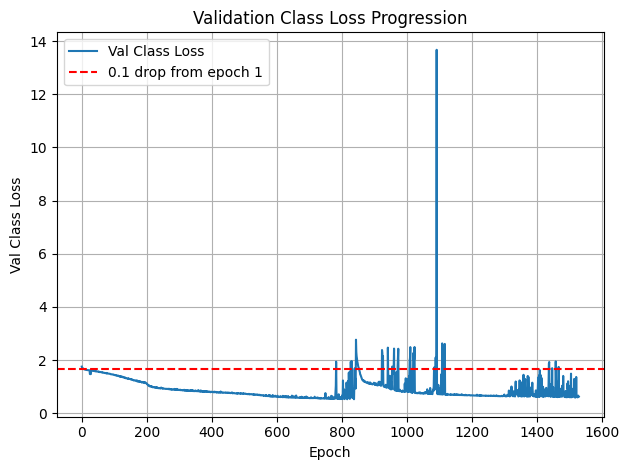

np.float64(80.26515151515152)

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Truncated full log for brevity. Here we'll process just the first log to demonstrate.
log_text = """
Epoch [1/500], Train Recon Loss: 1.1657, Train Class Loss: 1.7985, Val Recon Loss: 1.1666, Val Class Loss: 1.7586, Val Accuracy: 0.1690
Epoch [2/500], Train Recon Loss: 1.1637, Train Class Loss: 1.7469, Val Recon Loss: 1.1649, Val Class Loss: 1.7239, Val Accuracy: 0.1770
Epoch [3/500], Train Recon Loss: 1.1618, Train Class Loss: 1.7135, Val Recon Loss: 1.1640, Val Class Loss: 1.7029, Val Accuracy: 0.1887
Epoch [4/500], Train Recon Loss: 1.1598, Train Class Loss: 1.6998, Val Recon Loss: 1.1638, Val Class Loss: 1.7006, Val Accuracy: 0.1803
Epoch [5/500], Train Recon Loss: 1.1583, Train Class Loss: 1.6918, Val Recon Loss: 1.1593, Val Class Loss: 1.6826, Val Accuracy: 0.1957
Epoch [6/500], Train Recon Loss: 1.1570, Train Class Loss: 1.6836, Val Recon Loss: 1.1605, Val Class Loss: 1.6759, Val Accuracy: 0.1803
Epoch [7/500], Train Recon Loss: 1.1560, Train Class Loss: 1.6721, Val Recon Loss: 1.1585, Val Class Loss: 1.6731, Val Accuracy: 0.1923
Epoch [8/500], Train Recon Loss: 1.1550, Train Class Loss: 1.6603, Val Recon Loss: 1.1590, Val Class Loss: 1.6581, Val Accuracy: 0.1960
Epoch [9/500], Train Recon Loss: 1.1539, Train Class Loss: 1.6553, Val Recon Loss: 1.1578, Val Class Loss: 1.6583, Val Accuracy: 0.1887
Epoch [10/500], Train Recon Loss: 1.1524, Train Class Loss: 1.6542, Val Recon Loss: 1.1555, Val Class Loss: 1.6481, Val Accuracy: 0.1923
Epoch [11/500], Train Recon Loss: 1.1518, Train Class Loss: 1.6487, Val Recon Loss: 1.1545, Val Class Loss: 1.6504, Val Accuracy: 0.1877
Epoch [12/500], Train Recon Loss: 1.1503, Train Class Loss: 1.6406, Val Recon Loss: 1.1536, Val Class Loss: 1.6430, Val Accuracy: 0.1923
Epoch [13/500], Train Recon Loss: 1.1491, Train Class Loss: 1.6380, Val Recon Loss: 1.1509, Val Class Loss: 1.6384, Val Accuracy: 0.1913
Epoch [14/500], Train Recon Loss: 1.1466, Train Class Loss: 1.6393, Val Recon Loss: 1.1516, Val Class Loss: 1.6347, Val Accuracy: 0.2043
Epoch [15/500], Train Recon Loss: 1.1418, Train Class Loss: 1.6335, Val Recon Loss: 1.1415, Val Class Loss: 1.6325, Val Accuracy: 0.1863
Epoch [16/500], Train Recon Loss: 1.1388, Train Class Loss: 1.6321, Val Recon Loss: 1.1408, Val Class Loss: 1.6338, Val Accuracy: 0.1750
Epoch [17/500], Train Recon Loss: 1.1372, Train Class Loss: 1.6286, Val Recon Loss: 1.1380, Val Class Loss: 1.6290, Val Accuracy: 0.1953
Epoch [18/500], Train Recon Loss: 1.1359, Train Class Loss: 1.6294, Val Recon Loss: 1.1414, Val Class Loss: 1.6272, Val Accuracy: 0.2677
Epoch [19/500], Train Recon Loss: 1.1342, Train Class Loss: 1.6261, Val Recon Loss: 1.1364, Val Class Loss: 1.6264, Val Accuracy: 0.2093
Epoch [20/500], Train Recon Loss: 1.1331, Train Class Loss: 1.6262, Val Recon Loss: 1.1346, Val Class Loss: 1.6231, Val Accuracy: 0.2663
Epoch [21/500], Train Recon Loss: 1.1318, Train Class Loss: 1.6267, Val Recon Loss: 1.1357, Val Class Loss: 1.6229, Val Accuracy: 0.2573
Epoch [22/500], Train Recon Loss: 1.1304, Train Class Loss: 1.6232, Val Recon Loss: 1.1326, Val Class Loss: 1.6216, Val Accuracy: 0.2690
Epoch [23/500], Train Recon Loss: 1.1292, Train Class Loss: 1.6225, Val Recon Loss: 1.1327, Val Class Loss: 1.6204, Val Accuracy: 0.2800
Epoch [24/500], Train Recon Loss: 1.1279, Train Class Loss: 1.6202, Val Recon Loss: 1.1326, Val Class Loss: 1.6215, Val Accuracy: 0.2767
Epoch [25/500], Train Recon Loss: 1.1270, Train Class Loss: 1.6198, Val Recon Loss: 1.1293, Val Class Loss: 1.6200, Val Accuracy: 0.2633
...
Epoch [497/500], Train Recon Loss: 0.9818, Train Class Loss: 1.4786, Val Recon Loss: 0.9828, Val Class Loss: 1.4767, Val Accuracy: 0.3323
Epoch [498/500], Train Recon Loss: 0.9813, Train Class Loss: 1.4796, Val Recon Loss: 0.9830, Val Class Loss: 1.4770, Val Accuracy: 0.3293
Epoch [499/500], Train Recon Loss: 0.9819, Train Class Loss: 1.4801, Val Recon Loss: 0.9830, Val Class Loss: 1.4762, Val Accuracy: 0.3273
Epoch [500/500], Train Recon Loss: 0.9818, Train Class Loss: 1.4827, Val Recon Loss: 0.9828, Val Class Loss: 1.4768, Val Accuracy: 0.3300
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
Epoch [1/1500], Train Recon Loss: 1.1322, Train Class Loss: 1.6394, Val Recon Loss: 1.1194, Val Class Loss: 1.6471, Val Accuracy: 0.2917
Epoch [2/1500], Train Recon Loss: 1.1294, Train Class Loss: 1.6342, Val Recon Loss: 1.1190, Val Class Loss: 1.6391, Val Accuracy: 0.2857
Epoch [3/1500], Train Recon Loss: 1.1261, Train Class Loss: 1.6221, Val Recon Loss: 1.1144, Val Class Loss: 1.6237, Val Accuracy: 0.2910
Epoch [4/1500], Train Recon Loss: 1.1246, Train Class Loss: 1.6156, Val Recon Loss: 1.1135, Val Class Loss: 1.6178, Val Accuracy: 0.2890
Epoch [5/1500], Train Recon Loss: 1.1232, Train Class Loss: 1.6058, Val Recon Loss: 1.1080, Val Class Loss: 1.6083, Val Accuracy: 0.2860
Epoch [6/1500], Train Recon Loss: 1.1211, Train Class Loss: 1.6076, Val Recon Loss: 1.1117, Val Class Loss: 1.5976, Val Accuracy: 0.2937
Epoch [7/1500], Train Recon Loss: 1.1191, Train Class Loss: 1.5986, Val Recon Loss: 1.1119, Val Class Loss: 1.6012, Val Accuracy: 0.2957
Epoch [8/1500], Train Recon Loss: 1.1177, Train Class Loss: 1.5935, Val Recon Loss: 1.1088, Val Class Loss: 1.6068, Val Accuracy: 0.2937
Epoch [9/1500], Train Recon Loss: 1.1159, Train Class Loss: 1.5894, Val Recon Loss: 1.1094, Val Class Loss: 1.6013, Val Accuracy: 0.2987
Epoch [10/1500], Train Recon Loss: 1.1143, Train Class Loss: 1.5909, Val Recon Loss: 1.1115, Val Class Loss: 1.5942, Val Accuracy: 0.3047
Epoch [11/1500], Train Recon Loss: 1.1131, Train Class Loss: 1.5909, Val Recon Loss: 1.1070, Val Class Loss: 1.5992, Val Accuracy: 0.3003
Epoch [12/1500], Train Recon Loss: 1.1117, Train Class Loss: 1.5849, Val Recon Loss: 1.1069, Val Class Loss: 1.5849, Val Accuracy: 0.3017
Epoch [13/1500], Train Recon Loss: 1.1103, Train Class Loss: 1.5819, Val Recon Loss: 1.1058, Val Class Loss: 1.5883, Val Accuracy: 0.2993
Epoch [14/1500], Train Recon Loss: 1.1093, Train Class Loss: 1.5766, Val Recon Loss: 1.1077, Val Class Loss: 1.5979, Val Accuracy: 0.3073
Epoch [15/1500], Train Recon Loss: 1.1079, Train Class Loss: 1.5755, Val Recon Loss: 1.1075, Val Class Loss: 1.5792, Val Accuracy: 0.3090
Epoch [16/1500], Train Recon Loss: 1.1070, Train Class Loss: 1.5725, Val Recon Loss: 1.1042, Val Class Loss: 1.5832, Val Accuracy: 0.3097
Epoch [17/1500], Train Recon Loss: 1.1052, Train Class Loss: 1.5714, Val Recon Loss: 1.1078, Val Class Loss: 1.5779, Val Accuracy: 0.3137
Epoch [18/1500], Train Recon Loss: 1.1047, Train Class Loss: 1.5748, Val Recon Loss: 1.1007, Val Class Loss: 1.5745, Val Accuracy: 0.3030
Epoch [19/1500], Train Recon Loss: 1.1037, Train Class Loss: 1.5675, Val Recon Loss: 1.1025, Val Class Loss: 1.5769, Val Accuracy: 0.3143
Epoch [20/1500], Train Recon Loss: 1.1022, Train Class Loss: 1.5637, Val Recon Loss: 1.0917, Val Class Loss: 1.5717, Val Accuracy: 0.2993
Epoch [21/1500], Train Recon Loss: 1.1012, Train Class Loss: 1.5635, Val Recon Loss: 1.0915, Val Class Loss: 1.5706, Val Accuracy: 0.3073
Epoch [22/1500], Train Recon Loss: 1.1004, Train Class Loss: 1.5617, Val Recon Loss: 1.0977, Val Class Loss: 1.5700, Val Accuracy: 0.3063
Epoch [23/1500], Train Recon Loss: 1.0994, Train Class Loss: 1.5594, Val Recon Loss: 1.0972, Val Class Loss: 1.5648, Val Accuracy: 0.3057
Epoch [24/1500], Train Recon Loss: 1.0989, Train Class Loss: 1.5578, Val Recon Loss: 1.0956, Val Class Loss: 1.5735, Val Accuracy: 0.3010
Epoch [25/1500], Train Recon Loss: 1.0973, Train Class Loss: 1.5528, Val Recon Loss: 1.0918, Val Class Loss: 1.5605, Val Accuracy: 0.3193
Epoch [26/1500], Train Recon Loss: 1.0962, Train Class Loss: 1.5518, Val Recon Loss: 1.0890, Val Class Loss: 1.5597, Val Accuracy: 0.3127
Epoch [27/1500], Train Recon Loss: 1.0949, Train Class Loss: 1.5497, Val Recon Loss: 1.0905, Val Class Loss: 1.5508, Val Accuracy: 0.3187
Epoch [28/1500], Train Recon Loss: 1.0946, Train Class Loss: 1.5477, Val Recon Loss: 1.0854, Val Class Loss: 1.5520, Val Accuracy: 0.3143
Epoch [29/1500], Train Recon Loss: 1.0933, Train Class Loss: 1.5474, Val Recon Loss: 1.0861, Val Class Loss: 1.5549, Val Accuracy: 0.3147
Epoch [30/1500], Train Recon Loss: 1.0926, Train Class Loss: 1.5444, Val Recon Loss: 1.0854, Val Class Loss: 1.5550, Val Accuracy: 0.3147
Epoch [31/1500], Train Recon Loss: 1.0914, Train Class Loss: 1.5386, Val Recon Loss: 1.0822, Val Class Loss: 1.5513, Val Accuracy: 0.3130
Epoch [32/1500], Train Recon Loss: 1.0903, Train Class Loss: 1.5392, Val Recon Loss: 1.0850, Val Class Loss: 1.5437, Val Accuracy: 0.3210
Epoch [33/1500], Train Recon Loss: 1.0892, Train Class Loss: 1.5367, Val Recon Loss: 1.0824, Val Class Loss: 1.5410, Val Accuracy: 0.3223
Epoch [34/1500], Train Recon Loss: 1.0880, Train Class Loss: 1.5377, Val Recon Loss: 1.0809, Val Class Loss: 1.5415, Val Accuracy: 0.3170
Epoch [35/1500], Train Recon Loss: 1.0866, Train Class Loss: 1.5331, Val Recon Loss: 1.0829, Val Class Loss: 1.5299, Val Accuracy: 0.3283
Epoch [36/1500], Train Recon Loss: 1.0852, Train Class Loss: 1.5304, Val Recon Loss: 1.0814, Val Class Loss: 1.5397, Val Accuracy: 0.3210
Epoch [37/1500], Train Recon Loss: 1.0843, Train Class Loss: 1.5308, Val Recon Loss: 1.0779, Val Class Loss: 1.5397, Val Accuracy: 0.3237
Epoch [38/1500], Train Recon Loss: 1.0831, Train Class Loss: 1.5264, Val Recon Loss: 1.0791, Val Class Loss: 1.5304, Val Accuracy: 0.3293
Epoch [39/1500], Train Recon Loss: 1.0812, Train Class Loss: 1.5227, Val Recon Loss: 1.0777, Val Class Loss: 1.5275, Val Accuracy: 0.3323
Epoch [40/1500], Train Recon Loss: 1.0802, Train Class Loss: 1.5213, Val Recon Loss: 1.0757, Val Class Loss: 1.5273, Val Accuracy: 0.3320
Epoch [41/1500], Train Recon Loss: 1.0788, Train Class Loss: 1.5210, Val Recon Loss: 1.0753, Val Class Loss: 1.5212, Val Accuracy: 0.3350
Epoch [42/1500], Train Recon Loss: 1.0775, Train Class Loss: 1.5179, Val Recon Loss: 1.0726, Val Class Loss: 1.5239, Val Accuracy: 0.3367
Epoch [43/1500], Train Recon Loss: 1.0767, Train Class Loss: 1.5149, Val Recon Loss: 1.0706, Val Class Loss: 1.5226, Val Accuracy: 0.3247
Epoch [44/1500], Train Recon Loss: 1.0755, Train Class Loss: 1.5144, Val Recon Loss: 1.0741, Val Class Loss: 1.5131, Val Accuracy: 0.3383
Epoch [45/1500], Train Recon Loss: 1.0743, Train Class Loss: 1.5128, Val Recon Loss: 1.0695, Val Class Loss: 1.5190, Val Accuracy: 0.3293
Epoch [46/1500], Train Recon Loss: 1.0734, Train Class Loss: 1.5108, Val Recon Loss: 1.0651, Val Class Loss: 1.5140, Val Accuracy: 0.3320
Epoch [47/1500], Train Recon Loss: 1.0714, Train Class Loss: 1.5077, Val Recon Loss: 1.0733, Val Class Loss: 1.5148, Val Accuracy: 0.3387
Epoch [48/1500], Train Recon Loss: 1.0706, Train Class Loss: 1.5042, Val Recon Loss: 1.0633, Val Class Loss: 1.5063, Val Accuracy: 0.3450
Epoch [49/1500], Train Recon Loss: 1.0694, Train Class Loss: 1.5026, Val Recon Loss: 1.0671, Val Class Loss: 1.5193, Val Accuracy: 0.3307
Epoch [50/1500], Train Recon Loss: 1.0686, Train Class Loss: 1.5031, Val Recon Loss: 1.0721, Val Class Loss: 1.4977, Val Accuracy: 0.3580
Epoch [51/1500], Train Recon Loss: 1.0673, Train Class Loss: 1.4991, Val Recon Loss: 1.0632, Val Class Loss: 1.4989, Val Accuracy: 0.3403
Epoch [52/1500], Train Recon Loss: 1.0658, Train Class Loss: 1.4951, Val Recon Loss: 1.0682, Val Class Loss: 1.4992, Val Accuracy: 0.3510
Epoch [53/1500], Train Recon Loss: 1.0651, Train Class Loss: 1.4928, Val Recon Loss: 1.0597, Val Class Loss: 1.4964, Val Accuracy: 0.3450
Epoch [54/1500], Train Recon Loss: 1.0640, Train Class Loss: 1.4883, Val Recon Loss: 1.0627, Val Class Loss: 1.4924, Val Accuracy: 0.3567
Epoch [55/1500], Train Recon Loss: 1.0630, Train Class Loss: 1.4883, Val Recon Loss: 1.0637, Val Class Loss: 1.4883, Val Accuracy: 0.3583
Epoch [56/1500], Train Recon Loss: 1.0620, Train Class Loss: 1.4871, Val Recon Loss: 1.0619, Val Class Loss: 1.4921, Val Accuracy: 0.3483
Epoch [57/1500], Train Recon Loss: 1.0604, Train Class Loss: 1.4847, Val Recon Loss: 1.0553, Val Class Loss: 1.4898, Val Accuracy: 0.3470
Epoch [58/1500], Train Recon Loss: 1.0595, Train Class Loss: 1.4813, Val Recon Loss: 1.0599, Val Class Loss: 1.4841, Val Accuracy: 0.3607
Epoch [59/1500], Train Recon Loss: 1.0584, Train Class Loss: 1.4799, Val Recon Loss: 1.0559, Val Class Loss: 1.4866, Val Accuracy: 0.3590
Epoch [60/1500], Train Recon Loss: 1.0568, Train Class Loss: 1.4771, Val Recon Loss: 1.0535, Val Class Loss: 1.4827, Val Accuracy: 0.3587
Epoch [61/1500], Train Recon Loss: 1.0559, Train Class Loss: 1.4730, Val Recon Loss: 1.0576, Val Class Loss: 1.4707, Val Accuracy: 0.3773
Epoch [62/1500], Train Recon Loss: 1.0546, Train Class Loss: 1.4716, Val Recon Loss: 1.0531, Val Class Loss: 1.4697, Val Accuracy: 0.3753
Epoch [63/1500], Train Recon Loss: 1.0533, Train Class Loss: 1.4686, Val Recon Loss: 1.0538, Val Class Loss: 1.4719, Val Accuracy: 0.3717
Epoch [64/1500], Train Recon Loss: 1.0529, Train Class Loss: 1.4686, Val Recon Loss: 1.0489, Val Class Loss: 1.4682, Val Accuracy: 0.3700
Epoch [65/1500], Train Recon Loss: 1.0522, Train Class Loss: 1.4641, Val Recon Loss: 1.0474, Val Class Loss: 1.4626, Val Accuracy: 0.3797
Epoch [66/1500], Train Recon Loss: 1.0500, Train Class Loss: 1.4609, Val Recon Loss: 1.0475, Val Class Loss: 1.4628, Val Accuracy: 0.3760
Epoch [67/1500], Train Recon Loss: 1.0494, Train Class Loss: 1.4596, Val Recon Loss: 1.0463, Val Class Loss: 1.4684, Val Accuracy: 0.3657
Epoch [68/1500], Train Recon Loss: 1.0481, Train Class Loss: 1.4541, Val Recon Loss: 1.0467, Val Class Loss: 1.4627, Val Accuracy: 0.3743
Epoch [69/1500], Train Recon Loss: 1.0469, Train Class Loss: 1.4557, Val Recon Loss: 1.0445, Val Class Loss: 1.4521, Val Accuracy: 0.3903
Epoch [70/1500], Train Recon Loss: 1.0462, Train Class Loss: 1.4504, Val Recon Loss: 1.0442, Val Class Loss: 1.4517, Val Accuracy: 0.3950
Epoch [71/1500], Train Recon Loss: 1.0453, Train Class Loss: 1.4459, Val Recon Loss: 1.0398, Val Class Loss: 1.4533, Val Accuracy: 0.3783
Epoch [72/1500], Train Recon Loss: 1.0445, Train Class Loss: 1.4457, Val Recon Loss: 1.0397, Val Class Loss: 1.4427, Val Accuracy: 0.3910
Epoch [73/1500], Train Recon Loss: 1.0432, Train Class Loss: 1.4440, Val Recon Loss: 1.0391, Val Class Loss: 1.4390, Val Accuracy: 0.3993
Epoch [74/1500], Train Recon Loss: 1.0426, Train Class Loss: 1.4409, Val Recon Loss: 1.0406, Val Class Loss: 1.4353, Val Accuracy: 0.4003
Epoch [75/1500], Train Recon Loss: 1.0408, Train Class Loss: 1.4357, Val Recon Loss: 1.0432, Val Class Loss: 1.4355, Val Accuracy: 0.4067
Epoch [76/1500], Train Recon Loss: 1.0403, Train Class Loss: 1.4342, Val Recon Loss: 1.0364, Val Class Loss: 1.4361, Val Accuracy: 0.4007
Epoch [77/1500], Train Recon Loss: 1.0391, Train Class Loss: 1.4302, Val Recon Loss: 1.0385, Val Class Loss: 1.4299, Val Accuracy: 0.4080
Epoch [78/1500], Train Recon Loss: 1.0390, Train Class Loss: 1.4295, Val Recon Loss: 1.0366, Val Class Loss: 1.4394, Val Accuracy: 0.3917
Epoch [79/1500], Train Recon Loss: 1.0377, Train Class Loss: 1.4236, Val Recon Loss: 1.0354, Val Class Loss: 1.4228, Val Accuracy: 0.4143
Epoch [80/1500], Train Recon Loss: 1.0365, Train Class Loss: 1.4203, Val Recon Loss: 1.0340, Val Class Loss: 1.4163, Val Accuracy: 0.4163
Epoch [81/1500], Train Recon Loss: 1.0364, Train Class Loss: 1.4169, Val Recon Loss: 1.0311, Val Class Loss: 1.4203, Val Accuracy: 0.4123
Epoch [82/1500], Train Recon Loss: 1.0348, Train Class Loss: 1.4130, Val Recon Loss: 1.0386, Val Class Loss: 1.4132, Val Accuracy: 0.4257
Epoch [83/1500], Train Recon Loss: 1.0340, Train Class Loss: 1.4130, Val Recon Loss: 1.0315, Val Class Loss: 1.4158, Val Accuracy: 0.4173
Epoch [84/1500], Train Recon Loss: 1.0330, Train Class Loss: 1.4126, Val Recon Loss: 1.0275, Val Class Loss: 1.4192, Val Accuracy: 0.4140
Epoch [85/1500], Train Recon Loss: 1.0321, Train Class Loss: 1.4086, Val Recon Loss: 1.0294, Val Class Loss: 1.4049, Val Accuracy: 0.4323
Epoch [86/1500], Train Recon Loss: 1.0315, Train Class Loss: 1.4036, Val Recon Loss: 1.0266, Val Class Loss: 1.4060, Val Accuracy: 0.4237
Epoch [87/1500], Train Recon Loss: 1.0302, Train Class Loss: 1.4032, Val Recon Loss: 1.0285, Val Class Loss: 1.3919, Val Accuracy: 0.4390
Epoch [88/1500], Train Recon Loss: 1.0290, Train Class Loss: 1.3958, Val Recon Loss: 1.0294, Val Class Loss: 1.3915, Val Accuracy: 0.4403
Epoch [89/1500], Train Recon Loss: 1.0284, Train Class Loss: 1.3948, Val Recon Loss: 1.0264, Val Class Loss: 1.4017, Val Accuracy: 0.4327
Epoch [90/1500], Train Recon Loss: 1.0270, Train Class Loss: 1.3928, Val Recon Loss: 1.0251, Val Class Loss: 1.3813, Val Accuracy: 0.4503
Epoch [91/1500], Train Recon Loss: 1.0265, Train Class Loss: 1.3875, Val Recon Loss: 1.0248, Val Class Loss: 1.3867, Val Accuracy: 0.4430
Epoch [92/1500], Train Recon Loss: 1.0247, Train Class Loss: 1.3838, Val Recon Loss: 1.0241, Val Class Loss: 1.3757, Val Accuracy: 0.4590
Epoch [93/1500], Train Recon Loss: 1.0243, Train Class Loss: 1.3812, Val Recon Loss: 1.0205, Val Class Loss: 1.3892, Val Accuracy: 0.4410
Epoch [94/1500], Train Recon Loss: 1.0227, Train Class Loss: 1.3791, Val Recon Loss: 1.0216, Val Class Loss: 1.3728, Val Accuracy: 0.4600
Epoch [95/1500], Train Recon Loss: 1.0218, Train Class Loss: 1.3743, Val Recon Loss: 1.0203, Val Class Loss: 1.3701, Val Accuracy: 0.4633
Epoch [96/1500], Train Recon Loss: 1.0211, Train Class Loss: 1.3714, Val Recon Loss: 1.0189, Val Class Loss: 1.3825, Val Accuracy: 0.4493
Epoch [97/1500], Train Recon Loss: 1.0203, Train Class Loss: 1.3730, Val Recon Loss: 1.0207, Val Class Loss: 1.3607, Val Accuracy: 0.4670
Epoch [98/1500], Train Recon Loss: 1.0196, Train Class Loss: 1.3682, Val Recon Loss: 1.0175, Val Class Loss: 1.3705, Val Accuracy: 0.4603
Epoch [99/1500], Train Recon Loss: 1.0185, Train Class Loss: 1.3646, Val Recon Loss: 1.0173, Val Class Loss: 1.3685, Val Accuracy: 0.4603
Epoch [100/1500], Train Recon Loss: 1.0171, Train Class Loss: 1.3625, Val Recon Loss: 1.0172, Val Class Loss: 1.3507, Val Accuracy: 0.4770
Epoch [101/1500], Train Recon Loss: 1.0168, Train Class Loss: 1.3584, Val Recon Loss: 1.0148, Val Class Loss: 1.3483, Val Accuracy: 0.4723
Epoch [102/1500], Train Recon Loss: 1.0158, Train Class Loss: 1.3550, Val Recon Loss: 1.0142, Val Class Loss: 1.3594, Val Accuracy: 0.4710
Epoch [103/1500], Train Recon Loss: 1.0148, Train Class Loss: 1.3515, Val Recon Loss: 1.0131, Val Class Loss: 1.3523, Val Accuracy: 0.4820
Epoch [104/1500], Train Recon Loss: 1.0141, Train Class Loss: 1.3477, Val Recon Loss: 1.0147, Val Class Loss: 1.3539, Val Accuracy: 0.4713
Epoch [105/1500], Train Recon Loss: 1.0130, Train Class Loss: 1.3432, Val Recon Loss: 1.0132, Val Class Loss: 1.3342, Val Accuracy: 0.4913
Epoch [106/1500], Train Recon Loss: 1.0119, Train Class Loss: 1.3411, Val Recon Loss: 1.0148, Val Class Loss: 1.3349, Val Accuracy: 0.4960
Epoch [107/1500], Train Recon Loss: 1.0109, Train Class Loss: 1.3384, Val Recon Loss: 1.0114, Val Class Loss: 1.3306, Val Accuracy: 0.4940
Epoch [108/1500], Train Recon Loss: 1.0101, Train Class Loss: 1.3355, Val Recon Loss: 1.0146, Val Class Loss: 1.3172, Val Accuracy: 0.5093
Epoch [109/1500], Train Recon Loss: 1.0096, Train Class Loss: 1.3304, Val Recon Loss: 1.0115, Val Class Loss: 1.3209, Val Accuracy: 0.5077
Epoch [110/1500], Train Recon Loss: 1.0090, Train Class Loss: 1.3273, Val Recon Loss: 1.0101, Val Class Loss: 1.3176, Val Accuracy: 0.5060
Epoch [111/1500], Train Recon Loss: 1.0086, Train Class Loss: 1.3234, Val Recon Loss: 1.0102, Val Class Loss: 1.3157, Val Accuracy: 0.5093
Epoch [112/1500], Train Recon Loss: 1.0075, Train Class Loss: 1.3220, Val Recon Loss: 1.0074, Val Class Loss: 1.3130, Val Accuracy: 0.5200
Epoch [113/1500], Train Recon Loss: 1.0073, Train Class Loss: 1.3163, Val Recon Loss: 1.0092, Val Class Loss: 1.3098, Val Accuracy: 0.5153
Epoch [114/1500], Train Recon Loss: 1.0068, Train Class Loss: 1.3120, Val Recon Loss: 1.0054, Val Class Loss: 1.3164, Val Accuracy: 0.5047
Epoch [115/1500], Train Recon Loss: 1.0057, Train Class Loss: 1.3093, Val Recon Loss: 1.0052, Val Class Loss: 1.2976, Val Accuracy: 0.5280
Epoch [116/1500], Train Recon Loss: 1.0057, Train Class Loss: 1.3032, Val Recon Loss: 1.0070, Val Class Loss: 1.3104, Val Accuracy: 0.5177
Epoch [117/1500], Train Recon Loss: 1.0044, Train Class Loss: 1.3040, Val Recon Loss: 1.0037, Val Class Loss: 1.2907, Val Accuracy: 0.5270
Epoch [118/1500], Train Recon Loss: 1.0043, Train Class Loss: 1.2992, Val Recon Loss: 1.0046, Val Class Loss: 1.2979, Val Accuracy: 0.5287
Epoch [119/1500], Train Recon Loss: 1.0040, Train Class Loss: 1.2960, Val Recon Loss: 1.0025, Val Class Loss: 1.2925, Val Accuracy: 0.5317
Epoch [120/1500], Train Recon Loss: 1.0033, Train Class Loss: 1.2957, Val Recon Loss: 1.0035, Val Class Loss: 1.2938, Val Accuracy: 0.5297
Epoch [121/1500], Train Recon Loss: 1.0026, Train Class Loss: 1.2909, Val Recon Loss: 1.0037, Val Class Loss: 1.2922, Val Accuracy: 0.5300
Epoch [122/1500], Train Recon Loss: 1.0019, Train Class Loss: 1.2867, Val Recon Loss: 1.0020, Val Class Loss: 1.2883, Val Accuracy: 0.5353
Epoch [123/1500], Train Recon Loss: 1.0014, Train Class Loss: 1.2834, Val Recon Loss: 1.0015, Val Class Loss: 1.2742, Val Accuracy: 0.5463
Epoch [124/1500], Train Recon Loss: 1.0007, Train Class Loss: 1.2772, Val Recon Loss: 1.0010, Val Class Loss: 1.2777, Val Accuracy: 0.5407
Epoch [125/1500], Train Recon Loss: 1.0007, Train Class Loss: 1.2781, Val Recon Loss: 1.0018, Val Class Loss: 1.2711, Val Accuracy: 0.5487
Epoch [126/1500], Train Recon Loss: 1.0003, Train Class Loss: 1.2737, Val Recon Loss: 0.9994, Val Class Loss: 1.2820, Val Accuracy: 0.5373
Epoch [127/1500], Train Recon Loss: 0.9992, Train Class Loss: 1.2693, Val Recon Loss: 0.9999, Val Class Loss: 1.2738, Val Accuracy: 0.5487
Epoch [128/1500], Train Recon Loss: 0.9995, Train Class Loss: 1.2687, Val Recon Loss: 1.0008, Val Class Loss: 1.2674, Val Accuracy: 0.5530
Epoch [129/1500], Train Recon Loss: 0.9986, Train Class Loss: 1.2665, Val Recon Loss: 1.0011, Val Class Loss: 1.2528, Val Accuracy: 0.5617
Epoch [130/1500], Train Recon Loss: 0.9980, Train Class Loss: 1.2602, Val Recon Loss: 1.0001, Val Class Loss: 1.2480, Val Accuracy: 0.5700
Epoch [131/1500], Train Recon Loss: 0.9979, Train Class Loss: 1.2588, Val Recon Loss: 0.9980, Val Class Loss: 1.2554, Val Accuracy: 0.5603
Epoch [132/1500], Train Recon Loss: 0.9974, Train Class Loss: 1.2540, Val Recon Loss: 0.9979, Val Class Loss: 1.2399, Val Accuracy: 0.5727
Epoch [133/1500], Train Recon Loss: 0.9971, Train Class Loss: 1.2504, Val Recon Loss: 0.9971, Val Class Loss: 1.2418, Val Accuracy: 0.5700
Epoch [134/1500], Train Recon Loss: 0.9964, Train Class Loss: 1.2472, Val Recon Loss: 0.9975, Val Class Loss: 1.2383, Val Accuracy: 0.5717
Epoch [135/1500], Train Recon Loss: 0.9966, Train Class Loss: 1.2447, Val Recon Loss: 0.9969, Val Class Loss: 1.2367, Val Accuracy: 0.5757
Epoch [136/1500], Train Recon Loss: 0.9961, Train Class Loss: 1.2456, Val Recon Loss: 0.9969, Val Class Loss: 1.2392, Val Accuracy: 0.5750
Epoch [137/1500], Train Recon Loss: 0.9956, Train Class Loss: 1.2418, Val Recon Loss: 0.9955, Val Class Loss: 1.2311, Val Accuracy: 0.5797
Epoch [138/1500], Train Recon Loss: 0.9952, Train Class Loss: 1.2376, Val Recon Loss: 0.9960, Val Class Loss: 1.2355, Val Accuracy: 0.5820
Epoch [139/1500], Train Recon Loss: 0.9949, Train Class Loss: 1.2357, Val Recon Loss: 0.9951, Val Class Loss: 1.2371, Val Accuracy: 0.5807
Epoch [140/1500], Train Recon Loss: 0.9948, Train Class Loss: 1.2309, Val Recon Loss: 0.9952, Val Class Loss: 1.2390, Val Accuracy: 0.5693
Epoch [141/1500], Train Recon Loss: 0.9942, Train Class Loss: 1.2292, Val Recon Loss: 0.9962, Val Class Loss: 1.2084, Val Accuracy: 0.5993
Epoch [142/1500], Train Recon Loss: 0.9934, Train Class Loss: 1.2269, Val Recon Loss: 0.9955, Val Class Loss: 1.2216, Val Accuracy: 0.5887
Epoch [143/1500], Train Recon Loss: 0.9937, Train Class Loss: 1.2218, Val Recon Loss: 0.9944, Val Class Loss: 1.2305, Val Accuracy: 0.5893
Epoch [144/1500], Train Recon Loss: 0.9926, Train Class Loss: 1.2222, Val Recon Loss: 0.9953, Val Class Loss: 1.1989, Val Accuracy: 0.6080
Epoch [145/1500], Train Recon Loss: 0.9934, Train Class Loss: 1.2185, Val Recon Loss: 0.9938, Val Class Loss: 1.2133, Val Accuracy: 0.5977
Epoch [146/1500], Train Recon Loss: 0.9927, Train Class Loss: 1.2185, Val Recon Loss: 0.9936, Val Class Loss: 1.2081, Val Accuracy: 0.6020
Epoch [147/1500], Train Recon Loss: 0.9929, Train Class Loss: 1.2142, Val Recon Loss: 0.9933, Val Class Loss: 1.1928, Val Accuracy: 0.6060
Epoch [148/1500], Train Recon Loss: 0.9924, Train Class Loss: 1.2088, Val Recon Loss: 0.9927, Val Class Loss: 1.2066, Val Accuracy: 0.6007
Epoch [149/1500], Train Recon Loss: 0.9922, Train Class Loss: 1.2028, Val Recon Loss: 0.9928, Val Class Loss: 1.2083, Val Accuracy: 0.5970
Epoch [150/1500], Train Recon Loss: 0.9917, Train Class Loss: 1.2047, Val Recon Loss: 0.9931, Val Class Loss: 1.1900, Val Accuracy: 0.6133
Epoch [151/1500], Train Recon Loss: 0.9919, Train Class Loss: 1.2031, Val Recon Loss: 0.9929, Val Class Loss: 1.2010, Val Accuracy: 0.6090
Epoch [152/1500], Train Recon Loss: 0.9914, Train Class Loss: 1.1997, Val Recon Loss: 0.9926, Val Class Loss: 1.1881, Val Accuracy: 0.6143
Epoch [153/1500], Train Recon Loss: 0.9905, Train Class Loss: 1.1980, Val Recon Loss: 0.9924, Val Class Loss: 1.1795, Val Accuracy: 0.6243
Epoch [154/1500], Train Recon Loss: 0.9907, Train Class Loss: 1.1939, Val Recon Loss: 0.9919, Val Class Loss: 1.1912, Val Accuracy: 0.6143
Epoch [155/1500], Train Recon Loss: 0.9907, Train Class Loss: 1.1897, Val Recon Loss: 0.9916, Val Class Loss: 1.1740, Val Accuracy: 0.6287
Epoch [156/1500], Train Recon Loss: 0.9902, Train Class Loss: 1.1899, Val Recon Loss: 0.9917, Val Class Loss: 1.1731, Val Accuracy: 0.6337
Epoch [157/1500], Train Recon Loss: 0.9896, Train Class Loss: 1.1871, Val Recon Loss: 0.9915, Val Class Loss: 1.1579, Val Accuracy: 0.6343
Epoch [158/1500], Train Recon Loss: 0.9903, Train Class Loss: 1.1825, Val Recon Loss: 0.9912, Val Class Loss: 1.1805, Val Accuracy: 0.6150
Epoch [159/1500], Train Recon Loss: 0.9898, Train Class Loss: 1.1815, Val Recon Loss: 0.9910, Val Class Loss: 1.1768, Val Accuracy: 0.6207
Epoch [160/1500], Train Recon Loss: 0.9900, Train Class Loss: 1.1790, Val Recon Loss: 0.9907, Val Class Loss: 1.1812, Val Accuracy: 0.6130
Epoch [161/1500], Train Recon Loss: 0.9898, Train Class Loss: 1.1759, Val Recon Loss: 0.9902, Val Class Loss: 1.1701, Val Accuracy: 0.6220
Epoch [162/1500], Train Recon Loss: 0.9893, Train Class Loss: 1.1763, Val Recon Loss: 0.9904, Val Class Loss: 1.1559, Val Accuracy: 0.6343
Epoch [163/1500], Train Recon Loss: 0.9889, Train Class Loss: 1.1731, Val Recon Loss: 0.9905, Val Class Loss: 1.1571, Val Accuracy: 0.6370
Epoch [164/1500], Train Recon Loss: 0.9895, Train Class Loss: 1.1661, Val Recon Loss: 0.9897, Val Class Loss: 1.1702, Val Accuracy: 0.6143
Epoch [165/1500], Train Recon Loss: 0.9885, Train Class Loss: 1.1651, Val Recon Loss: 0.9903, Val Class Loss: 1.1386, Val Accuracy: 0.6437
Epoch [166/1500], Train Recon Loss: 0.9891, Train Class Loss: 1.1645, Val Recon Loss: 0.9900, Val Class Loss: 1.1592, Val Accuracy: 0.6283
Epoch [167/1500], Train Recon Loss: 0.9886, Train Class Loss: 1.1581, Val Recon Loss: 0.9895, Val Class Loss: 1.1507, Val Accuracy: 0.6340
Epoch [168/1500], Train Recon Loss: 0.9889, Train Class Loss: 1.1531, Val Recon Loss: 0.9895, Val Class Loss: 1.1624, Val Accuracy: 0.6227
Epoch [169/1500], Train Recon Loss: 0.9881, Train Class Loss: 1.1492, Val Recon Loss: 0.9892, Val Class Loss: 1.1448, Val Accuracy: 0.6417
Epoch [170/1500], Train Recon Loss: 0.9882, Train Class Loss: 1.1451, Val Recon Loss: 0.9894, Val Class Loss: 1.1271, Val Accuracy: 0.6550
Epoch [171/1500], Train Recon Loss: 0.9884, Train Class Loss: 1.1414, Val Recon Loss: 0.9900, Val Class Loss: 1.1238, Val Accuracy: 0.6573
Epoch [172/1500], Train Recon Loss: 0.9882, Train Class Loss: 1.1202, Val Recon Loss: 0.9889, Val Class Loss: 1.1230, Val Accuracy: 0.6387
Epoch [173/1500], Train Recon Loss: 0.9881, Train Class Loss: 1.1108, Val Recon Loss: 0.9892, Val Class Loss: 1.0935, Val Accuracy: 0.6627
Epoch [174/1500], Train Recon Loss: 0.9877, Train Class Loss: 1.0935, Val Recon Loss: 0.9891, Val Class Loss: 1.0886, Val Accuracy: 0.6653
Epoch [175/1500], Train Recon Loss: 0.9873, Train Class Loss: 1.0818, Val Recon Loss: 0.9892, Val Class Loss: 1.0835, Val Accuracy: 0.6703
Epoch [176/1500], Train Recon Loss: 0.9874, Train Class Loss: 1.0723, Val Recon Loss: 0.9889, Val Class Loss: 1.0541, Val Accuracy: 0.6760
Epoch [177/1500], Train Recon Loss: 0.9872, Train Class Loss: 1.0665, Val Recon Loss: 0.9888, Val Class Loss: 1.0520, Val Accuracy: 0.6680
Epoch [178/1500], Train Recon Loss: 0.9872, Train Class Loss: 1.0565, Val Recon Loss: 0.9885, Val Class Loss: 1.0530, Val Accuracy: 0.6763
Epoch [179/1500], Train Recon Loss: 0.9873, Train Class Loss: 1.0505, Val Recon Loss: 0.9887, Val Class Loss: 1.0346, Val Accuracy: 0.6770
Epoch [180/1500], Train Recon Loss: 0.9872, Train Class Loss: 1.0502, Val Recon Loss: 0.9879, Val Class Loss: 1.0383, Val Accuracy: 0.6687
Epoch [181/1500], Train Recon Loss: 0.9870, Train Class Loss: 1.0418, Val Recon Loss: 0.9884, Val Class Loss: 1.0160, Val Accuracy: 0.6680
Epoch [182/1500], Train Recon Loss: 0.9872, Train Class Loss: 1.0345, Val Recon Loss: 0.9878, Val Class Loss: 1.0145, Val Accuracy: 0.6677
Epoch [183/1500], Train Recon Loss: 0.9867, Train Class Loss: 1.0295, Val Recon Loss: 0.9883, Val Class Loss: 1.0103, Val Accuracy: 0.6787
Epoch [184/1500], Train Recon Loss: 0.9867, Train Class Loss: 1.0276, Val Recon Loss: 0.9879, Val Class Loss: 1.0131, Val Accuracy: 0.6847
Epoch [185/1500], Train Recon Loss: 0.9865, Train Class Loss: 1.0202, Val Recon Loss: 0.9876, Val Class Loss: 1.0273, Val Accuracy: 0.6623
Epoch [186/1500], Train Recon Loss: 0.9866, Train Class Loss: 1.0139, Val Recon Loss: 0.9876, Val Class Loss: 1.0035, Val Accuracy: 0.6820
Epoch [187/1500], Train Recon Loss: 0.9866, Train Class Loss: 1.0155, Val Recon Loss: 0.9873, Val Class Loss: 1.0011, Val Accuracy: 0.6773
Epoch [188/1500], Train Recon Loss: 0.9860, Train Class Loss: 1.0121, Val Recon Loss: 0.9874, Val Class Loss: 1.0115, Val Accuracy: 0.6780
Epoch [189/1500], Train Recon Loss: 0.9860, Train Class Loss: 1.0086, Val Recon Loss: 0.9874, Val Class Loss: 0.9966, Val Accuracy: 0.6847
Epoch [190/1500], Train Recon Loss: 0.9865, Train Class Loss: 1.0075, Val Recon Loss: 0.9876, Val Class Loss: 0.9814, Val Accuracy: 0.6853
Epoch [191/1500], Train Recon Loss: 0.9857, Train Class Loss: 1.0028, Val Recon Loss: 0.9876, Val Class Loss: 0.9820, Val Accuracy: 0.6953
Epoch [192/1500], Train Recon Loss: 0.9861, Train Class Loss: 1.0026, Val Recon Loss: 0.9877, Val Class Loss: 0.9871, Val Accuracy: 0.6837
Epoch [193/1500], Train Recon Loss: 0.9854, Train Class Loss: 0.9970, Val Recon Loss: 0.9873, Val Class Loss: 0.9872, Val Accuracy: 0.6967
Epoch [194/1500], Train Recon Loss: 0.9861, Train Class Loss: 0.9968, Val Recon Loss: 0.9875, Val Class Loss: 0.9903, Val Accuracy: 0.6807
Epoch [195/1500], Train Recon Loss: 0.9859, Train Class Loss: 0.9951, Val Recon Loss: 0.9872, Val Class Loss: 0.9784, Val Accuracy: 0.6833
Epoch [196/1500], Train Recon Loss: 0.9855, Train Class Loss: 0.9929, Val Recon Loss: 0.9872, Val Class Loss: 0.9673, Val Accuracy: 0.6967
Epoch [197/1500], Train Recon Loss: 0.9857, Train Class Loss: 0.9927, Val Recon Loss: 0.9873, Val Class Loss: 0.9721, Val Accuracy: 0.6960
Epoch [198/1500], Train Recon Loss: 0.9861, Train Class Loss: 0.9925, Val Recon Loss: 0.9866, Val Class Loss: 0.9820, Val Accuracy: 0.6777
Epoch [199/1500], Train Recon Loss: 0.9858, Train Class Loss: 0.9817, Val Recon Loss: 0.9867, Val Class Loss: 0.9753, Val Accuracy: 0.6730
Epoch [200/1500], Train Recon Loss: 0.9854, Train Class Loss: 0.9851, Val Recon Loss: 0.9866, Val Class Loss: 0.9640, Val Accuracy: 0.6923
Epoch [201/1500], Train Recon Loss: 0.9856, Train Class Loss: 0.9854, Val Recon Loss: 0.9867, Val Class Loss: 0.9724, Val Accuracy: 0.6840
Epoch [202/1500], Train Recon Loss: 0.9849, Train Class Loss: 0.9790, Val Recon Loss: 0.9865, Val Class Loss: 0.9646, Val Accuracy: 0.6913
Epoch [203/1500], Train Recon Loss: 0.9854, Train Class Loss: 0.9836, Val Recon Loss: 0.9863, Val Class Loss: 0.9820, Val Accuracy: 0.6703
Epoch [204/1500], Train Recon Loss: 0.9850, Train Class Loss: 0.9728, Val Recon Loss: 0.9866, Val Class Loss: 0.9636, Val Accuracy: 0.7007
Epoch [205/1500], Train Recon Loss: 0.9849, Train Class Loss: 0.9766, Val Recon Loss: 0.9864, Val Class Loss: 0.9649, Val Accuracy: 0.7010
Epoch [206/1500], Train Recon Loss: 0.9848, Train Class Loss: 0.9725, Val Recon Loss: 0.9864, Val Class Loss: 0.9491, Val Accuracy: 0.7050
Epoch [207/1500], Train Recon Loss: 0.9848, Train Class Loss: 0.9704, Val Recon Loss: 0.9864, Val Class Loss: 0.9494, Val Accuracy: 0.7017
Epoch [208/1500], Train Recon Loss: 0.9850, Train Class Loss: 0.9710, Val Recon Loss: 0.9864, Val Class Loss: 0.9556, Val Accuracy: 0.6990
Epoch [209/1500], Train Recon Loss: 0.9848, Train Class Loss: 0.9685, Val Recon Loss: 0.9861, Val Class Loss: 0.9454, Val Accuracy: 0.7070
Epoch [210/1500], Train Recon Loss: 0.9850, Train Class Loss: 0.9645, Val Recon Loss: 0.9864, Val Class Loss: 0.9544, Val Accuracy: 0.7020
Epoch [211/1500], Train Recon Loss: 0.9847, Train Class Loss: 0.9606, Val Recon Loss: 0.9864, Val Class Loss: 0.9493, Val Accuracy: 0.7033
Epoch [212/1500], Train Recon Loss: 0.9850, Train Class Loss: 0.9649, Val Recon Loss: 0.9863, Val Class Loss: 0.9486, Val Accuracy: 0.6917
Epoch [213/1500], Train Recon Loss: 0.9844, Train Class Loss: 0.9636, Val Recon Loss: 0.9860, Val Class Loss: 0.9370, Val Accuracy: 0.7073
Epoch [214/1500], Train Recon Loss: 0.9842, Train Class Loss: 0.9626, Val Recon Loss: 0.9860, Val Class Loss: 0.9347, Val Accuracy: 0.7053
Epoch [215/1500], Train Recon Loss: 0.9844, Train Class Loss: 0.9558, Val Recon Loss: 0.9857, Val Class Loss: 0.9433, Val Accuracy: 0.7003
Epoch [216/1500], Train Recon Loss: 0.9845, Train Class Loss: 0.9582, Val Recon Loss: 0.9858, Val Class Loss: 0.9711, Val Accuracy: 0.6710
Epoch [217/1500], Train Recon Loss: 0.9847, Train Class Loss: 0.9535, Val Recon Loss: 0.9857, Val Class Loss: 0.9493, Val Accuracy: 0.6850
Epoch [218/1500], Train Recon Loss: 0.9846, Train Class Loss: 0.9545, Val Recon Loss: 0.9858, Val Class Loss: 0.9486, Val Accuracy: 0.6930
Epoch [219/1500], Train Recon Loss: 0.9842, Train Class Loss: 0.9536, Val Recon Loss: 0.9858, Val Class Loss: 0.9452, Val Accuracy: 0.6833
Epoch [220/1500], Train Recon Loss: 0.9843, Train Class Loss: 0.9512, Val Recon Loss: 0.9856, Val Class Loss: 0.9374, Val Accuracy: 0.7027
Epoch [221/1500], Train Recon Loss: 0.9843, Train Class Loss: 0.9511, Val Recon Loss: 0.9857, Val Class Loss: 0.9419, Val Accuracy: 0.6923
Epoch [222/1500], Train Recon Loss: 0.9841, Train Class Loss: 0.9415, Val Recon Loss: 0.9857, Val Class Loss: 0.9256, Val Accuracy: 0.7130
Epoch [223/1500], Train Recon Loss: 0.9841, Train Class Loss: 0.9470, Val Recon Loss: 0.9859, Val Class Loss: 0.9318, Val Accuracy: 0.7003
Epoch [224/1500], Train Recon Loss: 0.9841, Train Class Loss: 0.9429, Val Recon Loss: 0.9857, Val Class Loss: 0.9310, Val Accuracy: 0.7110
Epoch [225/1500], Train Recon Loss: 0.9846, Train Class Loss: 0.9465, Val Recon Loss: 0.9852, Val Class Loss: 0.9328, Val Accuracy: 0.7050
Epoch [226/1500], Train Recon Loss: 0.9845, Train Class Loss: 0.9432, Val Recon Loss: 0.9855, Val Class Loss: 0.9299, Val Accuracy: 0.7017
Epoch [227/1500], Train Recon Loss: 0.9838, Train Class Loss: 0.9401, Val Recon Loss: 0.9855, Val Class Loss: 0.9250, Val Accuracy: 0.7077
Epoch [228/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9350, Val Recon Loss: 0.9857, Val Class Loss: 0.9254, Val Accuracy: 0.7187
Epoch [229/1500], Train Recon Loss: 0.9840, Train Class Loss: 0.9377, Val Recon Loss: 0.9852, Val Class Loss: 0.9242, Val Accuracy: 0.7023
Epoch [230/1500], Train Recon Loss: 0.9838, Train Class Loss: 0.9354, Val Recon Loss: 0.9854, Val Class Loss: 0.9189, Val Accuracy: 0.7057
Epoch [231/1500], Train Recon Loss: 0.9840, Train Class Loss: 0.9370, Val Recon Loss: 0.9853, Val Class Loss: 0.9186, Val Accuracy: 0.7087
Epoch [232/1500], Train Recon Loss: 0.9841, Train Class Loss: 0.9424, Val Recon Loss: 0.9854, Val Class Loss: 0.9179, Val Accuracy: 0.7080
Epoch [233/1500], Train Recon Loss: 0.9840, Train Class Loss: 0.9335, Val Recon Loss: 0.9852, Val Class Loss: 0.9229, Val Accuracy: 0.7080
Epoch [234/1500], Train Recon Loss: 0.9835, Train Class Loss: 0.9336, Val Recon Loss: 0.9852, Val Class Loss: 0.9219, Val Accuracy: 0.7013
Epoch [235/1500], Train Recon Loss: 0.9840, Train Class Loss: 0.9322, Val Recon Loss: 0.9852, Val Class Loss: 0.9189, Val Accuracy: 0.7057
Epoch [236/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9315, Val Recon Loss: 0.9852, Val Class Loss: 0.9193, Val Accuracy: 0.7167
Epoch [237/1500], Train Recon Loss: 0.9840, Train Class Loss: 0.9364, Val Recon Loss: 0.9852, Val Class Loss: 0.9136, Val Accuracy: 0.7137
Epoch [238/1500], Train Recon Loss: 0.9835, Train Class Loss: 0.9350, Val Recon Loss: 0.9852, Val Class Loss: 0.9145, Val Accuracy: 0.7080
Epoch [239/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9285, Val Recon Loss: 0.9851, Val Class Loss: 0.9144, Val Accuracy: 0.7037
Epoch [240/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9217, Val Recon Loss: 0.9854, Val Class Loss: 0.9278, Val Accuracy: 0.7033
Epoch [241/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9219, Val Recon Loss: 0.9850, Val Class Loss: 0.9034, Val Accuracy: 0.7100
Epoch [242/1500], Train Recon Loss: 0.9839, Train Class Loss: 0.9199, Val Recon Loss: 0.9850, Val Class Loss: 0.9095, Val Accuracy: 0.7103
Epoch [243/1500], Train Recon Loss: 0.9838, Train Class Loss: 0.9266, Val Recon Loss: 0.9850, Val Class Loss: 0.9091, Val Accuracy: 0.7023
Epoch [244/1500], Train Recon Loss: 0.9836, Train Class Loss: 0.9238, Val Recon Loss: 0.9849, Val Class Loss: 0.9071, Val Accuracy: 0.7080
Epoch [245/1500], Train Recon Loss: 0.9833, Train Class Loss: 0.9202, Val Recon Loss: 0.9852, Val Class Loss: 0.9008, Val Accuracy: 0.7230
Epoch [246/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9239, Val Recon Loss: 0.9852, Val Class Loss: 0.9131, Val Accuracy: 0.7080
Epoch [247/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9164, Val Recon Loss: 0.9850, Val Class Loss: 0.9109, Val Accuracy: 0.7113
Epoch [248/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.9248, Val Recon Loss: 0.9852, Val Class Loss: 0.8916, Val Accuracy: 0.7237
Epoch [249/1500], Train Recon Loss: 0.9841, Train Class Loss: 0.9145, Val Recon Loss: 0.9850, Val Class Loss: 0.9023, Val Accuracy: 0.7143
Epoch [250/1500], Train Recon Loss: 0.9828, Train Class Loss: 0.9162, Val Recon Loss: 0.9851, Val Class Loss: 0.8933, Val Accuracy: 0.7207
Epoch [251/1500], Train Recon Loss: 0.9839, Train Class Loss: 0.9182, Val Recon Loss: 0.9850, Val Class Loss: 0.8938, Val Accuracy: 0.7207
Epoch [252/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9130, Val Recon Loss: 0.9848, Val Class Loss: 0.9029, Val Accuracy: 0.7030
Epoch [253/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9112, Val Recon Loss: 0.9850, Val Class Loss: 0.9003, Val Accuracy: 0.7097
Epoch [254/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9171, Val Recon Loss: 0.9848, Val Class Loss: 0.8914, Val Accuracy: 0.7040
Epoch [255/1500], Train Recon Loss: 0.9836, Train Class Loss: 0.9109, Val Recon Loss: 0.9849, Val Class Loss: 0.8967, Val Accuracy: 0.7033
Epoch [256/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9090, Val Recon Loss: 0.9846, Val Class Loss: 0.9007, Val Accuracy: 0.7043
Epoch [257/1500], Train Recon Loss: 0.9839, Train Class Loss: 0.9214, Val Recon Loss: 0.9847, Val Class Loss: 0.9189, Val Accuracy: 0.6933
Epoch [258/1500], Train Recon Loss: 0.9831, Train Class Loss: 0.9145, Val Recon Loss: 0.9847, Val Class Loss: 0.8929, Val Accuracy: 0.7120
Epoch [259/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9060, Val Recon Loss: 0.9847, Val Class Loss: 0.8919, Val Accuracy: 0.7237
Epoch [260/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9060, Val Recon Loss: 0.9848, Val Class Loss: 0.9092, Val Accuracy: 0.6860
Epoch [261/1500], Train Recon Loss: 0.9833, Train Class Loss: 0.9033, Val Recon Loss: 0.9848, Val Class Loss: 0.8906, Val Accuracy: 0.7093
Epoch [262/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9066, Val Recon Loss: 0.9847, Val Class Loss: 0.8900, Val Accuracy: 0.7163
Epoch [263/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.9052, Val Recon Loss: 0.9847, Val Class Loss: 0.8883, Val Accuracy: 0.7150
Epoch [264/1500], Train Recon Loss: 0.9836, Train Class Loss: 0.9060, Val Recon Loss: 0.9846, Val Class Loss: 0.9191, Val Accuracy: 0.6680
Epoch [265/1500], Train Recon Loss: 0.9831, Train Class Loss: 0.9004, Val Recon Loss: 0.9845, Val Class Loss: 0.8868, Val Accuracy: 0.7167
Epoch [266/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.8953, Val Recon Loss: 0.9846, Val Class Loss: 0.8896, Val Accuracy: 0.7143
Epoch [267/1500], Train Recon Loss: 0.9837, Train Class Loss: 0.9058, Val Recon Loss: 0.9845, Val Class Loss: 0.9022, Val Accuracy: 0.6957
Epoch [268/1500], Train Recon Loss: 0.9836, Train Class Loss: 0.8992, Val Recon Loss: 0.9845, Val Class Loss: 0.8866, Val Accuracy: 0.7167
Epoch [269/1500], Train Recon Loss: 0.9830, Train Class Loss: 0.8983, Val Recon Loss: 0.9846, Val Class Loss: 0.8783, Val Accuracy: 0.7243
Epoch [270/1500], Train Recon Loss: 0.9834, Train Class Loss: 0.9019, Val Recon Loss: 0.9843, Val Class Loss: 0.8811, Val Accuracy: 0.7203
Epoch [271/1500], Train Recon Loss: 0.9830, Train Class Loss: 0.8970, Val Recon Loss: 0.9844, Val Class Loss: 0.8829, Val Accuracy: 0.7097
Epoch [272/1500], Train Recon Loss: 0.9832, Train Class Loss: 0.8948, Val Recon Loss: 0.9843, Val Class Loss: 0.8781, Val Accuracy: 0.7230
Epoch [273/1500], Train Recon Loss: 0.9830, Train Class Loss: 0.8912, Val Recon Loss: 0.9846, Val Class Loss: 0.8762, Val Accuracy: 0.7173
Epoch [274/1500], Train Recon Loss: 0.9832, Train Class Loss: 0.8962, Val Recon Loss: 0.9843, Val Class Loss: 0.8900, Val Accuracy: 0.7040
Epoch [275/1500], Train Recon Loss: 0.9828, Train Class Loss: 0.8950, Val Recon Loss: 0.9842, Val Class Loss: 0.8891, Val Accuracy: 0.7050
Epoch [276/1500], Train Recon Loss: 0.9828, Train Class Loss: 0.8948, Val Recon Loss: 0.9843, Val Class Loss: 0.8722, Val Accuracy: 0.7263
Epoch [277/1500], Train Recon Loss: 0.9826, Train Class Loss: 0.8928, Val Recon Loss: 0.9843, Val Class Loss: 0.8759, Val Accuracy: 0.7303
Epoch [278/1500], Train Recon Loss: 0.9824, Train Class Loss: 0.8933, Val Recon Loss: 0.9844, Val Class Loss: 0.8713, Val Accuracy: 0.7363
Epoch [279/1500], Train Recon Loss: 0.9827, Train Class Loss: 0.8921, Val Recon Loss: 0.9843, Val Class Loss: 0.8772, Val Accuracy: 0.7320
Epoch [280/1500], Train Recon Loss: 0.9836, Train Class Loss: 0.8880, Val Recon Loss: 0.9841, Val Class Loss: 0.8746, Val Accuracy: 0.7197
Epoch [281/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.8841, Val Recon Loss: 0.9843, Val Class Loss: 0.8751, Val Accuracy: 0.7287
Epoch [282/1500], Train Recon Loss: 0.9830, Train Class Loss: 0.8866, Val Recon Loss: 0.9841, Val Class Loss: 0.8618, Val Accuracy: 0.7263
Epoch [283/1500], Train Recon Loss: 0.9831, Train Class Loss: 0.8887, Val Recon Loss: 0.9843, Val Class Loss: 0.8617, Val Accuracy: 0.7257
Epoch [284/1500], Train Recon Loss: 0.9826, Train Class Loss: 0.8921, Val Recon Loss: 0.9842, Val Class Loss: 0.8715, Val Accuracy: 0.7380
Epoch [285/1500], Train Recon Loss: 0.9824, Train Class Loss: 0.8856, Val Recon Loss: 0.9840, Val Class Loss: 0.8695, Val Accuracy: 0.7273
Epoch [286/1500], Train Recon Loss: 0.9832, Train Class Loss: 0.8867, Val Recon Loss: 0.9842, Val Class Loss: 0.8815, Val Accuracy: 0.7103
Epoch [287/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.8871, Val Recon Loss: 0.9839, Val Class Loss: 0.8857, Val Accuracy: 0.7160
Epoch [288/1500], Train Recon Loss: 0.9826, Train Class Loss: 0.8899, Val Recon Loss: 0.9843, Val Class Loss: 0.8596, Val Accuracy: 0.7307
Epoch [289/1500], Train Recon Loss: 0.9824, Train Class Loss: 0.8821, Val Recon Loss: 0.9841, Val Class Loss: 0.8774, Val Accuracy: 0.7243
Epoch [290/1500], Train Recon Loss: 0.9827, Train Class Loss: 0.8798, Val Recon Loss: 0.9840, Val Class Loss: 0.8561, Val Accuracy: 0.7300
Epoch [291/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.8823, Val Recon Loss: 0.9840, Val Class Loss: 0.8695, Val Accuracy: 0.7200
Epoch [292/1500], Train Recon Loss: 0.9831, Train Class Loss: 0.8799, Val Recon Loss: 0.9839, Val Class Loss: 0.8740, Val Accuracy: 0.7093
Epoch [293/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8846, Val Recon Loss: 0.9840, Val Class Loss: 0.8584, Val Accuracy: 0.7267
Epoch [294/1500], Train Recon Loss: 0.9831, Train Class Loss: 0.8751, Val Recon Loss: 0.9839, Val Class Loss: 0.8597, Val Accuracy: 0.7253
Epoch [295/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8769, Val Recon Loss: 0.9839, Val Class Loss: 0.8703, Val Accuracy: 0.7207
Epoch [296/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8874, Val Recon Loss: 0.9843, Val Class Loss: 0.8510, Val Accuracy: 0.7323
Epoch [297/1500], Train Recon Loss: 0.9824, Train Class Loss: 0.8750, Val Recon Loss: 0.9837, Val Class Loss: 0.8644, Val Accuracy: 0.7240
Epoch [298/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.8831, Val Recon Loss: 0.9839, Val Class Loss: 0.8512, Val Accuracy: 0.7240
Epoch [299/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8725, Val Recon Loss: 0.9839, Val Class Loss: 0.8510, Val Accuracy: 0.7340
Epoch [300/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8770, Val Recon Loss: 0.9838, Val Class Loss: 0.8513, Val Accuracy: 0.7370
Epoch [301/1500], Train Recon Loss: 0.9824, Train Class Loss: 0.8802, Val Recon Loss: 0.9838, Val Class Loss: 0.8690, Val Accuracy: 0.7150
Epoch [302/1500], Train Recon Loss: 0.9827, Train Class Loss: 0.8809, Val Recon Loss: 0.9839, Val Class Loss: 0.8524, Val Accuracy: 0.7270
Epoch [303/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8716, Val Recon Loss: 0.9836, Val Class Loss: 0.8476, Val Accuracy: 0.7363
Epoch [304/1500], Train Recon Loss: 0.9823, Train Class Loss: 0.8701, Val Recon Loss: 0.9837, Val Class Loss: 0.8469, Val Accuracy: 0.7237
Epoch [305/1500], Train Recon Loss: 0.9826, Train Class Loss: 0.8726, Val Recon Loss: 0.9837, Val Class Loss: 0.8562, Val Accuracy: 0.7280
Epoch [306/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8680, Val Recon Loss: 0.9837, Val Class Loss: 0.8406, Val Accuracy: 0.7373
Epoch [307/1500], Train Recon Loss: 0.9823, Train Class Loss: 0.8675, Val Recon Loss: 0.9837, Val Class Loss: 0.8593, Val Accuracy: 0.7107
Epoch [308/1500], Train Recon Loss: 0.9823, Train Class Loss: 0.8708, Val Recon Loss: 0.9838, Val Class Loss: 0.8753, Val Accuracy: 0.7007
Epoch [309/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8673, Val Recon Loss: 0.9836, Val Class Loss: 0.8469, Val Accuracy: 0.7170
Epoch [310/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8690, Val Recon Loss: 0.9835, Val Class Loss: 0.8588, Val Accuracy: 0.7210
Epoch [311/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8653, Val Recon Loss: 0.9837, Val Class Loss: 0.8448, Val Accuracy: 0.7383
Epoch [312/1500], Train Recon Loss: 0.9829, Train Class Loss: 0.8639, Val Recon Loss: 0.9836, Val Class Loss: 0.8786, Val Accuracy: 0.6847
Epoch [313/1500], Train Recon Loss: 0.9826, Train Class Loss: 0.8669, Val Recon Loss: 0.9835, Val Class Loss: 0.8718, Val Accuracy: 0.6923
Epoch [314/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8611, Val Recon Loss: 0.9835, Val Class Loss: 0.8363, Val Accuracy: 0.7397
Epoch [315/1500], Train Recon Loss: 0.9822, Train Class Loss: 0.8697, Val Recon Loss: 0.9835, Val Class Loss: 0.8475, Val Accuracy: 0.7273
Epoch [316/1500], Train Recon Loss: 0.9818, Train Class Loss: 0.8672, Val Recon Loss: 0.9835, Val Class Loss: 0.8395, Val Accuracy: 0.7240
Epoch [317/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8589, Val Recon Loss: 0.9834, Val Class Loss: 0.8375, Val Accuracy: 0.7357
Epoch [318/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8619, Val Recon Loss: 0.9837, Val Class Loss: 0.8405, Val Accuracy: 0.7423
Epoch [319/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8663, Val Recon Loss: 0.9835, Val Class Loss: 0.8446, Val Accuracy: 0.7253
Epoch [320/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8645, Val Recon Loss: 0.9834, Val Class Loss: 0.8327, Val Accuracy: 0.7353
Epoch [321/1500], Train Recon Loss: 0.9823, Train Class Loss: 0.8589, Val Recon Loss: 0.9833, Val Class Loss: 0.8575, Val Accuracy: 0.7070
Epoch [322/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8612, Val Recon Loss: 0.9833, Val Class Loss: 0.8405, Val Accuracy: 0.7323
Epoch [323/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8580, Val Recon Loss: 0.9833, Val Class Loss: 0.8469, Val Accuracy: 0.7160
Epoch [324/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8570, Val Recon Loss: 0.9832, Val Class Loss: 0.8479, Val Accuracy: 0.7140
Epoch [325/1500], Train Recon Loss: 0.9819, Train Class Loss: 0.8566, Val Recon Loss: 0.9833, Val Class Loss: 0.8349, Val Accuracy: 0.7427
Epoch [326/1500], Train Recon Loss: 0.9819, Train Class Loss: 0.8547, Val Recon Loss: 0.9832, Val Class Loss: 0.8339, Val Accuracy: 0.7300
Epoch [327/1500], Train Recon Loss: 0.9819, Train Class Loss: 0.8638, Val Recon Loss: 0.9832, Val Class Loss: 0.8322, Val Accuracy: 0.7373
Epoch [328/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8574, Val Recon Loss: 0.9831, Val Class Loss: 0.8551, Val Accuracy: 0.7113
Epoch [329/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8517, Val Recon Loss: 0.9833, Val Class Loss: 0.8464, Val Accuracy: 0.7287
Epoch [330/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8602, Val Recon Loss: 0.9832, Val Class Loss: 0.8319, Val Accuracy: 0.7423
Epoch [331/1500], Train Recon Loss: 0.9823, Train Class Loss: 0.8595, Val Recon Loss: 0.9831, Val Class Loss: 0.8717, Val Accuracy: 0.6840
Epoch [332/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8535, Val Recon Loss: 0.9832, Val Class Loss: 0.8420, Val Accuracy: 0.7213
Epoch [333/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8530, Val Recon Loss: 0.9831, Val Class Loss: 0.8316, Val Accuracy: 0.7280
Epoch [334/1500], Train Recon Loss: 0.9819, Train Class Loss: 0.8452, Val Recon Loss: 0.9834, Val Class Loss: 0.8195, Val Accuracy: 0.7427
Epoch [335/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8472, Val Recon Loss: 0.9832, Val Class Loss: 0.8217, Val Accuracy: 0.7363
Epoch [336/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8509, Val Recon Loss: 0.9830, Val Class Loss: 0.8170, Val Accuracy: 0.7417
Epoch [337/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8483, Val Recon Loss: 0.9832, Val Class Loss: 0.8172, Val Accuracy: 0.7357
Epoch [338/1500], Train Recon Loss: 0.9821, Train Class Loss: 0.8487, Val Recon Loss: 0.9830, Val Class Loss: 0.8637, Val Accuracy: 0.6893
Epoch [339/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8573, Val Recon Loss: 0.9830, Val Class Loss: 0.8266, Val Accuracy: 0.7430
Epoch [340/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8429, Val Recon Loss: 0.9830, Val Class Loss: 0.8264, Val Accuracy: 0.7343
Epoch [341/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8452, Val Recon Loss: 0.9830, Val Class Loss: 0.8211, Val Accuracy: 0.7480
Epoch [342/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8499, Val Recon Loss: 0.9830, Val Class Loss: 0.8361, Val Accuracy: 0.7157
Epoch [343/1500], Train Recon Loss: 0.9819, Train Class Loss: 0.8475, Val Recon Loss: 0.9830, Val Class Loss: 0.8207, Val Accuracy: 0.7347
Epoch [344/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8414, Val Recon Loss: 0.9829, Val Class Loss: 0.8156, Val Accuracy: 0.7453
Epoch [345/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8438, Val Recon Loss: 0.9829, Val Class Loss: 0.8333, Val Accuracy: 0.7383
Epoch [346/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8451, Val Recon Loss: 0.9828, Val Class Loss: 0.8184, Val Accuracy: 0.7347
Epoch [347/1500], Train Recon Loss: 0.9820, Train Class Loss: 0.8476, Val Recon Loss: 0.9828, Val Class Loss: 0.8225, Val Accuracy: 0.7103
Epoch [348/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8404, Val Recon Loss: 0.9829, Val Class Loss: 0.8116, Val Accuracy: 0.7407
Epoch [349/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8463, Val Recon Loss: 0.9828, Val Class Loss: 0.8266, Val Accuracy: 0.7317
Epoch [350/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8337, Val Recon Loss: 0.9828, Val Class Loss: 0.8124, Val Accuracy: 0.7397
Epoch [351/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8351, Val Recon Loss: 0.9829, Val Class Loss: 0.8265, Val Accuracy: 0.7350
Epoch [352/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8431, Val Recon Loss: 0.9827, Val Class Loss: 0.8304, Val Accuracy: 0.7217
Epoch [353/1500], Train Recon Loss: 0.9818, Train Class Loss: 0.8416, Val Recon Loss: 0.9828, Val Class Loss: 0.8382, Val Accuracy: 0.7087
Epoch [354/1500], Train Recon Loss: 0.9813, Train Class Loss: 0.8442, Val Recon Loss: 0.9830, Val Class Loss: 0.8135, Val Accuracy: 0.7383
Epoch [355/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8350, Val Recon Loss: 0.9830, Val Class Loss: 0.8108, Val Accuracy: 0.7457
Epoch [356/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8328, Val Recon Loss: 0.9829, Val Class Loss: 0.8277, Val Accuracy: 0.7383
Epoch [357/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8401, Val Recon Loss: 0.9828, Val Class Loss: 0.8113, Val Accuracy: 0.7440
Epoch [358/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8388, Val Recon Loss: 0.9827, Val Class Loss: 0.8196, Val Accuracy: 0.7320
Epoch [359/1500], Train Recon Loss: 0.9818, Train Class Loss: 0.8351, Val Recon Loss: 0.9827, Val Class Loss: 0.8188, Val Accuracy: 0.7247
Epoch [360/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8382, Val Recon Loss: 0.9828, Val Class Loss: 0.8086, Val Accuracy: 0.7443
Epoch [361/1500], Train Recon Loss: 0.9813, Train Class Loss: 0.8350, Val Recon Loss: 0.9827, Val Class Loss: 0.8162, Val Accuracy: 0.7317
Epoch [362/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8324, Val Recon Loss: 0.9828, Val Class Loss: 0.8055, Val Accuracy: 0.7270
Epoch [363/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8380, Val Recon Loss: 0.9827, Val Class Loss: 0.8074, Val Accuracy: 0.7433
Epoch [364/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8320, Val Recon Loss: 0.9825, Val Class Loss: 0.8034, Val Accuracy: 0.7460
Epoch [365/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8363, Val Recon Loss: 0.9826, Val Class Loss: 0.8191, Val Accuracy: 0.7177
Epoch [366/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8334, Val Recon Loss: 0.9826, Val Class Loss: 0.8071, Val Accuracy: 0.7453
Epoch [367/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8294, Val Recon Loss: 0.9826, Val Class Loss: 0.7942, Val Accuracy: 0.7470
Epoch [368/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8256, Val Recon Loss: 0.9826, Val Class Loss: 0.7948, Val Accuracy: 0.7487
Epoch [369/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8325, Val Recon Loss: 0.9825, Val Class Loss: 0.8110, Val Accuracy: 0.7277
Epoch [370/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8292, Val Recon Loss: 0.9826, Val Class Loss: 0.8125, Val Accuracy: 0.7337
Epoch [371/1500], Train Recon Loss: 0.9813, Train Class Loss: 0.8232, Val Recon Loss: 0.9827, Val Class Loss: 0.8048, Val Accuracy: 0.7463
Epoch [372/1500], Train Recon Loss: 0.9816, Train Class Loss: 0.8254, Val Recon Loss: 0.9825, Val Class Loss: 0.8076, Val Accuracy: 0.7427
Epoch [373/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8222, Val Recon Loss: 0.9825, Val Class Loss: 0.8045, Val Accuracy: 0.7473
Epoch [374/1500], Train Recon Loss: 0.9813, Train Class Loss: 0.8274, Val Recon Loss: 0.9827, Val Class Loss: 0.7976, Val Accuracy: 0.7433
Epoch [375/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8290, Val Recon Loss: 0.9823, Val Class Loss: 0.8000, Val Accuracy: 0.7417
Epoch [376/1500], Train Recon Loss: 0.9814, Train Class Loss: 0.8292, Val Recon Loss: 0.9824, Val Class Loss: 0.7973, Val Accuracy: 0.7417
Epoch [377/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8289, Val Recon Loss: 0.9824, Val Class Loss: 0.8024, Val Accuracy: 0.7457
Epoch [378/1500], Train Recon Loss: 0.9813, Train Class Loss: 0.8151, Val Recon Loss: 0.9826, Val Class Loss: 0.7924, Val Accuracy: 0.7463
Epoch [379/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8258, Val Recon Loss: 0.9825, Val Class Loss: 0.8187, Val Accuracy: 0.7240
Epoch [380/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8183, Val Recon Loss: 0.9825, Val Class Loss: 0.7958, Val Accuracy: 0.7543
Epoch [381/1500], Train Recon Loss: 0.9817, Train Class Loss: 0.8165, Val Recon Loss: 0.9824, Val Class Loss: 0.8037, Val Accuracy: 0.7393
Epoch [382/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.8210, Val Recon Loss: 0.9824, Val Class Loss: 0.7994, Val Accuracy: 0.7490
Epoch [383/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8201, Val Recon Loss: 0.9824, Val Class Loss: 0.7974, Val Accuracy: 0.7373
Epoch [384/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8207, Val Recon Loss: 0.9824, Val Class Loss: 0.8095, Val Accuracy: 0.7257
Epoch [385/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8167, Val Recon Loss: 0.9824, Val Class Loss: 0.8014, Val Accuracy: 0.7457
Epoch [386/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.8298, Val Recon Loss: 0.9826, Val Class Loss: 0.7868, Val Accuracy: 0.7510
Epoch [387/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8216, Val Recon Loss: 0.9823, Val Class Loss: 0.8037, Val Accuracy: 0.7283
Epoch [388/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.8230, Val Recon Loss: 0.9825, Val Class Loss: 0.7856, Val Accuracy: 0.7470
Epoch [389/1500], Train Recon Loss: 0.9810, Train Class Loss: 0.8117, Val Recon Loss: 0.9823, Val Class Loss: 0.7858, Val Accuracy: 0.7500
Epoch [390/1500], Train Recon Loss: 0.9815, Train Class Loss: 0.8168, Val Recon Loss: 0.9823, Val Class Loss: 0.7893, Val Accuracy: 0.7490
Epoch [391/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.8117, Val Recon Loss: 0.9824, Val Class Loss: 0.7855, Val Accuracy: 0.7510
Epoch [392/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.8210, Val Recon Loss: 0.9823, Val Class Loss: 0.7867, Val Accuracy: 0.7533
Epoch [393/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8139, Val Recon Loss: 0.9824, Val Class Loss: 0.7999, Val Accuracy: 0.7257
Epoch [394/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8214, Val Recon Loss: 0.9823, Val Class Loss: 0.7846, Val Accuracy: 0.7480
Epoch [395/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.8103, Val Recon Loss: 0.9824, Val Class Loss: 0.7811, Val Accuracy: 0.7467
Epoch [396/1500], Train Recon Loss: 0.9810, Train Class Loss: 0.8108, Val Recon Loss: 0.9823, Val Class Loss: 0.7905, Val Accuracy: 0.7313
Epoch [397/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8140, Val Recon Loss: 0.9825, Val Class Loss: 0.7962, Val Accuracy: 0.7313
Epoch [398/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.8152, Val Recon Loss: 0.9822, Val Class Loss: 0.7860, Val Accuracy: 0.7467
Epoch [399/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8097, Val Recon Loss: 0.9822, Val Class Loss: 0.8224, Val Accuracy: 0.6977
Epoch [400/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8100, Val Recon Loss: 0.9823, Val Class Loss: 0.7856, Val Accuracy: 0.7430
Epoch [401/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.8111, Val Recon Loss: 0.9822, Val Class Loss: 0.7901, Val Accuracy: 0.7400
Epoch [402/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8105, Val Recon Loss: 0.9821, Val Class Loss: 0.7887, Val Accuracy: 0.7337
Epoch [403/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8038, Val Recon Loss: 0.9822, Val Class Loss: 0.7780, Val Accuracy: 0.7550
Epoch [404/1500], Train Recon Loss: 0.9810, Train Class Loss: 0.8073, Val Recon Loss: 0.9823, Val Class Loss: 0.7760, Val Accuracy: 0.7493
Epoch [405/1500], Train Recon Loss: 0.9810, Train Class Loss: 0.8041, Val Recon Loss: 0.9822, Val Class Loss: 0.7772, Val Accuracy: 0.7497
Epoch [406/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.7995, Val Recon Loss: 0.9821, Val Class Loss: 0.7895, Val Accuracy: 0.7357
Epoch [407/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8007, Val Recon Loss: 0.9821, Val Class Loss: 0.7813, Val Accuracy: 0.7387
Epoch [408/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8110, Val Recon Loss: 0.9822, Val Class Loss: 0.7785, Val Accuracy: 0.7550
Epoch [409/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.8045, Val Recon Loss: 0.9823, Val Class Loss: 0.7782, Val Accuracy: 0.7507
Epoch [410/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8013, Val Recon Loss: 0.9822, Val Class Loss: 0.7793, Val Accuracy: 0.7503
Epoch [411/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.8000, Val Recon Loss: 0.9821, Val Class Loss: 0.7790, Val Accuracy: 0.7510
Epoch [412/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.8021, Val Recon Loss: 0.9821, Val Class Loss: 0.7743, Val Accuracy: 0.7507
Epoch [413/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.8022, Val Recon Loss: 0.9822, Val Class Loss: 0.7793, Val Accuracy: 0.7417
Epoch [414/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.8000, Val Recon Loss: 0.9821, Val Class Loss: 0.7752, Val Accuracy: 0.7470
Epoch [415/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.8027, Val Recon Loss: 0.9821, Val Class Loss: 0.7854, Val Accuracy: 0.7197
Epoch [416/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.7955, Val Recon Loss: 0.9821, Val Class Loss: 0.7784, Val Accuracy: 0.7510
Epoch [417/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7989, Val Recon Loss: 0.9822, Val Class Loss: 0.7731, Val Accuracy: 0.7560
Epoch [418/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7960, Val Recon Loss: 0.9820, Val Class Loss: 0.7762, Val Accuracy: 0.7427
Epoch [419/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.8016, Val Recon Loss: 0.9822, Val Class Loss: 0.7706, Val Accuracy: 0.7560
Epoch [420/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7928, Val Recon Loss: 0.9821, Val Class Loss: 0.7718, Val Accuracy: 0.7463
Epoch [421/1500], Train Recon Loss: 0.9812, Train Class Loss: 0.7977, Val Recon Loss: 0.9821, Val Class Loss: 0.7848, Val Accuracy: 0.7250
Epoch [422/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7964, Val Recon Loss: 0.9820, Val Class Loss: 0.7649, Val Accuracy: 0.7497
Epoch [423/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7930, Val Recon Loss: 0.9820, Val Class Loss: 0.7695, Val Accuracy: 0.7520
Epoch [424/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7946, Val Recon Loss: 0.9821, Val Class Loss: 0.7748, Val Accuracy: 0.7327
Epoch [425/1500], Train Recon Loss: 0.9808, Train Class Loss: 0.7908, Val Recon Loss: 0.9820, Val Class Loss: 0.7712, Val Accuracy: 0.7427
Epoch [426/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7922, Val Recon Loss: 0.9820, Val Class Loss: 0.7715, Val Accuracy: 0.7573
Epoch [427/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7924, Val Recon Loss: 0.9822, Val Class Loss: 0.7747, Val Accuracy: 0.7607
Epoch [428/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7870, Val Recon Loss: 0.9821, Val Class Loss: 0.7644, Val Accuracy: 0.7460
Epoch [429/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7900, Val Recon Loss: 0.9820, Val Class Loss: 0.7608, Val Accuracy: 0.7523
Epoch [430/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7876, Val Recon Loss: 0.9820, Val Class Loss: 0.7654, Val Accuracy: 0.7507
Epoch [431/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7916, Val Recon Loss: 0.9819, Val Class Loss: 0.7705, Val Accuracy: 0.7450
Epoch [432/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7818, Val Recon Loss: 0.9819, Val Class Loss: 0.7719, Val Accuracy: 0.7413
Epoch [433/1500], Train Recon Loss: 0.9811, Train Class Loss: 0.7952, Val Recon Loss: 0.9819, Val Class Loss: 0.7639, Val Accuracy: 0.7470
Epoch [434/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7906, Val Recon Loss: 0.9820, Val Class Loss: 0.7868, Val Accuracy: 0.7330
Epoch [435/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7831, Val Recon Loss: 0.9820, Val Class Loss: 0.7588, Val Accuracy: 0.7563
Epoch [436/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7838, Val Recon Loss: 0.9820, Val Class Loss: 0.7641, Val Accuracy: 0.7493
Epoch [437/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.7853, Val Recon Loss: 0.9820, Val Class Loss: 0.7540, Val Accuracy: 0.7587
Epoch [438/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7806, Val Recon Loss: 0.9821, Val Class Loss: 0.7633, Val Accuracy: 0.7597
Epoch [439/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7848, Val Recon Loss: 0.9819, Val Class Loss: 0.7693, Val Accuracy: 0.7497
Epoch [440/1500], Train Recon Loss: 0.9809, Train Class Loss: 0.7825, Val Recon Loss: 0.9821, Val Class Loss: 0.7663, Val Accuracy: 0.7447
Epoch [441/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7789, Val Recon Loss: 0.9820, Val Class Loss: 0.7613, Val Accuracy: 0.7473
Epoch [442/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7848, Val Recon Loss: 0.9819, Val Class Loss: 0.7554, Val Accuracy: 0.7490
Epoch [443/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7786, Val Recon Loss: 0.9821, Val Class Loss: 0.7520, Val Accuracy: 0.7500
Epoch [444/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7759, Val Recon Loss: 0.9819, Val Class Loss: 0.7514, Val Accuracy: 0.7593
Epoch [445/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7776, Val Recon Loss: 0.9819, Val Class Loss: 0.7538, Val Accuracy: 0.7520
Epoch [446/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7818, Val Recon Loss: 0.9818, Val Class Loss: 0.7526, Val Accuracy: 0.7567
Epoch [447/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7803, Val Recon Loss: 0.9820, Val Class Loss: 0.7504, Val Accuracy: 0.7603
Epoch [448/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7813, Val Recon Loss: 0.9818, Val Class Loss: 0.7600, Val Accuracy: 0.7530
Epoch [449/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7724, Val Recon Loss: 0.9818, Val Class Loss: 0.7490, Val Accuracy: 0.7563
Epoch [450/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7786, Val Recon Loss: 0.9819, Val Class Loss: 0.7473, Val Accuracy: 0.7507
Epoch [451/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7778, Val Recon Loss: 0.9817, Val Class Loss: 0.7635, Val Accuracy: 0.7423
Epoch [452/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7670, Val Recon Loss: 0.9819, Val Class Loss: 0.7436, Val Accuracy: 0.7590
Epoch [453/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7729, Val Recon Loss: 0.9817, Val Class Loss: 0.7538, Val Accuracy: 0.7533
Epoch [454/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7722, Val Recon Loss: 0.9820, Val Class Loss: 0.7542, Val Accuracy: 0.7613
Epoch [455/1500], Train Recon Loss: 0.9807, Train Class Loss: 0.7762, Val Recon Loss: 0.9819, Val Class Loss: 0.7534, Val Accuracy: 0.7473
Epoch [456/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7790, Val Recon Loss: 0.9820, Val Class Loss: 0.7454, Val Accuracy: 0.7603
Epoch [457/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7825, Val Recon Loss: 0.9818, Val Class Loss: 0.7420, Val Accuracy: 0.7627
Epoch [458/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7660, Val Recon Loss: 0.9819, Val Class Loss: 0.7430, Val Accuracy: 0.7593
Epoch [459/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7756, Val Recon Loss: 0.9818, Val Class Loss: 0.7497, Val Accuracy: 0.7627
Epoch [460/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7666, Val Recon Loss: 0.9817, Val Class Loss: 0.7648, Val Accuracy: 0.7340
Epoch [461/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7669, Val Recon Loss: 0.9818, Val Class Loss: 0.7402, Val Accuracy: 0.7507
Epoch [462/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7724, Val Recon Loss: 0.9819, Val Class Loss: 0.7431, Val Accuracy: 0.7600
Epoch [463/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7774, Val Recon Loss: 0.9818, Val Class Loss: 0.7475, Val Accuracy: 0.7547
Epoch [464/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7724, Val Recon Loss: 0.9819, Val Class Loss: 0.7394, Val Accuracy: 0.7620
Epoch [465/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7687, Val Recon Loss: 0.9817, Val Class Loss: 0.7409, Val Accuracy: 0.7553
Epoch [466/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7599, Val Recon Loss: 0.9818, Val Class Loss: 0.7403, Val Accuracy: 0.7630
Epoch [467/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7647, Val Recon Loss: 0.9817, Val Class Loss: 0.7497, Val Accuracy: 0.7503
Epoch [468/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7586, Val Recon Loss: 0.9818, Val Class Loss: 0.7583, Val Accuracy: 0.7370
Epoch [469/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7655, Val Recon Loss: 0.9816, Val Class Loss: 0.7363, Val Accuracy: 0.7577
Epoch [470/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7658, Val Recon Loss: 0.9816, Val Class Loss: 0.7400, Val Accuracy: 0.7600
Epoch [471/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7665, Val Recon Loss: 0.9818, Val Class Loss: 0.7457, Val Accuracy: 0.7463
Epoch [472/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7643, Val Recon Loss: 0.9818, Val Class Loss: 0.7400, Val Accuracy: 0.7500
Epoch [473/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7614, Val Recon Loss: 0.9816, Val Class Loss: 0.7394, Val Accuracy: 0.7587
Epoch [474/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7622, Val Recon Loss: 0.9817, Val Class Loss: 0.7320, Val Accuracy: 0.7577
Epoch [475/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7667, Val Recon Loss: 0.9815, Val Class Loss: 0.7380, Val Accuracy: 0.7600
Epoch [476/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7578, Val Recon Loss: 0.9817, Val Class Loss: 0.7385, Val Accuracy: 0.7420
Epoch [477/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7609, Val Recon Loss: 0.9817, Val Class Loss: 0.7310, Val Accuracy: 0.7623
Epoch [478/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7501, Val Recon Loss: 0.9817, Val Class Loss: 0.7297, Val Accuracy: 0.7603
Epoch [479/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7533, Val Recon Loss: 0.9816, Val Class Loss: 0.7264, Val Accuracy: 0.7637
Epoch [480/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7521, Val Recon Loss: 0.9817, Val Class Loss: 0.7289, Val Accuracy: 0.7620
Epoch [481/1500], Train Recon Loss: 0.9806, Train Class Loss: 0.7526, Val Recon Loss: 0.9815, Val Class Loss: 0.7252, Val Accuracy: 0.7507
Epoch [482/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7566, Val Recon Loss: 0.9816, Val Class Loss: 0.7263, Val Accuracy: 0.7620
Epoch [483/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7481, Val Recon Loss: 0.9817, Val Class Loss: 0.7213, Val Accuracy: 0.7617
Epoch [484/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7479, Val Recon Loss: 0.9818, Val Class Loss: 0.7291, Val Accuracy: 0.7697
Epoch [485/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7581, Val Recon Loss: 0.9816, Val Class Loss: 0.7240, Val Accuracy: 0.7520
Epoch [486/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.7555, Val Recon Loss: 0.9815, Val Class Loss: 0.7324, Val Accuracy: 0.7500
Epoch [487/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7490, Val Recon Loss: 0.9816, Val Class Loss: 0.7250, Val Accuracy: 0.7673
Epoch [488/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7495, Val Recon Loss: 0.9817, Val Class Loss: 0.7120, Val Accuracy: 0.7630
Epoch [489/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.7554, Val Recon Loss: 0.9815, Val Class Loss: 0.7188, Val Accuracy: 0.7677
Epoch [490/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.7522, Val Recon Loss: 0.9817, Val Class Loss: 0.7176, Val Accuracy: 0.7700
Epoch [491/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7467, Val Recon Loss: 0.9816, Val Class Loss: 0.7200, Val Accuracy: 0.7617
Epoch [492/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7509, Val Recon Loss: 0.9817, Val Class Loss: 0.7202, Val Accuracy: 0.7637
Epoch [493/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.7469, Val Recon Loss: 0.9815, Val Class Loss: 0.7229, Val Accuracy: 0.7620
Epoch [494/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7445, Val Recon Loss: 0.9816, Val Class Loss: 0.7175, Val Accuracy: 0.7537
Epoch [495/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7479, Val Recon Loss: 0.9815, Val Class Loss: 0.7234, Val Accuracy: 0.7483
Epoch [496/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7377, Val Recon Loss: 0.9815, Val Class Loss: 0.7108, Val Accuracy: 0.7643
Epoch [497/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7478, Val Recon Loss: 0.9815, Val Class Loss: 0.7108, Val Accuracy: 0.7690
Epoch [498/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7333, Val Recon Loss: 0.9814, Val Class Loss: 0.7110, Val Accuracy: 0.7583
Epoch [499/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7314, Val Recon Loss: 0.9817, Val Class Loss: 0.7173, Val Accuracy: 0.7533
Epoch [500/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7441, Val Recon Loss: 0.9814, Val Class Loss: 0.7047, Val Accuracy: 0.7683
Epoch [501/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7381, Val Recon Loss: 0.9816, Val Class Loss: 0.7141, Val Accuracy: 0.7690
Epoch [502/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7410, Val Recon Loss: 0.9815, Val Class Loss: 0.7031, Val Accuracy: 0.7703
Epoch [503/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.7345, Val Recon Loss: 0.9816, Val Class Loss: 0.7092, Val Accuracy: 0.7527
Epoch [504/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7279, Val Recon Loss: 0.9817, Val Class Loss: 0.7028, Val Accuracy: 0.7693
Epoch [505/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7253, Val Recon Loss: 0.9816, Val Class Loss: 0.6944, Val Accuracy: 0.7633
Epoch [506/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7402, Val Recon Loss: 0.9816, Val Class Loss: 0.7044, Val Accuracy: 0.7610
Epoch [507/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7284, Val Recon Loss: 0.9815, Val Class Loss: 0.7070, Val Accuracy: 0.7547
Epoch [508/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.7287, Val Recon Loss: 0.9814, Val Class Loss: 0.6994, Val Accuracy: 0.7673
Epoch [509/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.7281, Val Recon Loss: 0.9815, Val Class Loss: 0.7043, Val Accuracy: 0.7747
Epoch [510/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7285, Val Recon Loss: 0.9815, Val Class Loss: 0.7059, Val Accuracy: 0.7700
Epoch [511/1500], Train Recon Loss: 0.9805, Train Class Loss: 0.7235, Val Recon Loss: 0.9816, Val Class Loss: 0.7096, Val Accuracy: 0.7520
Epoch [512/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.7266, Val Recon Loss: 0.9816, Val Class Loss: 0.6966, Val Accuracy: 0.7733
Epoch [513/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7247, Val Recon Loss: 0.9815, Val Class Loss: 0.6931, Val Accuracy: 0.7693
Epoch [514/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7195, Val Recon Loss: 0.9814, Val Class Loss: 0.7000, Val Accuracy: 0.7567
Epoch [515/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7288, Val Recon Loss: 0.9814, Val Class Loss: 0.6916, Val Accuracy: 0.7717
Epoch [516/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.7247, Val Recon Loss: 0.9815, Val Class Loss: 0.6939, Val Accuracy: 0.7730
Epoch [517/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.7207, Val Recon Loss: 0.9813, Val Class Loss: 0.6820, Val Accuracy: 0.7717
Epoch [518/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7203, Val Recon Loss: 0.9815, Val Class Loss: 0.6945, Val Accuracy: 0.7580
Epoch [519/1500], Train Recon Loss: 0.9804, Train Class Loss: 0.7141, Val Recon Loss: 0.9813, Val Class Loss: 0.6993, Val Accuracy: 0.7577
Epoch [520/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7234, Val Recon Loss: 0.9815, Val Class Loss: 0.6901, Val Accuracy: 0.7777
Epoch [521/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7133, Val Recon Loss: 0.9815, Val Class Loss: 0.6795, Val Accuracy: 0.7720
Epoch [522/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.7135, Val Recon Loss: 0.9814, Val Class Loss: 0.6803, Val Accuracy: 0.7753
Epoch [523/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7107, Val Recon Loss: 0.9814, Val Class Loss: 0.6906, Val Accuracy: 0.7603
Epoch [524/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7127, Val Recon Loss: 0.9815, Val Class Loss: 0.6803, Val Accuracy: 0.7637
Epoch [525/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.7162, Val Recon Loss: 0.9813, Val Class Loss: 0.6771, Val Accuracy: 0.7770
Epoch [526/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.7078, Val Recon Loss: 0.9814, Val Class Loss: 0.6796, Val Accuracy: 0.7783
Epoch [527/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.7170, Val Recon Loss: 0.9815, Val Class Loss: 0.6775, Val Accuracy: 0.7787
Epoch [528/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7056, Val Recon Loss: 0.9814, Val Class Loss: 0.6814, Val Accuracy: 0.7650
Epoch [529/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7182, Val Recon Loss: 0.9814, Val Class Loss: 0.6730, Val Accuracy: 0.7683
Epoch [530/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7094, Val Recon Loss: 0.9815, Val Class Loss: 0.6694, Val Accuracy: 0.7693
Epoch [531/1500], Train Recon Loss: 0.9803, Train Class Loss: 0.7023, Val Recon Loss: 0.9814, Val Class Loss: 0.6812, Val Accuracy: 0.7547
Epoch [532/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.6993, Val Recon Loss: 0.9815, Val Class Loss: 0.6649, Val Accuracy: 0.7747
Epoch [533/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.6925, Val Recon Loss: 0.9814, Val Class Loss: 0.6644, Val Accuracy: 0.7627
Epoch [534/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6991, Val Recon Loss: 0.9813, Val Class Loss: 0.6671, Val Accuracy: 0.7727
Epoch [535/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.6926, Val Recon Loss: 0.9814, Val Class Loss: 0.6655, Val Accuracy: 0.7677
Epoch [536/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6985, Val Recon Loss: 0.9814, Val Class Loss: 0.6571, Val Accuracy: 0.7767
Epoch [537/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.6958, Val Recon Loss: 0.9814, Val Class Loss: 0.6650, Val Accuracy: 0.7667
Epoch [538/1500], Train Recon Loss: 0.9801, Train Class Loss: 0.7004, Val Recon Loss: 0.9813, Val Class Loss: 0.6499, Val Accuracy: 0.7790
Epoch [539/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.6921, Val Recon Loss: 0.9815, Val Class Loss: 0.6900, Val Accuracy: 0.7360
Epoch [540/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.7043, Val Recon Loss: 0.9813, Val Class Loss: 0.6505, Val Accuracy: 0.7770
Epoch [541/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.6907, Val Recon Loss: 0.9812, Val Class Loss: 0.6611, Val Accuracy: 0.7730
Epoch [542/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6927, Val Recon Loss: 0.9814, Val Class Loss: 0.6517, Val Accuracy: 0.7820
Epoch [543/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.6870, Val Recon Loss: 0.9812, Val Class Loss: 0.6523, Val Accuracy: 0.7733
Epoch [544/1500], Train Recon Loss: 0.9802, Train Class Loss: 0.6900, Val Recon Loss: 0.9813, Val Class Loss: 0.6504, Val Accuracy: 0.7697
Epoch [545/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6873, Val Recon Loss: 0.9810, Val Class Loss: 0.6507, Val Accuracy: 0.7677
Epoch [546/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6862, Val Recon Loss: 0.9811, Val Class Loss: 0.6488, Val Accuracy: 0.7810
Epoch [547/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6846, Val Recon Loss: 0.9811, Val Class Loss: 0.6913, Val Accuracy: 0.7500
Epoch [548/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.6794, Val Recon Loss: 0.9811, Val Class Loss: 0.6497, Val Accuracy: 0.7777
Epoch [549/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6930, Val Recon Loss: 0.9812, Val Class Loss: 0.6436, Val Accuracy: 0.7713
Epoch [550/1500], Train Recon Loss: 0.9797, Train Class Loss: 0.6794, Val Recon Loss: 0.9810, Val Class Loss: 0.6761, Val Accuracy: 0.7443
Epoch [551/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6828, Val Recon Loss: 0.9811, Val Class Loss: 0.6390, Val Accuracy: 0.7817
Epoch [552/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.6802, Val Recon Loss: 0.9810, Val Class Loss: 0.6688, Val Accuracy: 0.7537
Epoch [553/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6818, Val Recon Loss: 0.9809, Val Class Loss: 0.6400, Val Accuracy: 0.7797
Epoch [554/1500], Train Recon Loss: 0.9800, Train Class Loss: 0.6801, Val Recon Loss: 0.9809, Val Class Loss: 0.6519, Val Accuracy: 0.7627
Epoch [555/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6800, Val Recon Loss: 0.9809, Val Class Loss: 0.6335, Val Accuracy: 0.7760
Epoch [556/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6963, Val Recon Loss: 0.9808, Val Class Loss: 0.6466, Val Accuracy: 0.7700
Epoch [557/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6680, Val Recon Loss: 0.9809, Val Class Loss: 0.6498, Val Accuracy: 0.7637
Epoch [558/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6803, Val Recon Loss: 0.9809, Val Class Loss: 0.6319, Val Accuracy: 0.7857
Epoch [559/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6938, Val Recon Loss: 0.9809, Val Class Loss: 0.6900, Val Accuracy: 0.7703
Epoch [560/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.6644, Val Recon Loss: 0.9809, Val Class Loss: 0.6389, Val Accuracy: 0.7773
Epoch [561/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6749, Val Recon Loss: 0.9808, Val Class Loss: 0.6383, Val Accuracy: 0.7823
Epoch [562/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6757, Val Recon Loss: 0.9808, Val Class Loss: 0.6283, Val Accuracy: 0.7800
Epoch [563/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6772, Val Recon Loss: 0.9810, Val Class Loss: 0.6271, Val Accuracy: 0.7780
Epoch [564/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6678, Val Recon Loss: 0.9808, Val Class Loss: 0.6335, Val Accuracy: 0.7907
Epoch [565/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.6773, Val Recon Loss: 0.9808, Val Class Loss: 0.6508, Val Accuracy: 0.7587
Epoch [566/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6675, Val Recon Loss: 0.9808, Val Class Loss: 0.6551, Val Accuracy: 0.7610
Epoch [567/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6738, Val Recon Loss: 0.9807, Val Class Loss: 0.6623, Val Accuracy: 0.7520
Epoch [568/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6730, Val Recon Loss: 0.9808, Val Class Loss: 0.6361, Val Accuracy: 0.7777
Epoch [569/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6725, Val Recon Loss: 0.9807, Val Class Loss: 0.6256, Val Accuracy: 0.7863
Epoch [570/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6763, Val Recon Loss: 0.9810, Val Class Loss: 0.6227, Val Accuracy: 0.7897
Epoch [571/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6659, Val Recon Loss: 0.9810, Val Class Loss: 0.6215, Val Accuracy: 0.7910
Epoch [572/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6848, Val Recon Loss: 0.9809, Val Class Loss: 0.6236, Val Accuracy: 0.7920
Epoch [573/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6748, Val Recon Loss: 0.9808, Val Class Loss: 0.6267, Val Accuracy: 0.7697
Epoch [574/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6767, Val Recon Loss: 0.9809, Val Class Loss: 0.6645, Val Accuracy: 0.7677
Epoch [575/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6560, Val Recon Loss: 0.9808, Val Class Loss: 0.6252, Val Accuracy: 0.7857
Epoch [576/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6516, Val Recon Loss: 0.9807, Val Class Loss: 0.6197, Val Accuracy: 0.7903
Epoch [577/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6562, Val Recon Loss: 0.9806, Val Class Loss: 0.6218, Val Accuracy: 0.7907
Epoch [578/1500], Train Recon Loss: 0.9799, Train Class Loss: 0.6773, Val Recon Loss: 0.9808, Val Class Loss: 0.6123, Val Accuracy: 0.7823
Epoch [579/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6636, Val Recon Loss: 0.9806, Val Class Loss: 0.6194, Val Accuracy: 0.7893
Epoch [580/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6653, Val Recon Loss: 0.9807, Val Class Loss: 0.6249, Val Accuracy: 0.7783
Epoch [581/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6678, Val Recon Loss: 0.9808, Val Class Loss: 0.6229, Val Accuracy: 0.7857
Epoch [582/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6555, Val Recon Loss: 0.9807, Val Class Loss: 0.6121, Val Accuracy: 0.7903
Epoch [583/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6602, Val Recon Loss: 0.9806, Val Class Loss: 0.6442, Val Accuracy: 0.7600
Epoch [584/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6594, Val Recon Loss: 0.9808, Val Class Loss: 0.6128, Val Accuracy: 0.7947
Epoch [585/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6573, Val Recon Loss: 0.9806, Val Class Loss: 0.6198, Val Accuracy: 0.7870
Epoch [586/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6603, Val Recon Loss: 0.9807, Val Class Loss: 0.6149, Val Accuracy: 0.7940
Epoch [587/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6510, Val Recon Loss: 0.9806, Val Class Loss: 0.6189, Val Accuracy: 0.7757
Epoch [588/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6550, Val Recon Loss: 0.9808, Val Class Loss: 0.6206, Val Accuracy: 0.7783
Epoch [589/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6551, Val Recon Loss: 0.9808, Val Class Loss: 0.6099, Val Accuracy: 0.7920
Epoch [590/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6539, Val Recon Loss: 0.9808, Val Class Loss: 0.6594, Val Accuracy: 0.7753
Epoch [591/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6445, Val Recon Loss: 0.9807, Val Class Loss: 0.6079, Val Accuracy: 0.7910
Epoch [592/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6655, Val Recon Loss: 0.9807, Val Class Loss: 0.6137, Val Accuracy: 0.7950
Epoch [593/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6726, Val Recon Loss: 0.9805, Val Class Loss: 0.6453, Val Accuracy: 0.7583
Epoch [594/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6518, Val Recon Loss: 0.9806, Val Class Loss: 0.6394, Val Accuracy: 0.7580
Epoch [595/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6589, Val Recon Loss: 0.9806, Val Class Loss: 0.6094, Val Accuracy: 0.7917
Epoch [596/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6404, Val Recon Loss: 0.9806, Val Class Loss: 0.6282, Val Accuracy: 0.7943
Epoch [597/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6595, Val Recon Loss: 0.9806, Val Class Loss: 0.6324, Val Accuracy: 0.7820
Epoch [598/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6586, Val Recon Loss: 0.9808, Val Class Loss: 0.6416, Val Accuracy: 0.7567
Epoch [599/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6677, Val Recon Loss: 0.9807, Val Class Loss: 0.6046, Val Accuracy: 0.7997
Epoch [600/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6557, Val Recon Loss: 0.9807, Val Class Loss: 0.6169, Val Accuracy: 0.7873
Epoch [601/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6583, Val Recon Loss: 0.9806, Val Class Loss: 0.6477, Val Accuracy: 0.7813
Epoch [602/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6524, Val Recon Loss: 0.9806, Val Class Loss: 0.6008, Val Accuracy: 0.8023
Epoch [603/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6608, Val Recon Loss: 0.9806, Val Class Loss: 0.6056, Val Accuracy: 0.7897
Epoch [604/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6485, Val Recon Loss: 0.9806, Val Class Loss: 0.6052, Val Accuracy: 0.7933
Epoch [605/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6436, Val Recon Loss: 0.9807, Val Class Loss: 0.6074, Val Accuracy: 0.8050
Epoch [606/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6430, Val Recon Loss: 0.9808, Val Class Loss: 0.6462, Val Accuracy: 0.7860
Epoch [607/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6389, Val Recon Loss: 0.9807, Val Class Loss: 0.5958, Val Accuracy: 0.7930
Epoch [608/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6496, Val Recon Loss: 0.9806, Val Class Loss: 0.6271, Val Accuracy: 0.7713
Epoch [609/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6440, Val Recon Loss: 0.9808, Val Class Loss: 0.6052, Val Accuracy: 0.7980
Epoch [610/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6370, Val Recon Loss: 0.9805, Val Class Loss: 0.6097, Val Accuracy: 0.7943
Epoch [611/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6493, Val Recon Loss: 0.9805, Val Class Loss: 0.6021, Val Accuracy: 0.7960
Epoch [612/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6433, Val Recon Loss: 0.9805, Val Class Loss: 0.6108, Val Accuracy: 0.7857
Epoch [613/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6450, Val Recon Loss: 0.9806, Val Class Loss: 0.6045, Val Accuracy: 0.8073
Epoch [614/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6468, Val Recon Loss: 0.9806, Val Class Loss: 0.6027, Val Accuracy: 0.8073
Epoch [615/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6458, Val Recon Loss: 0.9805, Val Class Loss: 0.6110, Val Accuracy: 0.7957
Epoch [616/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6409, Val Recon Loss: 0.9805, Val Class Loss: 0.5979, Val Accuracy: 0.7950
Epoch [617/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6460, Val Recon Loss: 0.9806, Val Class Loss: 0.6084, Val Accuracy: 0.8160
Epoch [618/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6514, Val Recon Loss: 0.9806, Val Class Loss: 0.6677, Val Accuracy: 0.7410
Epoch [619/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6409, Val Recon Loss: 0.9806, Val Class Loss: 0.6014, Val Accuracy: 0.7950
Epoch [620/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6463, Val Recon Loss: 0.9806, Val Class Loss: 0.5911, Val Accuracy: 0.7993
Epoch [621/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6621, Val Recon Loss: 0.9806, Val Class Loss: 0.6104, Val Accuracy: 0.7840
Epoch [622/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6395, Val Recon Loss: 0.9805, Val Class Loss: 0.6123, Val Accuracy: 0.7927
Epoch [623/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6443, Val Recon Loss: 0.9806, Val Class Loss: 0.6032, Val Accuracy: 0.8063
Epoch [624/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6485, Val Recon Loss: 0.9806, Val Class Loss: 0.6466, Val Accuracy: 0.7860
Epoch [625/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6331, Val Recon Loss: 0.9806, Val Class Loss: 0.5977, Val Accuracy: 0.8077
Epoch [626/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6345, Val Recon Loss: 0.9805, Val Class Loss: 0.5914, Val Accuracy: 0.8100
Epoch [627/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6395, Val Recon Loss: 0.9803, Val Class Loss: 0.5982, Val Accuracy: 0.7877
Epoch [628/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6331, Val Recon Loss: 0.9804, Val Class Loss: 0.5967, Val Accuracy: 0.8070
Epoch [629/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6524, Val Recon Loss: 0.9805, Val Class Loss: 0.6098, Val Accuracy: 0.7800
Epoch [630/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6494, Val Recon Loss: 0.9807, Val Class Loss: 0.5950, Val Accuracy: 0.8140
Epoch [631/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6516, Val Recon Loss: 0.9807, Val Class Loss: 0.6706, Val Accuracy: 0.7710
Epoch [632/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6508, Val Recon Loss: 0.9805, Val Class Loss: 0.6016, Val Accuracy: 0.8013
Epoch [633/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6425, Val Recon Loss: 0.9806, Val Class Loss: 0.5939, Val Accuracy: 0.8100
Epoch [634/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6281, Val Recon Loss: 0.9807, Val Class Loss: 0.5948, Val Accuracy: 0.8060
Epoch [635/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6339, Val Recon Loss: 0.9804, Val Class Loss: 0.5884, Val Accuracy: 0.8137
Epoch [636/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6332, Val Recon Loss: 0.9805, Val Class Loss: 0.5882, Val Accuracy: 0.8020
Epoch [637/1500], Train Recon Loss: 0.9796, Train Class Loss: 0.6422, Val Recon Loss: 0.9804, Val Class Loss: 0.5898, Val Accuracy: 0.7953
Epoch [638/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6394, Val Recon Loss: 0.9805, Val Class Loss: 0.5850, Val Accuracy: 0.8147
Epoch [639/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6298, Val Recon Loss: 0.9805, Val Class Loss: 0.5856, Val Accuracy: 0.7997
Epoch [640/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6519, Val Recon Loss: 0.9804, Val Class Loss: 0.5859, Val Accuracy: 0.7970
Epoch [641/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6247, Val Recon Loss: 0.9805, Val Class Loss: 0.5956, Val Accuracy: 0.7953
Epoch [642/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6314, Val Recon Loss: 0.9805, Val Class Loss: 0.5859, Val Accuracy: 0.8077
Epoch [643/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.6354, Val Recon Loss: 0.9805, Val Class Loss: 0.5912, Val Accuracy: 0.8203
Epoch [644/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6446, Val Recon Loss: 0.9806, Val Class Loss: 0.6145, Val Accuracy: 0.8007
Epoch [645/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6338, Val Recon Loss: 0.9806, Val Class Loss: 0.5969, Val Accuracy: 0.8217
Epoch [646/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6330, Val Recon Loss: 0.9805, Val Class Loss: 0.5978, Val Accuracy: 0.8177
Epoch [647/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6323, Val Recon Loss: 0.9803, Val Class Loss: 0.5800, Val Accuracy: 0.8080
Epoch [648/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6458, Val Recon Loss: 0.9805, Val Class Loss: 0.6254, Val Accuracy: 0.7970
Epoch [649/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6346, Val Recon Loss: 0.9805, Val Class Loss: 0.6084, Val Accuracy: 0.7790
Epoch [650/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6201, Val Recon Loss: 0.9804, Val Class Loss: 0.5832, Val Accuracy: 0.8160
Epoch [651/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6164, Val Recon Loss: 0.9805, Val Class Loss: 0.5772, Val Accuracy: 0.8083
Epoch [652/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.6200, Val Recon Loss: 0.9803, Val Class Loss: 0.5920, Val Accuracy: 0.8263
Epoch [653/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6189, Val Recon Loss: 0.9805, Val Class Loss: 0.5831, Val Accuracy: 0.8143
Epoch [654/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6302, Val Recon Loss: 0.9805, Val Class Loss: 0.5834, Val Accuracy: 0.8200
Epoch [655/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6222, Val Recon Loss: 0.9803, Val Class Loss: 0.5924, Val Accuracy: 0.8127
Epoch [656/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6172, Val Recon Loss: 0.9805, Val Class Loss: 0.5765, Val Accuracy: 0.8187
Epoch [657/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6237, Val Recon Loss: 0.9804, Val Class Loss: 0.6119, Val Accuracy: 0.8050
Epoch [658/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6211, Val Recon Loss: 0.9805, Val Class Loss: 0.5907, Val Accuracy: 0.8123
Epoch [659/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6404, Val Recon Loss: 0.9805, Val Class Loss: 0.5800, Val Accuracy: 0.8197
Epoch [660/1500], Train Recon Loss: 0.9792, Train Class Loss: 0.6212, Val Recon Loss: 0.9805, Val Class Loss: 0.5838, Val Accuracy: 0.8103
Epoch [661/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6247, Val Recon Loss: 0.9803, Val Class Loss: 0.5811, Val Accuracy: 0.8103
Epoch [662/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6305, Val Recon Loss: 0.9803, Val Class Loss: 0.6341, Val Accuracy: 0.7680
Epoch [663/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6224, Val Recon Loss: 0.9802, Val Class Loss: 0.5809, Val Accuracy: 0.8167
Epoch [664/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6234, Val Recon Loss: 0.9803, Val Class Loss: 0.5762, Val Accuracy: 0.8130
Epoch [665/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6208, Val Recon Loss: 0.9804, Val Class Loss: 0.5925, Val Accuracy: 0.8190
Epoch [666/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6104, Val Recon Loss: 0.9803, Val Class Loss: 0.5783, Val Accuracy: 0.8233
Epoch [667/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6110, Val Recon Loss: 0.9805, Val Class Loss: 0.5940, Val Accuracy: 0.8317
Epoch [668/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6180, Val Recon Loss: 0.9803, Val Class Loss: 0.5813, Val Accuracy: 0.8063
Epoch [669/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6384, Val Recon Loss: 0.9802, Val Class Loss: 0.5763, Val Accuracy: 0.8270
Epoch [670/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6138, Val Recon Loss: 0.9804, Val Class Loss: 0.5782, Val Accuracy: 0.8213
Epoch [671/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.6231, Val Recon Loss: 0.9804, Val Class Loss: 0.5797, Val Accuracy: 0.8300
Epoch [672/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6351, Val Recon Loss: 0.9803, Val Class Loss: 0.5732, Val Accuracy: 0.8097
Epoch [673/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6174, Val Recon Loss: 0.9803, Val Class Loss: 0.5721, Val Accuracy: 0.8250
Epoch [674/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6173, Val Recon Loss: 0.9803, Val Class Loss: 0.5791, Val Accuracy: 0.8093
Epoch [675/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6214, Val Recon Loss: 0.9804, Val Class Loss: 0.5716, Val Accuracy: 0.8350
Epoch [676/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6130, Val Recon Loss: 0.9805, Val Class Loss: 0.5915, Val Accuracy: 0.8047
Epoch [677/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.6171, Val Recon Loss: 0.9805, Val Class Loss: 0.6033, Val Accuracy: 0.8180
Epoch [678/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6109, Val Recon Loss: 0.9803, Val Class Loss: 0.5741, Val Accuracy: 0.8190
Epoch [679/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6245, Val Recon Loss: 0.9805, Val Class Loss: 0.5736, Val Accuracy: 0.8280
Epoch [680/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6255, Val Recon Loss: 0.9804, Val Class Loss: 0.5736, Val Accuracy: 0.8323
Epoch [681/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6219, Val Recon Loss: 0.9804, Val Class Loss: 0.5697, Val Accuracy: 0.8260
Epoch [682/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6299, Val Recon Loss: 0.9803, Val Class Loss: 0.5747, Val Accuracy: 0.8143
Epoch [683/1500], Train Recon Loss: 0.9795, Train Class Loss: 0.6093, Val Recon Loss: 0.9803, Val Class Loss: 0.5816, Val Accuracy: 0.7983
Epoch [684/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6185, Val Recon Loss: 0.9802, Val Class Loss: 0.5746, Val Accuracy: 0.8107
Epoch [685/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6128, Val Recon Loss: 0.9801, Val Class Loss: 0.5739, Val Accuracy: 0.8213
Epoch [686/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6083, Val Recon Loss: 0.9802, Val Class Loss: 0.5735, Val Accuracy: 0.8197
Epoch [687/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6178, Val Recon Loss: 0.9802, Val Class Loss: 0.5755, Val Accuracy: 0.8073
Epoch [688/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.6216, Val Recon Loss: 0.9803, Val Class Loss: 0.6258, Val Accuracy: 0.8247
Epoch [689/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6058, Val Recon Loss: 0.9804, Val Class Loss: 0.5834, Val Accuracy: 0.7923
Epoch [690/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6167, Val Recon Loss: 0.9802, Val Class Loss: 0.5787, Val Accuracy: 0.8100
Epoch [691/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6136, Val Recon Loss: 0.9804, Val Class Loss: 0.5715, Val Accuracy: 0.8293
Epoch [692/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6091, Val Recon Loss: 0.9804, Val Class Loss: 0.5764, Val Accuracy: 0.8420
Epoch [693/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.6210, Val Recon Loss: 0.9803, Val Class Loss: 0.5783, Val Accuracy: 0.8107
Epoch [694/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6165, Val Recon Loss: 0.9803, Val Class Loss: 0.5874, Val Accuracy: 0.7930
Epoch [695/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6199, Val Recon Loss: 0.9802, Val Class Loss: 0.5708, Val Accuracy: 0.8317
Epoch [696/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.6107, Val Recon Loss: 0.9800, Val Class Loss: 0.5676, Val Accuracy: 0.8340
Epoch [697/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6098, Val Recon Loss: 0.9802, Val Class Loss: 0.5970, Val Accuracy: 0.7863
Epoch [698/1500], Train Recon Loss: 0.9798, Train Class Loss: 0.6106, Val Recon Loss: 0.9803, Val Class Loss: 0.5907, Val Accuracy: 0.8010
Epoch [699/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6136, Val Recon Loss: 0.9802, Val Class Loss: 0.5655, Val Accuracy: 0.8170
Epoch [700/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6278, Val Recon Loss: 0.9801, Val Class Loss: 0.5699, Val Accuracy: 0.8170
Epoch [701/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6115, Val Recon Loss: 0.9803, Val Class Loss: 0.5639, Val Accuracy: 0.8323
Epoch [702/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6058, Val Recon Loss: 0.9802, Val Class Loss: 0.5754, Val Accuracy: 0.8190
Epoch [703/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6098, Val Recon Loss: 0.9803, Val Class Loss: 0.5635, Val Accuracy: 0.8290
Epoch [704/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6040, Val Recon Loss: 0.9801, Val Class Loss: 0.5605, Val Accuracy: 0.8373
Epoch [705/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.5939, Val Recon Loss: 0.9803, Val Class Loss: 0.5675, Val Accuracy: 0.8213
Epoch [706/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.6120, Val Recon Loss: 0.9803, Val Class Loss: 0.5645, Val Accuracy: 0.8430
Epoch [707/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.6138, Val Recon Loss: 0.9802, Val Class Loss: 0.5795, Val Accuracy: 0.8263
Epoch [708/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6002, Val Recon Loss: 0.9801, Val Class Loss: 0.5553, Val Accuracy: 0.8160
Epoch [709/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.6053, Val Recon Loss: 0.9802, Val Class Loss: 0.5618, Val Accuracy: 0.8270
Epoch [710/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6110, Val Recon Loss: 0.9802, Val Class Loss: 0.5625, Val Accuracy: 0.8277
Epoch [711/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6090, Val Recon Loss: 0.9804, Val Class Loss: 0.5622, Val Accuracy: 0.8497
Epoch [712/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6120, Val Recon Loss: 0.9802, Val Class Loss: 0.5644, Val Accuracy: 0.8333
Epoch [713/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6206, Val Recon Loss: 0.9804, Val Class Loss: 0.5599, Val Accuracy: 0.8383
Epoch [714/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6034, Val Recon Loss: 0.9802, Val Class Loss: 0.5609, Val Accuracy: 0.8260
Epoch [715/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6057, Val Recon Loss: 0.9801, Val Class Loss: 0.5646, Val Accuracy: 0.8277
Epoch [716/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6068, Val Recon Loss: 0.9802, Val Class Loss: 0.5739, Val Accuracy: 0.8470
Epoch [717/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6166, Val Recon Loss: 0.9802, Val Class Loss: 0.5770, Val Accuracy: 0.8127
Epoch [718/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5979, Val Recon Loss: 0.9803, Val Class Loss: 0.5569, Val Accuracy: 0.8307
Epoch [719/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6037, Val Recon Loss: 0.9802, Val Class Loss: 0.5767, Val Accuracy: 0.8293
Epoch [720/1500], Train Recon Loss: 0.9794, Train Class Loss: 0.6147, Val Recon Loss: 0.9801, Val Class Loss: 0.5684, Val Accuracy: 0.8037
Epoch [721/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6014, Val Recon Loss: 0.9802, Val Class Loss: 0.7614, Val Accuracy: 0.6717
Epoch [722/1500], Train Recon Loss: 0.9793, Train Class Loss: 0.6015, Val Recon Loss: 0.9801, Val Class Loss: 0.5663, Val Accuracy: 0.8143
Epoch [723/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6087, Val Recon Loss: 0.9802, Val Class Loss: 0.5647, Val Accuracy: 0.8300
Epoch [724/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6156, Val Recon Loss: 0.9802, Val Class Loss: 0.5761, Val Accuracy: 0.8313
Epoch [725/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5967, Val Recon Loss: 0.9802, Val Class Loss: 0.5556, Val Accuracy: 0.8453
Epoch [726/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.6001, Val Recon Loss: 0.9802, Val Class Loss: 0.5617, Val Accuracy: 0.8423
Epoch [727/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6080, Val Recon Loss: 0.9802, Val Class Loss: 0.5653, Val Accuracy: 0.8243
Epoch [728/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.6072, Val Recon Loss: 0.9803, Val Class Loss: 0.5565, Val Accuracy: 0.8447
Epoch [729/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.5967, Val Recon Loss: 0.9802, Val Class Loss: 0.5535, Val Accuracy: 0.8397
Epoch [730/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5856, Val Recon Loss: 0.9801, Val Class Loss: 0.5757, Val Accuracy: 0.8097
Epoch [731/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.6039, Val Recon Loss: 0.9800, Val Class Loss: 0.6128, Val Accuracy: 0.7670
Epoch [732/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.6008, Val Recon Loss: 0.9801, Val Class Loss: 0.5631, Val Accuracy: 0.8220
Epoch [733/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5865, Val Recon Loss: 0.9801, Val Class Loss: 0.5492, Val Accuracy: 0.8360
Epoch [734/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5994, Val Recon Loss: 0.9803, Val Class Loss: 0.5515, Val Accuracy: 0.8483
Epoch [735/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.6022, Val Recon Loss: 0.9801, Val Class Loss: 0.5465, Val Accuracy: 0.8360
Epoch [736/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5880, Val Recon Loss: 0.9800, Val Class Loss: 0.5824, Val Accuracy: 0.8183
Epoch [737/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5940, Val Recon Loss: 0.9800, Val Class Loss: 0.5488, Val Accuracy: 0.8383
Epoch [738/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5948, Val Recon Loss: 0.9802, Val Class Loss: 0.5550, Val Accuracy: 0.8443
Epoch [739/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5992, Val Recon Loss: 0.9801, Val Class Loss: 0.6598, Val Accuracy: 0.7490
Epoch [740/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5900, Val Recon Loss: 0.9801, Val Class Loss: 0.5482, Val Accuracy: 0.8327
Epoch [741/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5875, Val Recon Loss: 0.9801, Val Class Loss: 0.5477, Val Accuracy: 0.8420
Epoch [742/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.5993, Val Recon Loss: 0.9800, Val Class Loss: 0.6368, Val Accuracy: 0.7630
Epoch [743/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.5960, Val Recon Loss: 0.9798, Val Class Loss: 0.6049, Val Accuracy: 0.7810
Epoch [744/1500], Train Recon Loss: 0.9791, Train Class Loss: 0.5918, Val Recon Loss: 0.9801, Val Class Loss: 0.5498, Val Accuracy: 0.8400
Epoch [745/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6004, Val Recon Loss: 0.9800, Val Class Loss: 0.5701, Val Accuracy: 0.8337
Epoch [746/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.5907, Val Recon Loss: 0.9801, Val Class Loss: 0.5545, Val Accuracy: 0.8380
Epoch [747/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5931, Val Recon Loss: 0.9799, Val Class Loss: 0.5939, Val Accuracy: 0.8003
Epoch [748/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5986, Val Recon Loss: 0.9801, Val Class Loss: 0.5541, Val Accuracy: 0.8483
Epoch [749/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.6026, Val Recon Loss: 0.9801, Val Class Loss: 0.5498, Val Accuracy: 0.8477
Epoch [750/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.5939, Val Recon Loss: 0.9801, Val Class Loss: 0.5491, Val Accuracy: 0.8480
Epoch [751/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5796, Val Recon Loss: 0.9802, Val Class Loss: 0.5601, Val Accuracy: 0.8497
Epoch [752/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5909, Val Recon Loss: 0.9801, Val Class Loss: 0.7851, Val Accuracy: 0.6657
Epoch [753/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.5878, Val Recon Loss: 0.9798, Val Class Loss: 1.0381, Val Accuracy: 0.5423
Epoch [754/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.6043, Val Recon Loss: 0.9800, Val Class Loss: 1.9443, Val Accuracy: 0.2057
Epoch [755/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.6170, Val Recon Loss: 0.9802, Val Class Loss: 0.8011, Val Accuracy: 0.7067
Epoch [756/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.6023, Val Recon Loss: 0.9802, Val Class Loss: 0.6107, Val Accuracy: 0.8213
Epoch [757/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5850, Val Recon Loss: 0.9801, Val Class Loss: 0.5513, Val Accuracy: 0.8423
Epoch [758/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.6014, Val Recon Loss: 0.9800, Val Class Loss: 0.5583, Val Accuracy: 0.8400
Epoch [759/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.5895, Val Recon Loss: 0.9800, Val Class Loss: 0.5451, Val Accuracy: 0.8367
Epoch [760/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.6044, Val Recon Loss: 0.9800, Val Class Loss: 0.5445, Val Accuracy: 0.8520
Epoch [761/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.5887, Val Recon Loss: 0.9801, Val Class Loss: 0.5440, Val Accuracy: 0.8383
Epoch [762/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5813, Val Recon Loss: 0.9801, Val Class Loss: 0.7173, Val Accuracy: 0.7110
Epoch [763/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.5895, Val Recon Loss: 0.9801, Val Class Loss: 0.5478, Val Accuracy: 0.8343
Epoch [764/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5775, Val Recon Loss: 0.9798, Val Class Loss: 0.5899, Val Accuracy: 0.8180
Epoch [765/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5751, Val Recon Loss: 0.9801, Val Class Loss: 0.5368, Val Accuracy: 0.8517
Epoch [766/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5841, Val Recon Loss: 0.9800, Val Class Loss: 0.6154, Val Accuracy: 0.7737
Epoch [767/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5865, Val Recon Loss: 0.9801, Val Class Loss: 0.6046, Val Accuracy: 0.8343
Epoch [768/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5922, Val Recon Loss: 0.9801, Val Class Loss: 0.6063, Val Accuracy: 0.7833
Epoch [769/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5848, Val Recon Loss: 0.9800, Val Class Loss: 0.5369, Val Accuracy: 0.8450
Epoch [770/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5741, Val Recon Loss: 0.9800, Val Class Loss: 0.5536, Val Accuracy: 0.8217
Epoch [771/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5874, Val Recon Loss: 0.9800, Val Class Loss: 0.5521, Val Accuracy: 0.8303
Epoch [772/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5755, Val Recon Loss: 0.9799, Val Class Loss: 0.5854, Val Accuracy: 0.8403
Epoch [773/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5744, Val Recon Loss: 0.9801, Val Class Loss: 0.6778, Val Accuracy: 0.7853
Epoch [774/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5910, Val Recon Loss: 0.9800, Val Class Loss: 0.5383, Val Accuracy: 0.8603
Epoch [775/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5967, Val Recon Loss: 0.9798, Val Class Loss: 1.2366, Val Accuracy: 0.4563
Epoch [776/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5935, Val Recon Loss: 0.9800, Val Class Loss: 0.6379, Val Accuracy: 0.7657
Epoch [777/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5761, Val Recon Loss: 0.9799, Val Class Loss: 0.9156, Val Accuracy: 0.5973
Epoch [778/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5800, Val Recon Loss: 0.9802, Val Class Loss: 0.5981, Val Accuracy: 0.8323
Epoch [779/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5740, Val Recon Loss: 0.9800, Val Class Loss: 0.6147, Val Accuracy: 0.7810
Epoch [780/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5850, Val Recon Loss: 0.9801, Val Class Loss: 0.5358, Val Accuracy: 0.8573
Epoch [781/1500], Train Recon Loss: 0.9790, Train Class Loss: 0.5786, Val Recon Loss: 0.9798, Val Class Loss: 0.5626, Val Accuracy: 0.8530
Epoch [782/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5827, Val Recon Loss: 0.9800, Val Class Loss: 0.7365, Val Accuracy: 0.7533
Epoch [783/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.5769, Val Recon Loss: 0.9798, Val Class Loss: 0.8628, Val Accuracy: 0.6260
Epoch [784/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5709, Val Recon Loss: 0.9799, Val Class Loss: 0.8250, Val Accuracy: 0.6493
Epoch [785/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5680, Val Recon Loss: 0.9799, Val Class Loss: 0.6122, Val Accuracy: 0.7760
Epoch [786/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5757, Val Recon Loss: 0.9801, Val Class Loss: 1.1575, Val Accuracy: 0.5487
Epoch [787/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.5823, Val Recon Loss: 0.9799, Val Class Loss: 0.9175, Val Accuracy: 0.5953
Epoch [788/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.5860, Val Recon Loss: 0.9800, Val Class Loss: 0.5308, Val Accuracy: 0.8550
Epoch [789/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5586, Val Recon Loss: 0.9798, Val Class Loss: 0.7293, Val Accuracy: 0.7027
Epoch [790/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5712, Val Recon Loss: 0.9800, Val Class Loss: 0.6002, Val Accuracy: 0.8243
Epoch [791/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5754, Val Recon Loss: 0.9800, Val Class Loss: 1.2197, Val Accuracy: 0.4517
Epoch [792/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5748, Val Recon Loss: 0.9800, Val Class Loss: 0.7066, Val Accuracy: 0.7653
Epoch [793/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5799, Val Recon Loss: 0.9798, Val Class Loss: 1.5296, Val Accuracy: 0.3413
Epoch [794/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5860, Val Recon Loss: 0.9799, Val Class Loss: 0.7895, Val Accuracy: 0.6637
Epoch [795/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.5894, Val Recon Loss: 0.9799, Val Class Loss: 1.5430, Val Accuracy: 0.3277
Epoch [796/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5709, Val Recon Loss: 0.9801, Val Class Loss: 0.5439, Val Accuracy: 0.8387
Epoch [797/1500], Train Recon Loss: 0.9788, Train Class Loss: 0.5716, Val Recon Loss: 0.9798, Val Class Loss: 1.3661, Val Accuracy: 0.3887
Epoch [798/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.5902, Val Recon Loss: 0.9799, Val Class Loss: 0.5782, Val Accuracy: 0.8187
Epoch [799/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5866, Val Recon Loss: 0.9800, Val Class Loss: 1.9426, Val Accuracy: 0.2137
Epoch [800/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.5759, Val Recon Loss: 0.9799, Val Class Loss: 0.8465, Val Accuracy: 0.6410
Epoch [801/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5740, Val Recon Loss: 0.9798, Val Class Loss: 1.2910, Val Accuracy: 0.5213
Epoch [802/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5589, Val Recon Loss: 0.9798, Val Class Loss: 1.9661, Val Accuracy: 0.2103
Epoch [803/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5710, Val Recon Loss: 0.9800, Val Class Loss: 1.0767, Val Accuracy: 0.6080
Epoch [804/1500], Train Recon Loss: 0.9789, Train Class Loss: 0.5772, Val Recon Loss: 0.9799, Val Class Loss: 0.7096, Val Accuracy: 0.7097
Epoch [805/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.5774, Val Recon Loss: 0.9800, Val Class Loss: 0.5746, Val Accuracy: 0.8077
Epoch [806/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.5588, Val Recon Loss: 0.9799, Val Class Loss: 0.6719, Val Accuracy: 0.7423
Epoch [807/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5801, Val Recon Loss: 0.9798, Val Class Loss: 0.8052, Val Accuracy: 0.6510
Epoch [808/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5696, Val Recon Loss: 0.9799, Val Class Loss: 0.5577, Val Accuracy: 0.8180
Epoch [809/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5756, Val Recon Loss: 0.9798, Val Class Loss: 0.5305, Val Accuracy: 0.8693
Epoch [810/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.5783, Val Recon Loss: 0.9799, Val Class Loss: 1.1591, Val Accuracy: 0.4780
Epoch [811/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.5833, Val Recon Loss: 0.9798, Val Class Loss: 1.6912, Val Accuracy: 0.2943
Epoch [812/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5648, Val Recon Loss: 0.9800, Val Class Loss: 1.0267, Val Accuracy: 0.5500
Epoch [813/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5716, Val Recon Loss: 0.9798, Val Class Loss: 1.3143, Val Accuracy: 0.4263
Epoch [814/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.5737, Val Recon Loss: 0.9798, Val Class Loss: 0.9322, Val Accuracy: 0.6443
Epoch [815/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.7058, Val Recon Loss: 0.9800, Val Class Loss: 2.7694, Val Accuracy: 0.1430
Epoch [816/1500], Train Recon Loss: 0.9786, Train Class Loss: 2.3678, Val Recon Loss: 0.9802, Val Class Loss: 2.3063, Val Accuracy: 0.1587
Epoch [817/1500], Train Recon Loss: 0.9788, Train Class Loss: 2.1626, Val Recon Loss: 0.9802, Val Class Loss: 2.1443, Val Accuracy: 0.1820
Epoch [818/1500], Train Recon Loss: 0.9789, Train Class Loss: 2.0321, Val Recon Loss: 0.9800, Val Class Loss: 2.0602, Val Accuracy: 0.1843
Epoch [819/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.9461, Val Recon Loss: 0.9799, Val Class Loss: 1.9457, Val Accuracy: 0.2093
Epoch [820/1500], Train Recon Loss: 0.9789, Train Class Loss: 1.8736, Val Recon Loss: 0.9799, Val Class Loss: 1.8968, Val Accuracy: 0.2260
Epoch [821/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.8127, Val Recon Loss: 0.9799, Val Class Loss: 1.8167, Val Accuracy: 0.2343
Epoch [822/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.7594, Val Recon Loss: 0.9800, Val Class Loss: 1.7531, Val Accuracy: 0.2363
Epoch [823/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.7089, Val Recon Loss: 0.9801, Val Class Loss: 1.7251, Val Accuracy: 0.2413
Epoch [824/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.6677, Val Recon Loss: 0.9801, Val Class Loss: 1.6757, Val Accuracy: 0.2350
Epoch [825/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.6217, Val Recon Loss: 0.9800, Val Class Loss: 1.6113, Val Accuracy: 0.2457
Epoch [826/1500], Train Recon Loss: 0.9791, Train Class Loss: 1.5873, Val Recon Loss: 0.9800, Val Class Loss: 1.5850, Val Accuracy: 0.2437
Epoch [827/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.5421, Val Recon Loss: 0.9801, Val Class Loss: 1.5417, Val Accuracy: 0.2457
Epoch [828/1500], Train Recon Loss: 0.9780, Train Class Loss: 1.4971, Val Recon Loss: 0.9799, Val Class Loss: 1.4588, Val Accuracy: 0.2560
Epoch [829/1500], Train Recon Loss: 0.9791, Train Class Loss: 1.4617, Val Recon Loss: 0.9800, Val Class Loss: 1.4462, Val Accuracy: 0.4500
Epoch [830/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.4232, Val Recon Loss: 0.9800, Val Class Loss: 1.4093, Val Accuracy: 0.4497
Epoch [831/1500], Train Recon Loss: 0.9791, Train Class Loss: 1.3906, Val Recon Loss: 0.9799, Val Class Loss: 1.3741, Val Accuracy: 0.4533
Epoch [832/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.3577, Val Recon Loss: 0.9799, Val Class Loss: 1.3258, Val Accuracy: 0.4587
Epoch [833/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.3267, Val Recon Loss: 0.9799, Val Class Loss: 1.2932, Val Accuracy: 0.4753
Epoch [834/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.3042, Val Recon Loss: 0.9800, Val Class Loss: 1.2676, Val Accuracy: 0.4840
Epoch [835/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.2817, Val Recon Loss: 0.9800, Val Class Loss: 1.2588, Val Accuracy: 0.4830
Epoch [836/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.2652, Val Recon Loss: 0.9800, Val Class Loss: 1.2371, Val Accuracy: 0.4900
Epoch [837/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.2491, Val Recon Loss: 0.9799, Val Class Loss: 1.2320, Val Accuracy: 0.4933
Epoch [838/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.2399, Val Recon Loss: 0.9798, Val Class Loss: 1.2149, Val Accuracy: 0.4973
Epoch [839/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.2249, Val Recon Loss: 0.9799, Val Class Loss: 1.2385, Val Accuracy: 0.4870
Epoch [840/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.2209, Val Recon Loss: 0.9800, Val Class Loss: 1.1917, Val Accuracy: 0.4963
Epoch [841/1500], Train Recon Loss: 0.9789, Train Class Loss: 1.2061, Val Recon Loss: 0.9799, Val Class Loss: 1.1979, Val Accuracy: 0.4967
Epoch [842/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.2040, Val Recon Loss: 0.9799, Val Class Loss: 1.1864, Val Accuracy: 0.4933
Epoch [843/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.1927, Val Recon Loss: 0.9800, Val Class Loss: 1.2018, Val Accuracy: 0.4967
Epoch [844/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.1896, Val Recon Loss: 0.9799, Val Class Loss: 1.1852, Val Accuracy: 0.4947
Epoch [845/1500], Train Recon Loss: 0.9791, Train Class Loss: 1.1850, Val Recon Loss: 0.9800, Val Class Loss: 1.1680, Val Accuracy: 0.4927
Epoch [846/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.1757, Val Recon Loss: 0.9797, Val Class Loss: 1.1641, Val Accuracy: 0.4943
Epoch [847/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.1750, Val Recon Loss: 0.9800, Val Class Loss: 1.1608, Val Accuracy: 0.4920
Epoch [848/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.1674, Val Recon Loss: 0.9799, Val Class Loss: 1.1486, Val Accuracy: 0.5003
Epoch [849/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.1598, Val Recon Loss: 0.9798, Val Class Loss: 1.1470, Val Accuracy: 0.4937
Epoch [850/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.1591, Val Recon Loss: 0.9800, Val Class Loss: 1.1383, Val Accuracy: 0.4953
Epoch [851/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.1555, Val Recon Loss: 0.9800, Val Class Loss: 1.1733, Val Accuracy: 0.4950
Epoch [852/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.1432, Val Recon Loss: 0.9799, Val Class Loss: 1.1335, Val Accuracy: 0.5000
Epoch [853/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.1470, Val Recon Loss: 0.9800, Val Class Loss: 1.1481, Val Accuracy: 0.4947
Epoch [854/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.1423, Val Recon Loss: 0.9799, Val Class Loss: 1.1224, Val Accuracy: 0.4957
Epoch [855/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.1437, Val Recon Loss: 0.9798, Val Class Loss: 1.1216, Val Accuracy: 0.4973
Epoch [856/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.1411, Val Recon Loss: 0.9799, Val Class Loss: 1.1360, Val Accuracy: 0.4933
Epoch [857/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.1319, Val Recon Loss: 0.9799, Val Class Loss: 1.1188, Val Accuracy: 0.4977
Epoch [858/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.1310, Val Recon Loss: 0.9798, Val Class Loss: 1.1660, Val Accuracy: 0.4887
Epoch [859/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.1268, Val Recon Loss: 0.9799, Val Class Loss: 1.1115, Val Accuracy: 0.4983
Epoch [860/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.1256, Val Recon Loss: 0.9798, Val Class Loss: 1.1102, Val Accuracy: 0.5063
Epoch [861/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.1198, Val Recon Loss: 0.9800, Val Class Loss: 1.1113, Val Accuracy: 0.4977
Epoch [862/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.1224, Val Recon Loss: 0.9798, Val Class Loss: 1.1265, Val Accuracy: 0.4933
Epoch [863/1500], Train Recon Loss: 0.9790, Train Class Loss: 1.1176, Val Recon Loss: 0.9798, Val Class Loss: 1.0994, Val Accuracy: 0.4960
Epoch [864/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.1186, Val Recon Loss: 0.9798, Val Class Loss: 1.1031, Val Accuracy: 0.4950
Epoch [865/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.1134, Val Recon Loss: 0.9798, Val Class Loss: 1.0967, Val Accuracy: 0.4977
Epoch [866/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.1115, Val Recon Loss: 0.9798, Val Class Loss: 1.0889, Val Accuracy: 0.4997
Epoch [867/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.1087, Val Recon Loss: 0.9800, Val Class Loss: 1.0972, Val Accuracy: 0.4947
Epoch [868/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.1044, Val Recon Loss: 0.9797, Val Class Loss: 1.1068, Val Accuracy: 0.5033
Epoch [869/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.1023, Val Recon Loss: 0.9798, Val Class Loss: 1.1153, Val Accuracy: 0.5017
Epoch [870/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.1031, Val Recon Loss: 0.9797, Val Class Loss: 1.1528, Val Accuracy: 0.4877
Epoch [871/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.0971, Val Recon Loss: 0.9798, Val Class Loss: 1.1099, Val Accuracy: 0.4963
Epoch [872/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.0916, Val Recon Loss: 0.9796, Val Class Loss: 1.1068, Val Accuracy: 0.4920
Epoch [873/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.0896, Val Recon Loss: 0.9799, Val Class Loss: 1.0725, Val Accuracy: 0.5010
Epoch [874/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0924, Val Recon Loss: 0.9799, Val Class Loss: 1.1170, Val Accuracy: 0.4930
Epoch [875/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.0835, Val Recon Loss: 0.9799, Val Class Loss: 1.0723, Val Accuracy: 0.5060
Epoch [876/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.0916, Val Recon Loss: 0.9797, Val Class Loss: 1.1325, Val Accuracy: 0.4917
Epoch [877/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.0849, Val Recon Loss: 0.9798, Val Class Loss: 1.0759, Val Accuracy: 0.5017
Epoch [878/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0841, Val Recon Loss: 0.9798, Val Class Loss: 1.0607, Val Accuracy: 0.5040
Epoch [879/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.0759, Val Recon Loss: 0.9798, Val Class Loss: 1.0622, Val Accuracy: 0.5013
Epoch [880/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.0804, Val Recon Loss: 0.9796, Val Class Loss: 1.0598, Val Accuracy: 0.5060
Epoch [881/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.0765, Val Recon Loss: 0.9799, Val Class Loss: 1.0628, Val Accuracy: 0.5067
Epoch [882/1500], Train Recon Loss: 0.9783, Train Class Loss: 1.0778, Val Recon Loss: 0.9797, Val Class Loss: 1.0492, Val Accuracy: 0.5107
Epoch [883/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.0716, Val Recon Loss: 0.9797, Val Class Loss: 1.0958, Val Accuracy: 0.5093
Epoch [884/1500], Train Recon Loss: 0.9779, Train Class Loss: 1.0670, Val Recon Loss: 0.9798, Val Class Loss: 1.1367, Val Accuracy: 0.5010
Epoch [885/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.0700, Val Recon Loss: 0.9798, Val Class Loss: 1.1871, Val Accuracy: 0.4670
Epoch [886/1500], Train Recon Loss: 0.9780, Train Class Loss: 1.0625, Val Recon Loss: 0.9798, Val Class Loss: 1.0689, Val Accuracy: 0.5180
Epoch [887/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.0654, Val Recon Loss: 0.9797, Val Class Loss: 1.0813, Val Accuracy: 0.5170
Epoch [888/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0609, Val Recon Loss: 0.9798, Val Class Loss: 1.1882, Val Accuracy: 0.4720
Epoch [889/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.0562, Val Recon Loss: 0.9798, Val Class Loss: 1.0678, Val Accuracy: 0.5127
Epoch [890/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.0525, Val Recon Loss: 0.9799, Val Class Loss: 1.0623, Val Accuracy: 0.5297
Epoch [891/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0569, Val Recon Loss: 0.9799, Val Class Loss: 1.0392, Val Accuracy: 0.5320
Epoch [892/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.0469, Val Recon Loss: 0.9798, Val Class Loss: 1.0369, Val Accuracy: 0.5303
Epoch [893/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0492, Val Recon Loss: 0.9798, Val Class Loss: 1.0637, Val Accuracy: 0.5243
Epoch [894/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.0406, Val Recon Loss: 0.9798, Val Class Loss: 1.1195, Val Accuracy: 0.5083
Epoch [895/1500], Train Recon Loss: 0.9790, Train Class Loss: 1.0455, Val Recon Loss: 0.9794, Val Class Loss: 2.3817, Val Accuracy: 0.2000
Epoch [896/1500], Train Recon Loss: 0.9788, Train Class Loss: 1.0404, Val Recon Loss: 0.9795, Val Class Loss: 2.2652, Val Accuracy: 0.2000
Epoch [897/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.0377, Val Recon Loss: 0.9795, Val Class Loss: 1.8422, Val Accuracy: 0.2003
Epoch [898/1500], Train Recon Loss: 0.9780, Train Class Loss: 1.0266, Val Recon Loss: 0.9796, Val Class Loss: 2.1543, Val Accuracy: 0.2000
Epoch [899/1500], Train Recon Loss: 0.9779, Train Class Loss: 1.0316, Val Recon Loss: 0.9796, Val Class Loss: 1.1452, Val Accuracy: 0.5150
Epoch [900/1500], Train Recon Loss: 0.9784, Train Class Loss: 1.0268, Val Recon Loss: 0.9797, Val Class Loss: 1.0116, Val Accuracy: 0.5563
Epoch [901/1500], Train Recon Loss: 0.9786, Train Class Loss: 1.0324, Val Recon Loss: 0.9798, Val Class Loss: 1.0032, Val Accuracy: 0.5587
Epoch [902/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0237, Val Recon Loss: 0.9798, Val Class Loss: 1.0006, Val Accuracy: 0.5647
Epoch [903/1500], Train Recon Loss: 0.9787, Train Class Loss: 1.0123, Val Recon Loss: 0.9796, Val Class Loss: 1.0255, Val Accuracy: 0.5517
Epoch [904/1500], Train Recon Loss: 0.9785, Train Class Loss: 1.0083, Val Recon Loss: 0.9797, Val Class Loss: 1.0380, Val Accuracy: 0.5397
Epoch [905/1500], Train Recon Loss: 0.9782, Train Class Loss: 1.0023, Val Recon Loss: 0.9797, Val Class Loss: 0.9863, Val Accuracy: 0.5703
Epoch [906/1500], Train Recon Loss: 0.9781, Train Class Loss: 1.0027, Val Recon Loss: 0.9797, Val Class Loss: 0.9895, Val Accuracy: 0.5613
Epoch [907/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.9926, Val Recon Loss: 0.9797, Val Class Loss: 1.0742, Val Accuracy: 0.5530
Epoch [908/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.9955, Val Recon Loss: 0.9797, Val Class Loss: 0.9711, Val Accuracy: 0.5800
Epoch [909/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.9862, Val Recon Loss: 0.9797, Val Class Loss: 0.9722, Val Accuracy: 0.5667
Epoch [910/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.9861, Val Recon Loss: 0.9796, Val Class Loss: 0.9627, Val Accuracy: 0.5860
Epoch [911/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.9809, Val Recon Loss: 0.9796, Val Class Loss: 1.0052, Val Accuracy: 0.5807
Epoch [912/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.9757, Val Recon Loss: 0.9797, Val Class Loss: 1.0102, Val Accuracy: 0.5450
Epoch [913/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.9618, Val Recon Loss: 0.9793, Val Class Loss: 2.4713, Val Accuracy: 0.2000
Epoch [914/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.9636, Val Recon Loss: 0.9796, Val Class Loss: 1.4688, Val Accuracy: 0.2517
Epoch [915/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.9713, Val Recon Loss: 0.9797, Val Class Loss: 1.0648, Val Accuracy: 0.5560
Epoch [916/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.9562, Val Recon Loss: 0.9796, Val Class Loss: 1.0465, Val Accuracy: 0.5647
Epoch [917/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.9554, Val Recon Loss: 0.9797, Val Class Loss: 0.9628, Val Accuracy: 0.5990
Epoch [918/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.9495, Val Recon Loss: 0.9797, Val Class Loss: 0.9316, Val Accuracy: 0.5897
Epoch [919/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.9344, Val Recon Loss: 0.9795, Val Class Loss: 1.4121, Val Accuracy: 0.2640
Epoch [920/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.9327, Val Recon Loss: 0.9797, Val Class Loss: 1.1616, Val Accuracy: 0.5290
Epoch [921/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.9317, Val Recon Loss: 0.9796, Val Class Loss: 0.9817, Val Accuracy: 0.5990
Epoch [922/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.9169, Val Recon Loss: 0.9795, Val Class Loss: 0.9018, Val Accuracy: 0.6150
Epoch [923/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.9111, Val Recon Loss: 0.9796, Val Class Loss: 1.0003, Val Accuracy: 0.6023
Epoch [924/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.9058, Val Recon Loss: 0.9795, Val Class Loss: 1.1655, Val Accuracy: 0.5223
Epoch [925/1500], Train Recon Loss: 0.9787, Train Class Loss: 0.9129, Val Recon Loss: 0.9797, Val Class Loss: 0.9055, Val Accuracy: 0.6280
Epoch [926/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.9062, Val Recon Loss: 0.9795, Val Class Loss: 1.7589, Val Accuracy: 0.2160
Epoch [927/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.9091, Val Recon Loss: 0.9793, Val Class Loss: 1.7556, Val Accuracy: 0.2157
Epoch [928/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.8998, Val Recon Loss: 0.9794, Val Class Loss: 1.6843, Val Accuracy: 0.2200
Epoch [929/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.9022, Val Recon Loss: 0.9795, Val Class Loss: 1.6191, Val Accuracy: 0.2310
Epoch [930/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.8998, Val Recon Loss: 0.9795, Val Class Loss: 1.5015, Val Accuracy: 0.2410
Epoch [931/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.9069, Val Recon Loss: 0.9793, Val Class Loss: 1.7836, Val Accuracy: 0.2110
Epoch [932/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8980, Val Recon Loss: 0.9794, Val Class Loss: 2.4354, Val Accuracy: 0.2000
Epoch [933/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.9324, Val Recon Loss: 0.9797, Val Class Loss: 0.8915, Val Accuracy: 0.6373
Epoch [934/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8780, Val Recon Loss: 0.9795, Val Class Loss: 0.8794, Val Accuracy: 0.6377
Epoch [935/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.8874, Val Recon Loss: 0.9795, Val Class Loss: 1.0727, Val Accuracy: 0.5727
Epoch [936/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8866, Val Recon Loss: 0.9798, Val Class Loss: 0.8549, Val Accuracy: 0.6360
Epoch [937/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.8833, Val Recon Loss: 0.9795, Val Class Loss: 1.2760, Val Accuracy: 0.3057
Epoch [938/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.8799, Val Recon Loss: 0.9794, Val Class Loss: 1.1859, Val Accuracy: 0.5360
Epoch [939/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8867, Val Recon Loss: 0.9794, Val Class Loss: 1.5479, Val Accuracy: 0.2453
Epoch [940/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8738, Val Recon Loss: 0.9796, Val Class Loss: 0.8515, Val Accuracy: 0.6443
Epoch [941/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.8797, Val Recon Loss: 0.9795, Val Class Loss: 0.9678, Val Accuracy: 0.6373
Epoch [942/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.8739, Val Recon Loss: 0.9797, Val Class Loss: 0.8485, Val Accuracy: 0.6330
Epoch [943/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.8630, Val Recon Loss: 0.9795, Val Class Loss: 1.7573, Val Accuracy: 0.2153
Epoch [944/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8680, Val Recon Loss: 0.9794, Val Class Loss: 2.0970, Val Accuracy: 0.2000
Epoch [945/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8657, Val Recon Loss: 0.9793, Val Class Loss: 2.4291, Val Accuracy: 0.2000
Epoch [946/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.8872, Val Recon Loss: 0.9795, Val Class Loss: 0.8470, Val Accuracy: 0.6590
Epoch [947/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8585, Val Recon Loss: 0.9796, Val Class Loss: 0.8473, Val Accuracy: 0.6600
Epoch [948/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.8731, Val Recon Loss: 0.9796, Val Class Loss: 0.8299, Val Accuracy: 0.6553
Epoch [949/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8527, Val Recon Loss: 0.9795, Val Class Loss: 0.8430, Val Accuracy: 0.6647
Epoch [950/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8578, Val Recon Loss: 0.9794, Val Class Loss: 0.8877, Val Accuracy: 0.6383
Epoch [951/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8550, Val Recon Loss: 0.9796, Val Class Loss: 0.8475, Val Accuracy: 0.6633
Epoch [952/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8559, Val Recon Loss: 0.9796, Val Class Loss: 0.8459, Val Accuracy: 0.6707
Epoch [953/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8486, Val Recon Loss: 0.9794, Val Class Loss: 0.8358, Val Accuracy: 0.6743
Epoch [954/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.8507, Val Recon Loss: 0.9795, Val Class Loss: 0.8218, Val Accuracy: 0.6763
Epoch [955/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8464, Val Recon Loss: 0.9794, Val Class Loss: 0.8334, Val Accuracy: 0.6797
Epoch [956/1500], Train Recon Loss: 0.9786, Train Class Loss: 0.8649, Val Recon Loss: 0.9794, Val Class Loss: 0.8168, Val Accuracy: 0.6770
Epoch [957/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8479, Val Recon Loss: 0.9795, Val Class Loss: 0.8255, Val Accuracy: 0.6677
Epoch [958/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8422, Val Recon Loss: 0.9795, Val Class Loss: 0.8578, Val Accuracy: 0.6723
Epoch [959/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8343, Val Recon Loss: 0.9794, Val Class Loss: 0.8197, Val Accuracy: 0.6823
Epoch [960/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8402, Val Recon Loss: 0.9795, Val Class Loss: 0.8292, Val Accuracy: 0.6760
Epoch [961/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8453, Val Recon Loss: 0.9794, Val Class Loss: 0.8326, Val Accuracy: 0.6713
Epoch [962/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8424, Val Recon Loss: 0.9795, Val Class Loss: 0.8370, Val Accuracy: 0.6727
Epoch [963/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8394, Val Recon Loss: 0.9793, Val Class Loss: 0.8273, Val Accuracy: 0.6797
Epoch [964/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8370, Val Recon Loss: 0.9795, Val Class Loss: 0.8016, Val Accuracy: 0.6733
Epoch [965/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.8446, Val Recon Loss: 0.9794, Val Class Loss: 1.1192, Val Accuracy: 0.5723
Epoch [966/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8235, Val Recon Loss: 0.9794, Val Class Loss: 0.8152, Val Accuracy: 0.6510
Epoch [967/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.8307, Val Recon Loss: 0.9794, Val Class Loss: 0.8368, Val Accuracy: 0.6830
Epoch [968/1500], Train Recon Loss: 0.9784, Train Class Loss: 0.8297, Val Recon Loss: 0.9791, Val Class Loss: 1.3174, Val Accuracy: 0.3190
Epoch [969/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.8400, Val Recon Loss: 0.9792, Val Class Loss: 1.0117, Val Accuracy: 0.6050
Epoch [970/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8284, Val Recon Loss: 0.9793, Val Class Loss: 1.1041, Val Accuracy: 0.5827
Epoch [971/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8311, Val Recon Loss: 0.9793, Val Class Loss: 0.8271, Val Accuracy: 0.6700
Epoch [972/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8194, Val Recon Loss: 0.9793, Val Class Loss: 1.2942, Val Accuracy: 0.3143
Epoch [973/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8185, Val Recon Loss: 0.9793, Val Class Loss: 0.8201, Val Accuracy: 0.6880
Epoch [974/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.8303, Val Recon Loss: 0.9794, Val Class Loss: 1.1175, Val Accuracy: 0.3863
Epoch [975/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8233, Val Recon Loss: 0.9795, Val Class Loss: 0.8014, Val Accuracy: 0.6893
Epoch [976/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8176, Val Recon Loss: 0.9793, Val Class Loss: 0.8630, Val Accuracy: 0.6750
Epoch [977/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8224, Val Recon Loss: 0.9793, Val Class Loss: 0.8046, Val Accuracy: 0.6613
Epoch [978/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8271, Val Recon Loss: 0.9793, Val Class Loss: 1.3885, Val Accuracy: 0.3023
Epoch [979/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.8181, Val Recon Loss: 0.9792, Val Class Loss: 1.3778, Val Accuracy: 0.3157
Epoch [980/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8118, Val Recon Loss: 0.9792, Val Class Loss: 1.9913, Val Accuracy: 0.2017
Epoch [981/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.8099, Val Recon Loss: 0.9792, Val Class Loss: 2.0738, Val Accuracy: 0.2000
Epoch [982/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8103, Val Recon Loss: 0.9791, Val Class Loss: 2.4914, Val Accuracy: 0.2000
Epoch [983/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.8142, Val Recon Loss: 0.9794, Val Class Loss: 0.7949, Val Accuracy: 0.6733
Epoch [984/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8187, Val Recon Loss: 0.9794, Val Class Loss: 1.0101, Val Accuracy: 0.6207
Epoch [985/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8108, Val Recon Loss: 0.9792, Val Class Loss: 1.6671, Val Accuracy: 0.2470
Epoch [986/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7984, Val Recon Loss: 0.9794, Val Class Loss: 0.7909, Val Accuracy: 0.6937
Epoch [987/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8378, Val Recon Loss: 0.9793, Val Class Loss: 0.7742, Val Accuracy: 0.7010
Epoch [988/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.8127, Val Recon Loss: 0.9792, Val Class Loss: 0.9997, Val Accuracy: 0.6357
Epoch [989/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8131, Val Recon Loss: 0.9793, Val Class Loss: 0.7787, Val Accuracy: 0.6823
Epoch [990/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.8082, Val Recon Loss: 0.9792, Val Class Loss: 1.0380, Val Accuracy: 0.4527
Epoch [991/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.8074, Val Recon Loss: 0.9791, Val Class Loss: 2.2643, Val Accuracy: 0.2000
Epoch [992/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.7922, Val Recon Loss: 0.9791, Val Class Loss: 2.0056, Val Accuracy: 0.2007
Epoch [993/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.8093, Val Recon Loss: 0.9791, Val Class Loss: 2.0448, Val Accuracy: 0.2000
Epoch [994/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.8033, Val Recon Loss: 0.9791, Val Class Loss: 2.0230, Val Accuracy: 0.2003
Epoch [995/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7927, Val Recon Loss: 0.9791, Val Class Loss: 2.4948, Val Accuracy: 0.2000
Epoch [996/1500], Train Recon Loss: 0.9782, Train Class Loss: 0.7984, Val Recon Loss: 0.9793, Val Class Loss: 0.7671, Val Accuracy: 0.7037
Epoch [997/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7945, Val Recon Loss: 0.9792, Val Class Loss: 0.7659, Val Accuracy: 0.7020
Epoch [998/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7901, Val Recon Loss: 0.9791, Val Class Loss: 0.7728, Val Accuracy: 0.7003
Epoch [999/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7890, Val Recon Loss: 0.9793, Val Class Loss: 0.7694, Val Accuracy: 0.6933
Epoch [1000/1500], Train Recon Loss: 0.9783, Train Class Loss: 0.8036, Val Recon Loss: 0.9792, Val Class Loss: 0.7593, Val Accuracy: 0.7080
Epoch [1001/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.8043, Val Recon Loss: 0.9791, Val Class Loss: 0.7724, Val Accuracy: 0.6957
Epoch [1002/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7914, Val Recon Loss: 0.9792, Val Class Loss: 0.7619, Val Accuracy: 0.7007
Epoch [1003/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7924, Val Recon Loss: 0.9793, Val Class Loss: 0.7700, Val Accuracy: 0.6953
Epoch [1004/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7870, Val Recon Loss: 0.9792, Val Class Loss: 0.7672, Val Accuracy: 0.6980
Epoch [1005/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7903, Val Recon Loss: 0.9791, Val Class Loss: 0.7535, Val Accuracy: 0.7033
Epoch [1006/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.7933, Val Recon Loss: 0.9793, Val Class Loss: 0.7633, Val Accuracy: 0.7013
Epoch [1007/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7891, Val Recon Loss: 0.9791, Val Class Loss: 0.7628, Val Accuracy: 0.7010
Epoch [1008/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7935, Val Recon Loss: 0.9791, Val Class Loss: 0.7719, Val Accuracy: 0.6987
Epoch [1009/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7868, Val Recon Loss: 0.9792, Val Class Loss: 0.7890, Val Accuracy: 0.6890
Epoch [1010/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7891, Val Recon Loss: 0.9793, Val Class Loss: 0.7661, Val Accuracy: 0.7050
Epoch [1011/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7911, Val Recon Loss: 0.9792, Val Class Loss: 0.7521, Val Accuracy: 0.7027
Epoch [1012/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7851, Val Recon Loss: 0.9793, Val Class Loss: 0.7604, Val Accuracy: 0.7033
Epoch [1013/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7817, Val Recon Loss: 0.9791, Val Class Loss: 0.7840, Val Accuracy: 0.6850
Epoch [1014/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7793, Val Recon Loss: 0.9792, Val Class Loss: 0.7486, Val Accuracy: 0.7150
Epoch [1015/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7884, Val Recon Loss: 0.9791, Val Class Loss: 0.7531, Val Accuracy: 0.7067
Epoch [1016/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7848, Val Recon Loss: 0.9793, Val Class Loss: 0.7580, Val Accuracy: 0.7047
Epoch [1017/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7889, Val Recon Loss: 0.9790, Val Class Loss: 0.7553, Val Accuracy: 0.7120
Epoch [1018/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7803, Val Recon Loss: 0.9792, Val Class Loss: 0.7568, Val Accuracy: 0.7113
Epoch [1019/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.7824, Val Recon Loss: 0.9792, Val Class Loss: 0.7476, Val Accuracy: 0.7157
Epoch [1020/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7748, Val Recon Loss: 0.9791, Val Class Loss: 0.7533, Val Accuracy: 0.7133
Epoch [1021/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7786, Val Recon Loss: 0.9793, Val Class Loss: 0.7500, Val Accuracy: 0.7037
Epoch [1022/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7809, Val Recon Loss: 0.9793, Val Class Loss: 0.7716, Val Accuracy: 0.7070
Epoch [1023/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7836, Val Recon Loss: 0.9790, Val Class Loss: 0.7444, Val Accuracy: 0.7160
Epoch [1024/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7656, Val Recon Loss: 0.9791, Val Class Loss: 0.7558, Val Accuracy: 0.7117
Epoch [1025/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7822, Val Recon Loss: 0.9791, Val Class Loss: 0.7539, Val Accuracy: 0.7190
Epoch [1026/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7771, Val Recon Loss: 0.9791, Val Class Loss: 0.7518, Val Accuracy: 0.7117
Epoch [1027/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.7852, Val Recon Loss: 0.9793, Val Class Loss: 0.7954, Val Accuracy: 0.7027
Epoch [1028/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7907, Val Recon Loss: 0.9793, Val Class Loss: 0.8038, Val Accuracy: 0.6883
Epoch [1029/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.7749, Val Recon Loss: 0.9791, Val Class Loss: 0.7524, Val Accuracy: 0.7110
Epoch [1030/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7767, Val Recon Loss: 0.9792, Val Class Loss: 0.7651, Val Accuracy: 0.7037
Epoch [1031/1500], Train Recon Loss: 0.9785, Train Class Loss: 0.7769, Val Recon Loss: 0.9790, Val Class Loss: 0.7781, Val Accuracy: 0.7267
Epoch [1032/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7808, Val Recon Loss: 0.9791, Val Class Loss: 0.8140, Val Accuracy: 0.6883
Epoch [1033/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7624, Val Recon Loss: 0.9790, Val Class Loss: 0.7996, Val Accuracy: 0.6947
Epoch [1034/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.7740, Val Recon Loss: 0.9791, Val Class Loss: 0.9042, Val Accuracy: 0.6563
Epoch [1035/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7665, Val Recon Loss: 0.9792, Val Class Loss: 0.7383, Val Accuracy: 0.7163
Epoch [1036/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7773, Val Recon Loss: 0.9791, Val Class Loss: 0.8394, Val Accuracy: 0.6797
Epoch [1037/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.7775, Val Recon Loss: 0.9791, Val Class Loss: 0.7490, Val Accuracy: 0.7013
Epoch [1038/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7616, Val Recon Loss: 0.9789, Val Class Loss: 0.7378, Val Accuracy: 0.7220
Epoch [1039/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7746, Val Recon Loss: 0.9791, Val Class Loss: 0.7651, Val Accuracy: 0.6870
Epoch [1040/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7780, Val Recon Loss: 0.9791, Val Class Loss: 0.7699, Val Accuracy: 0.7060
Epoch [1041/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7741, Val Recon Loss: 0.9790, Val Class Loss: 0.7339, Val Accuracy: 0.7007
Epoch [1042/1500], Train Recon Loss: 0.9779, Train Class Loss: 0.7745, Val Recon Loss: 0.9792, Val Class Loss: 0.7375, Val Accuracy: 0.7093
Epoch [1043/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7712, Val Recon Loss: 0.9791, Val Class Loss: 0.9548, Val Accuracy: 0.6303
Epoch [1044/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7715, Val Recon Loss: 0.9790, Val Class Loss: 0.7924, Val Accuracy: 0.7020
Epoch [1045/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7600, Val Recon Loss: 0.9789, Val Class Loss: 0.7334, Val Accuracy: 0.7260
Epoch [1046/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7612, Val Recon Loss: 0.9790, Val Class Loss: 0.7979, Val Accuracy: 0.6690
Epoch [1047/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7525, Val Recon Loss: 0.9790, Val Class Loss: 0.7290, Val Accuracy: 0.7117
Epoch [1048/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7632, Val Recon Loss: 0.9790, Val Class Loss: 0.7761, Val Accuracy: 0.7160
Epoch [1049/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7680, Val Recon Loss: 0.9792, Val Class Loss: 0.7362, Val Accuracy: 0.7280
Epoch [1050/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7628, Val Recon Loss: 0.9791, Val Class Loss: 0.7225, Val Accuracy: 0.7197
Epoch [1051/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7591, Val Recon Loss: 0.9790, Val Class Loss: 0.8665, Val Accuracy: 0.6927
Epoch [1052/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7612, Val Recon Loss: 0.9789, Val Class Loss: 0.8925, Val Accuracy: 0.6810
Epoch [1053/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7741, Val Recon Loss: 0.9790, Val Class Loss: 0.8369, Val Accuracy: 0.6973
Epoch [1054/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7588, Val Recon Loss: 0.9789, Val Class Loss: 1.0334, Val Accuracy: 0.4120
Epoch [1055/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7593, Val Recon Loss: 0.9790, Val Class Loss: 1.7235, Val Accuracy: 0.2600
Epoch [1056/1500], Train Recon Loss: 0.9780, Train Class Loss: 0.7611, Val Recon Loss: 0.9790, Val Class Loss: 0.9072, Val Accuracy: 0.6857
Epoch [1057/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7535, Val Recon Loss: 0.9791, Val Class Loss: 1.3353, Val Accuracy: 0.4500
Epoch [1058/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7508, Val Recon Loss: 0.9791, Val Class Loss: 0.9005, Val Accuracy: 0.6823
Epoch [1059/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7504, Val Recon Loss: 0.9788, Val Class Loss: 0.9209, Val Accuracy: 0.6017
Epoch [1060/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7565, Val Recon Loss: 0.9789, Val Class Loss: 2.1028, Val Accuracy: 0.2000
Epoch [1061/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7702, Val Recon Loss: 0.9790, Val Class Loss: 1.0089, Val Accuracy: 0.4250
Epoch [1062/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7527, Val Recon Loss: 0.9790, Val Class Loss: 2.4026, Val Accuracy: 0.2000
Epoch [1063/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7487, Val Recon Loss: 0.9796, Val Class Loss: 13.6713, Val Accuracy: 0.2240
Epoch [1064/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7585, Val Recon Loss: 0.9790, Val Class Loss: 0.8971, Val Accuracy: 0.6783
Epoch [1065/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7572, Val Recon Loss: 0.9788, Val Class Loss: 0.7319, Val Accuracy: 0.7070
Epoch [1066/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7564, Val Recon Loss: 0.9788, Val Class Loss: 0.8345, Val Accuracy: 0.6937
Epoch [1067/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7547, Val Recon Loss: 0.9791, Val Class Loss: 0.7199, Val Accuracy: 0.7177
Epoch [1068/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7467, Val Recon Loss: 0.9791, Val Class Loss: 1.0721, Val Accuracy: 0.4200
Epoch [1069/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7547, Val Recon Loss: 0.9789, Val Class Loss: 0.8081, Val Accuracy: 0.7133
Epoch [1070/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7596, Val Recon Loss: 0.9788, Val Class Loss: 0.9196, Val Accuracy: 0.6493
Epoch [1071/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7526, Val Recon Loss: 0.9789, Val Class Loss: 0.7169, Val Accuracy: 0.7110
Epoch [1072/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7578, Val Recon Loss: 0.9790, Val Class Loss: 0.7704, Val Accuracy: 0.7163
Epoch [1073/1500], Train Recon Loss: 0.9781, Train Class Loss: 0.7486, Val Recon Loss: 0.9789, Val Class Loss: 0.9534, Val Accuracy: 0.4753
Epoch [1074/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7584, Val Recon Loss: 0.9789, Val Class Loss: 0.7528, Val Accuracy: 0.6887
Epoch [1075/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7420, Val Recon Loss: 0.9788, Val Class Loss: 0.7152, Val Accuracy: 0.7227
Epoch [1076/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7516, Val Recon Loss: 0.9789, Val Class Loss: 0.7943, Val Accuracy: 0.6683
Epoch [1077/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7372, Val Recon Loss: 0.9789, Val Class Loss: 1.4661, Val Accuracy: 0.3327
Epoch [1078/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7495, Val Recon Loss: 0.9788, Val Class Loss: 0.7130, Val Accuracy: 0.7187
Epoch [1079/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7493, Val Recon Loss: 0.9790, Val Class Loss: 1.0810, Val Accuracy: 0.5370
Epoch [1080/1500], Train Recon Loss: 0.9771, Train Class Loss: 1.0847, Val Recon Loss: 0.9788, Val Class Loss: 2.6308, Val Accuracy: 0.0690
Epoch [1081/1500], Train Recon Loss: 0.9773, Train Class Loss: 2.4689, Val Recon Loss: 0.9786, Val Class Loss: 2.0473, Val Accuracy: 0.2000
Epoch [1082/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.8533, Val Recon Loss: 0.9789, Val Class Loss: 0.7068, Val Accuracy: 0.7287
Epoch [1083/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7406, Val Recon Loss: 0.9788, Val Class Loss: 0.8992, Val Accuracy: 0.6870
Epoch [1084/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7507, Val Recon Loss: 0.9788, Val Class Loss: 0.7526, Val Accuracy: 0.6957
Epoch [1085/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7533, Val Recon Loss: 0.9790, Val Class Loss: 1.6776, Val Accuracy: 0.2817
Epoch [1086/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7476, Val Recon Loss: 0.9788, Val Class Loss: 0.9508, Val Accuracy: 0.5947
Epoch [1087/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7418, Val Recon Loss: 0.9789, Val Class Loss: 1.2581, Val Accuracy: 0.4827
Epoch [1088/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7491, Val Recon Loss: 0.9787, Val Class Loss: 2.6104, Val Accuracy: 0.2000
Epoch [1089/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.8409, Val Recon Loss: 0.9788, Val Class Loss: 0.7025, Val Accuracy: 0.7333
Epoch [1090/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7561, Val Recon Loss: 0.9787, Val Class Loss: 0.7104, Val Accuracy: 0.7267
Epoch [1091/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7606, Val Recon Loss: 0.9787, Val Class Loss: 0.7030, Val Accuracy: 0.7293
Epoch [1092/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7503, Val Recon Loss: 0.9788, Val Class Loss: 0.7286, Val Accuracy: 0.7163
Epoch [1093/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7466, Val Recon Loss: 0.9786, Val Class Loss: 0.7013, Val Accuracy: 0.7330
Epoch [1094/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7403, Val Recon Loss: 0.9787, Val Class Loss: 0.7118, Val Accuracy: 0.7243
Epoch [1095/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7348, Val Recon Loss: 0.9788, Val Class Loss: 0.7064, Val Accuracy: 0.7273
Epoch [1096/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7574, Val Recon Loss: 0.9788, Val Class Loss: 0.7324, Val Accuracy: 0.7133
Epoch [1097/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7427, Val Recon Loss: 0.9788, Val Class Loss: 0.7050, Val Accuracy: 0.7287
Epoch [1098/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7274, Val Recon Loss: 0.9787, Val Class Loss: 0.7077, Val Accuracy: 0.7240
Epoch [1099/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7326, Val Recon Loss: 0.9789, Val Class Loss: 0.7017, Val Accuracy: 0.7313
Epoch [1100/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7436, Val Recon Loss: 0.9789, Val Class Loss: 0.7038, Val Accuracy: 0.7303
Epoch [1101/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7327, Val Recon Loss: 0.9789, Val Class Loss: 0.7036, Val Accuracy: 0.7280
Epoch [1102/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7403, Val Recon Loss: 0.9787, Val Class Loss: 0.7039, Val Accuracy: 0.7277
Epoch [1103/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7320, Val Recon Loss: 0.9787, Val Class Loss: 0.7040, Val Accuracy: 0.7230
Epoch [1104/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7471, Val Recon Loss: 0.9787, Val Class Loss: 0.7025, Val Accuracy: 0.7277
Epoch [1105/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7452, Val Recon Loss: 0.9786, Val Class Loss: 0.7108, Val Accuracy: 0.7233
Epoch [1106/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7345, Val Recon Loss: 0.9789, Val Class Loss: 0.6973, Val Accuracy: 0.7283
Epoch [1107/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7385, Val Recon Loss: 0.9787, Val Class Loss: 0.7122, Val Accuracy: 0.7220
Epoch [1108/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7421, Val Recon Loss: 0.9787, Val Class Loss: 0.7096, Val Accuracy: 0.7237
Epoch [1109/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7321, Val Recon Loss: 0.9788, Val Class Loss: 0.6994, Val Accuracy: 0.7263
Epoch [1110/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7392, Val Recon Loss: 0.9786, Val Class Loss: 0.7000, Val Accuracy: 0.7250
Epoch [1111/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7380, Val Recon Loss: 0.9786, Val Class Loss: 0.7076, Val Accuracy: 0.7257
Epoch [1112/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7378, Val Recon Loss: 0.9787, Val Class Loss: 0.7020, Val Accuracy: 0.7263
Epoch [1113/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7353, Val Recon Loss: 0.9787, Val Class Loss: 0.6979, Val Accuracy: 0.7270
Epoch [1114/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7532, Val Recon Loss: 0.9785, Val Class Loss: 0.6993, Val Accuracy: 0.7290
Epoch [1115/1500], Train Recon Loss: 0.9778, Train Class Loss: 0.7386, Val Recon Loss: 0.9787, Val Class Loss: 0.6963, Val Accuracy: 0.7273
Epoch [1116/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7462, Val Recon Loss: 0.9786, Val Class Loss: 0.6987, Val Accuracy: 0.7293
Epoch [1117/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7438, Val Recon Loss: 0.9786, Val Class Loss: 0.7211, Val Accuracy: 0.7193
Epoch [1118/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7278, Val Recon Loss: 0.9785, Val Class Loss: 0.6953, Val Accuracy: 0.7280
Epoch [1119/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7482, Val Recon Loss: 0.9787, Val Class Loss: 0.7132, Val Accuracy: 0.7180
Epoch [1120/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7411, Val Recon Loss: 0.9787, Val Class Loss: 0.6919, Val Accuracy: 0.7347
Epoch [1121/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7281, Val Recon Loss: 0.9786, Val Class Loss: 0.6955, Val Accuracy: 0.7310
Epoch [1122/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7319, Val Recon Loss: 0.9785, Val Class Loss: 0.6916, Val Accuracy: 0.7310
Epoch [1123/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7290, Val Recon Loss: 0.9786, Val Class Loss: 0.7008, Val Accuracy: 0.7267
Epoch [1124/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7377, Val Recon Loss: 0.9786, Val Class Loss: 0.6969, Val Accuracy: 0.7287
Epoch [1125/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7484, Val Recon Loss: 0.9786, Val Class Loss: 0.7208, Val Accuracy: 0.7163
Epoch [1126/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7226, Val Recon Loss: 0.9784, Val Class Loss: 0.6932, Val Accuracy: 0.7280
Epoch [1127/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7288, Val Recon Loss: 0.9785, Val Class Loss: 0.6963, Val Accuracy: 0.7280
Epoch [1128/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7286, Val Recon Loss: 0.9785, Val Class Loss: 0.6919, Val Accuracy: 0.7297
Epoch [1129/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7306, Val Recon Loss: 0.9785, Val Class Loss: 0.6895, Val Accuracy: 0.7300
Epoch [1130/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7397, Val Recon Loss: 0.9785, Val Class Loss: 0.7051, Val Accuracy: 0.7197
Epoch [1131/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7348, Val Recon Loss: 0.9786, Val Class Loss: 0.7053, Val Accuracy: 0.7213
Epoch [1132/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7304, Val Recon Loss: 0.9786, Val Class Loss: 0.6975, Val Accuracy: 0.7273
Epoch [1133/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7390, Val Recon Loss: 0.9786, Val Class Loss: 0.6909, Val Accuracy: 0.7290
Epoch [1134/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7178, Val Recon Loss: 0.9785, Val Class Loss: 0.6904, Val Accuracy: 0.7313
Epoch [1135/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7335, Val Recon Loss: 0.9785, Val Class Loss: 0.6873, Val Accuracy: 0.7310
Epoch [1136/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7432, Val Recon Loss: 0.9785, Val Class Loss: 0.6956, Val Accuracy: 0.7217
Epoch [1137/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7288, Val Recon Loss: 0.9784, Val Class Loss: 0.6880, Val Accuracy: 0.7297
Epoch [1138/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7228, Val Recon Loss: 0.9785, Val Class Loss: 0.6901, Val Accuracy: 0.7270
Epoch [1139/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7210, Val Recon Loss: 0.9785, Val Class Loss: 0.6991, Val Accuracy: 0.7230
Epoch [1140/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7345, Val Recon Loss: 0.9785, Val Class Loss: 0.7195, Val Accuracy: 0.7127
Epoch [1141/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7346, Val Recon Loss: 0.9784, Val Class Loss: 0.6839, Val Accuracy: 0.7283
Epoch [1142/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7231, Val Recon Loss: 0.9786, Val Class Loss: 0.6864, Val Accuracy: 0.7297
Epoch [1143/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7245, Val Recon Loss: 0.9785, Val Class Loss: 0.6919, Val Accuracy: 0.7290
Epoch [1144/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7351, Val Recon Loss: 0.9785, Val Class Loss: 0.6936, Val Accuracy: 0.7263
Epoch [1145/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7246, Val Recon Loss: 0.9785, Val Class Loss: 0.6842, Val Accuracy: 0.7307
Epoch [1146/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7323, Val Recon Loss: 0.9786, Val Class Loss: 0.6873, Val Accuracy: 0.7307
Epoch [1147/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7333, Val Recon Loss: 0.9785, Val Class Loss: 0.6827, Val Accuracy: 0.7313
Epoch [1148/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7265, Val Recon Loss: 0.9785, Val Class Loss: 0.6883, Val Accuracy: 0.7303
Epoch [1149/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7287, Val Recon Loss: 0.9785, Val Class Loss: 0.6830, Val Accuracy: 0.7340
Epoch [1150/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7188, Val Recon Loss: 0.9785, Val Class Loss: 0.6800, Val Accuracy: 0.7303
Epoch [1151/1500], Train Recon Loss: 0.9776, Train Class Loss: 0.7348, Val Recon Loss: 0.9784, Val Class Loss: 0.6856, Val Accuracy: 0.7293
Epoch [1152/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7191, Val Recon Loss: 0.9785, Val Class Loss: 0.6993, Val Accuracy: 0.7243
Epoch [1153/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7138, Val Recon Loss: 0.9784, Val Class Loss: 0.6815, Val Accuracy: 0.7297
Epoch [1154/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7335, Val Recon Loss: 0.9786, Val Class Loss: 0.6877, Val Accuracy: 0.7237
Epoch [1155/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7275, Val Recon Loss: 0.9785, Val Class Loss: 0.6816, Val Accuracy: 0.7310
Epoch [1156/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7219, Val Recon Loss: 0.9784, Val Class Loss: 0.6800, Val Accuracy: 0.7317
Epoch [1157/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.7163, Val Recon Loss: 0.9785, Val Class Loss: 0.6774, Val Accuracy: 0.7310
Epoch [1158/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7276, Val Recon Loss: 0.9786, Val Class Loss: 0.6807, Val Accuracy: 0.7337
Epoch [1159/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7258, Val Recon Loss: 0.9784, Val Class Loss: 0.6823, Val Accuracy: 0.7293
Epoch [1160/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7218, Val Recon Loss: 0.9783, Val Class Loss: 0.6824, Val Accuracy: 0.7327
Epoch [1161/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7118, Val Recon Loss: 0.9785, Val Class Loss: 0.6802, Val Accuracy: 0.7320
Epoch [1162/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7243, Val Recon Loss: 0.9785, Val Class Loss: 0.6863, Val Accuracy: 0.7297
Epoch [1163/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7173, Val Recon Loss: 0.9783, Val Class Loss: 0.6878, Val Accuracy: 0.7273
Epoch [1164/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7328, Val Recon Loss: 0.9785, Val Class Loss: 0.6843, Val Accuracy: 0.7240
Epoch [1165/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7061, Val Recon Loss: 0.9783, Val Class Loss: 0.6766, Val Accuracy: 0.7290
Epoch [1166/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7199, Val Recon Loss: 0.9783, Val Class Loss: 0.6823, Val Accuracy: 0.7297
Epoch [1167/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7302, Val Recon Loss: 0.9784, Val Class Loss: 0.6767, Val Accuracy: 0.7327
Epoch [1168/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7197, Val Recon Loss: 0.9784, Val Class Loss: 0.6725, Val Accuracy: 0.7320
Epoch [1169/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7101, Val Recon Loss: 0.9784, Val Class Loss: 0.6757, Val Accuracy: 0.7323
Epoch [1170/1500], Train Recon Loss: 0.9775, Train Class Loss: 0.7189, Val Recon Loss: 0.9784, Val Class Loss: 0.6775, Val Accuracy: 0.7313
Epoch [1171/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7233, Val Recon Loss: 0.9784, Val Class Loss: 0.6809, Val Accuracy: 0.7333
Epoch [1172/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7115, Val Recon Loss: 0.9784, Val Class Loss: 0.6748, Val Accuracy: 0.7290
Epoch [1173/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7175, Val Recon Loss: 0.9782, Val Class Loss: 0.6728, Val Accuracy: 0.7293
Epoch [1174/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7104, Val Recon Loss: 0.9784, Val Class Loss: 0.6753, Val Accuracy: 0.7357
Epoch [1175/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7038, Val Recon Loss: 0.9785, Val Class Loss: 0.6706, Val Accuracy: 0.7310
Epoch [1176/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7085, Val Recon Loss: 0.9784, Val Class Loss: 0.6748, Val Accuracy: 0.7337
Epoch [1177/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7155, Val Recon Loss: 0.9784, Val Class Loss: 0.6719, Val Accuracy: 0.7337
Epoch [1178/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7069, Val Recon Loss: 0.9784, Val Class Loss: 0.6688, Val Accuracy: 0.7350
Epoch [1179/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7141, Val Recon Loss: 0.9783, Val Class Loss: 0.6703, Val Accuracy: 0.7330
Epoch [1180/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7219, Val Recon Loss: 0.9784, Val Class Loss: 0.6696, Val Accuracy: 0.7350
Epoch [1181/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7012, Val Recon Loss: 0.9783, Val Class Loss: 0.6723, Val Accuracy: 0.7353
Epoch [1182/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7121, Val Recon Loss: 0.9784, Val Class Loss: 0.6694, Val Accuracy: 0.7350
Epoch [1183/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7066, Val Recon Loss: 0.9783, Val Class Loss: 0.6699, Val Accuracy: 0.7327
Epoch [1184/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7155, Val Recon Loss: 0.9783, Val Class Loss: 0.6737, Val Accuracy: 0.7360
Epoch [1185/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7154, Val Recon Loss: 0.9784, Val Class Loss: 0.6720, Val Accuracy: 0.7300
Epoch [1186/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7111, Val Recon Loss: 0.9784, Val Class Loss: 0.6730, Val Accuracy: 0.7347
Epoch [1187/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.7087, Val Recon Loss: 0.9784, Val Class Loss: 0.7026, Val Accuracy: 0.7183
Epoch [1188/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7102, Val Recon Loss: 0.9783, Val Class Loss: 0.6686, Val Accuracy: 0.7340
Epoch [1189/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7133, Val Recon Loss: 0.9785, Val Class Loss: 0.6691, Val Accuracy: 0.7327
Epoch [1190/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7118, Val Recon Loss: 0.9784, Val Class Loss: 0.6727, Val Accuracy: 0.7313
Epoch [1191/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7174, Val Recon Loss: 0.9783, Val Class Loss: 0.6687, Val Accuracy: 0.7360
Epoch [1192/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.7050, Val Recon Loss: 0.9784, Val Class Loss: 0.6706, Val Accuracy: 0.7357
Epoch [1193/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7096, Val Recon Loss: 0.9784, Val Class Loss: 0.6676, Val Accuracy: 0.7343
Epoch [1194/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.7152, Val Recon Loss: 0.9783, Val Class Loss: 0.6831, Val Accuracy: 0.7320
Epoch [1195/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7054, Val Recon Loss: 0.9783, Val Class Loss: 0.6684, Val Accuracy: 0.7317
Epoch [1196/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.7029, Val Recon Loss: 0.9783, Val Class Loss: 0.6664, Val Accuracy: 0.7350
Epoch [1197/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7190, Val Recon Loss: 0.9783, Val Class Loss: 0.6869, Val Accuracy: 0.7320
Epoch [1198/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7097, Val Recon Loss: 0.9782, Val Class Loss: 0.6644, Val Accuracy: 0.7370
Epoch [1199/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7038, Val Recon Loss: 0.9783, Val Class Loss: 0.6746, Val Accuracy: 0.7313
Epoch [1200/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7203, Val Recon Loss: 0.9784, Val Class Loss: 0.6799, Val Accuracy: 0.7327
Epoch [1201/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6947, Val Recon Loss: 0.9782, Val Class Loss: 0.6674, Val Accuracy: 0.7333
Epoch [1202/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7139, Val Recon Loss: 0.9783, Val Class Loss: 0.6613, Val Accuracy: 0.7347
Epoch [1203/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7065, Val Recon Loss: 0.9785, Val Class Loss: 0.6691, Val Accuracy: 0.7383
Epoch [1204/1500], Train Recon Loss: 0.9777, Train Class Loss: 0.7148, Val Recon Loss: 0.9783, Val Class Loss: 0.6666, Val Accuracy: 0.7360
Epoch [1205/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6998, Val Recon Loss: 0.9782, Val Class Loss: 0.6641, Val Accuracy: 0.7347
Epoch [1206/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6869, Val Recon Loss: 0.9781, Val Class Loss: 0.6645, Val Accuracy: 0.7340
Epoch [1207/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7013, Val Recon Loss: 0.9784, Val Class Loss: 0.6632, Val Accuracy: 0.7387
Epoch [1208/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7083, Val Recon Loss: 0.9784, Val Class Loss: 0.6646, Val Accuracy: 0.7340
Epoch [1209/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7059, Val Recon Loss: 0.9782, Val Class Loss: 0.6622, Val Accuracy: 0.7363
Epoch [1210/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6861, Val Recon Loss: 0.9784, Val Class Loss: 0.6642, Val Accuracy: 0.7360
Epoch [1211/1500], Train Recon Loss: 0.9774, Train Class Loss: 0.7041, Val Recon Loss: 0.9783, Val Class Loss: 0.6613, Val Accuracy: 0.7383
Epoch [1212/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.7006, Val Recon Loss: 0.9783, Val Class Loss: 0.6628, Val Accuracy: 0.7363
Epoch [1213/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6961, Val Recon Loss: 0.9782, Val Class Loss: 0.6635, Val Accuracy: 0.7353
Epoch [1214/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6900, Val Recon Loss: 0.9783, Val Class Loss: 0.6718, Val Accuracy: 0.7370
Epoch [1215/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6950, Val Recon Loss: 0.9783, Val Class Loss: 0.6584, Val Accuracy: 0.7357
Epoch [1216/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.7009, Val Recon Loss: 0.9781, Val Class Loss: 0.6598, Val Accuracy: 0.7347
Epoch [1217/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7035, Val Recon Loss: 0.9782, Val Class Loss: 0.6650, Val Accuracy: 0.7337
Epoch [1218/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.7124, Val Recon Loss: 0.9782, Val Class Loss: 0.6608, Val Accuracy: 0.7377
Epoch [1219/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7051, Val Recon Loss: 0.9782, Val Class Loss: 0.6593, Val Accuracy: 0.7383
Epoch [1220/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6925, Val Recon Loss: 0.9782, Val Class Loss: 0.6603, Val Accuracy: 0.7360
Epoch [1221/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6944, Val Recon Loss: 0.9783, Val Class Loss: 0.6543, Val Accuracy: 0.7363
Epoch [1222/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6911, Val Recon Loss: 0.9783, Val Class Loss: 0.6655, Val Accuracy: 0.7347
Epoch [1223/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7007, Val Recon Loss: 0.9783, Val Class Loss: 0.6597, Val Accuracy: 0.7343
Epoch [1224/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7024, Val Recon Loss: 0.9782, Val Class Loss: 0.6591, Val Accuracy: 0.7393
Epoch [1225/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.7068, Val Recon Loss: 0.9782, Val Class Loss: 0.6580, Val Accuracy: 0.7383
Epoch [1226/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7024, Val Recon Loss: 0.9782, Val Class Loss: 0.6560, Val Accuracy: 0.7387
Epoch [1227/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.7078, Val Recon Loss: 0.9783, Val Class Loss: 0.6575, Val Accuracy: 0.7390
Epoch [1228/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6984, Val Recon Loss: 0.9783, Val Class Loss: 0.6647, Val Accuracy: 0.7340
Epoch [1229/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.7093, Val Recon Loss: 0.9782, Val Class Loss: 0.6689, Val Accuracy: 0.7417
Epoch [1230/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6912, Val Recon Loss: 0.9782, Val Class Loss: 0.6555, Val Accuracy: 0.7367
Epoch [1231/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6998, Val Recon Loss: 0.9782, Val Class Loss: 0.6617, Val Accuracy: 0.7413
Epoch [1232/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.7150, Val Recon Loss: 0.9782, Val Class Loss: 0.6610, Val Accuracy: 0.7383
Epoch [1233/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6997, Val Recon Loss: 0.9782, Val Class Loss: 0.6538, Val Accuracy: 0.7377
Epoch [1234/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7011, Val Recon Loss: 0.9782, Val Class Loss: 0.6555, Val Accuracy: 0.7417
Epoch [1235/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6913, Val Recon Loss: 0.9781, Val Class Loss: 0.6520, Val Accuracy: 0.7397
Epoch [1236/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.7008, Val Recon Loss: 0.9782, Val Class Loss: 0.6572, Val Accuracy: 0.7417
Epoch [1237/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6966, Val Recon Loss: 0.9781, Val Class Loss: 0.6563, Val Accuracy: 0.7407
Epoch [1238/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6959, Val Recon Loss: 0.9783, Val Class Loss: 0.6688, Val Accuracy: 0.7347
Epoch [1239/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6852, Val Recon Loss: 0.9783, Val Class Loss: 0.6532, Val Accuracy: 0.7387
Epoch [1240/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6882, Val Recon Loss: 0.9783, Val Class Loss: 0.6633, Val Accuracy: 0.7383
Epoch [1241/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.7007, Val Recon Loss: 0.9783, Val Class Loss: 0.6574, Val Accuracy: 0.7390
Epoch [1242/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6970, Val Recon Loss: 0.9781, Val Class Loss: 0.6548, Val Accuracy: 0.7433
Epoch [1243/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6859, Val Recon Loss: 0.9782, Val Class Loss: 0.6496, Val Accuracy: 0.7403
Epoch [1244/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6875, Val Recon Loss: 0.9782, Val Class Loss: 0.6527, Val Accuracy: 0.7400
Epoch [1245/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6944, Val Recon Loss: 0.9783, Val Class Loss: 0.6554, Val Accuracy: 0.7400
Epoch [1246/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.7087, Val Recon Loss: 0.9781, Val Class Loss: 0.6702, Val Accuracy: 0.7290
Epoch [1247/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.7008, Val Recon Loss: 0.9782, Val Class Loss: 0.6782, Val Accuracy: 0.7307
Epoch [1248/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6879, Val Recon Loss: 0.9783, Val Class Loss: 0.6496, Val Accuracy: 0.7417
Epoch [1249/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6882, Val Recon Loss: 0.9783, Val Class Loss: 0.6518, Val Accuracy: 0.7460
Epoch [1250/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6879, Val Recon Loss: 0.9783, Val Class Loss: 0.6489, Val Accuracy: 0.7407
Epoch [1251/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6975, Val Recon Loss: 0.9783, Val Class Loss: 0.6529, Val Accuracy: 0.7400
Epoch [1252/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6875, Val Recon Loss: 0.9782, Val Class Loss: 0.6572, Val Accuracy: 0.7337
Epoch [1253/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6930, Val Recon Loss: 0.9782, Val Class Loss: 0.6464, Val Accuracy: 0.7397
Epoch [1254/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6996, Val Recon Loss: 0.9781, Val Class Loss: 0.6519, Val Accuracy: 0.7437
Epoch [1255/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.7017, Val Recon Loss: 0.9783, Val Class Loss: 0.6486, Val Accuracy: 0.7417
Epoch [1256/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6980, Val Recon Loss: 0.9782, Val Class Loss: 0.6475, Val Accuracy: 0.7430
Epoch [1257/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6747, Val Recon Loss: 0.9781, Val Class Loss: 0.6443, Val Accuracy: 0.7370
Epoch [1258/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6887, Val Recon Loss: 0.9781, Val Class Loss: 0.6476, Val Accuracy: 0.7393
Epoch [1259/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6903, Val Recon Loss: 0.9783, Val Class Loss: 0.6449, Val Accuracy: 0.7390
Epoch [1260/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6919, Val Recon Loss: 0.9781, Val Class Loss: 0.6452, Val Accuracy: 0.7373
Epoch [1261/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6867, Val Recon Loss: 0.9783, Val Class Loss: 0.6482, Val Accuracy: 0.7383
Epoch [1262/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6744, Val Recon Loss: 0.9782, Val Class Loss: 0.6496, Val Accuracy: 0.7427
Epoch [1263/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6980, Val Recon Loss: 0.9782, Val Class Loss: 0.6593, Val Accuracy: 0.7337
Epoch [1264/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6981, Val Recon Loss: 0.9780, Val Class Loss: 0.6526, Val Accuracy: 0.7317
Epoch [1265/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6951, Val Recon Loss: 0.9780, Val Class Loss: 0.6452, Val Accuracy: 0.7400
Epoch [1266/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6911, Val Recon Loss: 0.9779, Val Class Loss: 0.6458, Val Accuracy: 0.7437
Epoch [1267/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.6947, Val Recon Loss: 0.9782, Val Class Loss: 0.6472, Val Accuracy: 0.7557
Epoch [1268/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6850, Val Recon Loss: 0.9782, Val Class Loss: 0.6630, Val Accuracy: 0.7437
Epoch [1269/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.6845, Val Recon Loss: 0.9782, Val Class Loss: 0.6625, Val Accuracy: 0.7460
Epoch [1270/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6831, Val Recon Loss: 0.9782, Val Class Loss: 0.6642, Val Accuracy: 0.7203
Epoch [1271/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6868, Val Recon Loss: 0.9783, Val Class Loss: 0.7080, Val Accuracy: 0.6997
Epoch [1272/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6890, Val Recon Loss: 0.9783, Val Class Loss: 0.6677, Val Accuracy: 0.7450
Epoch [1273/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6905, Val Recon Loss: 0.9782, Val Class Loss: 0.6609, Val Accuracy: 0.7410
Epoch [1274/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6915, Val Recon Loss: 0.9781, Val Class Loss: 0.6402, Val Accuracy: 0.7370
Epoch [1275/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6846, Val Recon Loss: 0.9783, Val Class Loss: 0.6477, Val Accuracy: 0.7373
Epoch [1276/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6870, Val Recon Loss: 0.9782, Val Class Loss: 0.6439, Val Accuracy: 0.7373
Epoch [1277/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6945, Val Recon Loss: 0.9780, Val Class Loss: 0.6438, Val Accuracy: 0.7383
Epoch [1278/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6867, Val Recon Loss: 0.9781, Val Class Loss: 0.6530, Val Accuracy: 0.7317
Epoch [1279/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6866, Val Recon Loss: 0.9782, Val Class Loss: 0.6426, Val Accuracy: 0.7447
Epoch [1280/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6884, Val Recon Loss: 0.9781, Val Class Loss: 0.6968, Val Accuracy: 0.7053
Epoch [1281/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6888, Val Recon Loss: 0.9782, Val Class Loss: 0.6711, Val Accuracy: 0.7497
Epoch [1282/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6820, Val Recon Loss: 0.9782, Val Class Loss: 0.6677, Val Accuracy: 0.7200
Epoch [1283/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6892, Val Recon Loss: 0.9782, Val Class Loss: 0.6627, Val Accuracy: 0.7217
Epoch [1284/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6820, Val Recon Loss: 0.9781, Val Class Loss: 0.6563, Val Accuracy: 0.7467
Epoch [1285/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6872, Val Recon Loss: 0.9781, Val Class Loss: 0.8582, Val Accuracy: 0.6920
Epoch [1286/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6721, Val Recon Loss: 0.9783, Val Class Loss: 0.6886, Val Accuracy: 0.7107
Epoch [1287/1500], Train Recon Loss: 0.9773, Train Class Loss: 0.6799, Val Recon Loss: 0.9782, Val Class Loss: 0.6413, Val Accuracy: 0.7503
Epoch [1288/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6866, Val Recon Loss: 0.9780, Val Class Loss: 0.6393, Val Accuracy: 0.7417
Epoch [1289/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6721, Val Recon Loss: 0.9780, Val Class Loss: 0.6853, Val Accuracy: 0.7450
Epoch [1290/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6722, Val Recon Loss: 0.9781, Val Class Loss: 0.8223, Val Accuracy: 0.6493
Epoch [1291/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6850, Val Recon Loss: 0.9780, Val Class Loss: 0.6958, Val Accuracy: 0.7093
Epoch [1292/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6771, Val Recon Loss: 0.9781, Val Class Loss: 0.6757, Val Accuracy: 0.7133
Epoch [1293/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6760, Val Recon Loss: 0.9783, Val Class Loss: 1.0103, Val Accuracy: 0.4650
Epoch [1294/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6945, Val Recon Loss: 0.9781, Val Class Loss: 0.6984, Val Accuracy: 0.7073
Epoch [1295/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6772, Val Recon Loss: 0.9782, Val Class Loss: 0.8666, Val Accuracy: 0.6330
Epoch [1296/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6892, Val Recon Loss: 0.9781, Val Class Loss: 0.8155, Val Accuracy: 0.7260
Epoch [1297/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6755, Val Recon Loss: 0.9781, Val Class Loss: 0.6473, Val Accuracy: 0.7417
Epoch [1298/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6769, Val Recon Loss: 0.9782, Val Class Loss: 0.6549, Val Accuracy: 0.7237
Epoch [1299/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6793, Val Recon Loss: 0.9781, Val Class Loss: 0.6448, Val Accuracy: 0.7303
Epoch [1300/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6807, Val Recon Loss: 0.9781, Val Class Loss: 0.8186, Val Accuracy: 0.6540
Epoch [1301/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6787, Val Recon Loss: 0.9780, Val Class Loss: 0.6714, Val Accuracy: 0.7177
Epoch [1302/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6702, Val Recon Loss: 0.9782, Val Class Loss: 0.6472, Val Accuracy: 0.7313
Epoch [1303/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6608, Val Recon Loss: 0.9781, Val Class Loss: 0.6589, Val Accuracy: 0.7217
Epoch [1304/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.6789, Val Recon Loss: 0.9782, Val Class Loss: 0.6350, Val Accuracy: 0.7460
Epoch [1305/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6832, Val Recon Loss: 0.9781, Val Class Loss: 0.9586, Val Accuracy: 0.4813
Epoch [1306/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6787, Val Recon Loss: 0.9783, Val Class Loss: 1.1978, Val Accuracy: 0.5407
Epoch [1307/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6874, Val Recon Loss: 0.9782, Val Class Loss: 0.7522, Val Accuracy: 0.6807
Epoch [1308/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6871, Val Recon Loss: 0.9782, Val Class Loss: 0.7510, Val Accuracy: 0.6820
Epoch [1309/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6672, Val Recon Loss: 0.9780, Val Class Loss: 0.7542, Val Accuracy: 0.6813
Epoch [1310/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6700, Val Recon Loss: 0.9781, Val Class Loss: 0.7052, Val Accuracy: 0.7023
Epoch [1311/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6691, Val Recon Loss: 0.9781, Val Class Loss: 0.7836, Val Accuracy: 0.7193
Epoch [1312/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6774, Val Recon Loss: 0.9781, Val Class Loss: 0.7627, Val Accuracy: 0.7357
Epoch [1313/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6746, Val Recon Loss: 0.9779, Val Class Loss: 0.8811, Val Accuracy: 0.6387
Epoch [1314/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6897, Val Recon Loss: 0.9781, Val Class Loss: 0.6351, Val Accuracy: 0.7403
Epoch [1315/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6714, Val Recon Loss: 0.9782, Val Class Loss: 0.6618, Val Accuracy: 0.7193
Epoch [1316/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6857, Val Recon Loss: 0.9783, Val Class Loss: 0.8945, Val Accuracy: 0.6297
Epoch [1317/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6835, Val Recon Loss: 0.9780, Val Class Loss: 0.7177, Val Accuracy: 0.6970
Epoch [1318/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6723, Val Recon Loss: 0.9781, Val Class Loss: 1.2383, Val Accuracy: 0.4123
Epoch [1319/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6969, Val Recon Loss: 0.9780, Val Class Loss: 0.7149, Val Accuracy: 0.6980
Epoch [1320/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6747, Val Recon Loss: 0.9780, Val Class Loss: 0.6434, Val Accuracy: 0.7317
Epoch [1321/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6835, Val Recon Loss: 0.9782, Val Class Loss: 0.7730, Val Accuracy: 0.6690
Epoch [1322/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6867, Val Recon Loss: 0.9778, Val Class Loss: 1.1708, Val Accuracy: 0.3973
Epoch [1323/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6794, Val Recon Loss: 0.9780, Val Class Loss: 0.6868, Val Accuracy: 0.7470
Epoch [1324/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6688, Val Recon Loss: 0.9781, Val Class Loss: 0.6363, Val Accuracy: 0.7517
Epoch [1325/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6720, Val Recon Loss: 0.9781, Val Class Loss: 0.6474, Val Accuracy: 0.7317
Epoch [1326/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6641, Val Recon Loss: 0.9780, Val Class Loss: 0.6416, Val Accuracy: 0.7550
Epoch [1327/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6713, Val Recon Loss: 0.9780, Val Class Loss: 0.7639, Val Accuracy: 0.6750
Epoch [1328/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6696, Val Recon Loss: 0.9782, Val Class Loss: 0.7581, Val Accuracy: 0.6770
Epoch [1329/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6629, Val Recon Loss: 0.9781, Val Class Loss: 0.7538, Val Accuracy: 0.6770
Epoch [1330/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6771, Val Recon Loss: 0.9782, Val Class Loss: 1.4502, Val Accuracy: 0.3857
Epoch [1331/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6732, Val Recon Loss: 0.9781, Val Class Loss: 0.7727, Val Accuracy: 0.7353
Epoch [1332/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6714, Val Recon Loss: 0.9781, Val Class Loss: 0.6340, Val Accuracy: 0.7550
Epoch [1333/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6772, Val Recon Loss: 0.9781, Val Class Loss: 0.6858, Val Accuracy: 0.7457
Epoch [1334/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6721, Val Recon Loss: 0.9782, Val Class Loss: 1.0070, Val Accuracy: 0.4740
Epoch [1335/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6726, Val Recon Loss: 0.9780, Val Class Loss: 1.2926, Val Accuracy: 0.4007
Epoch [1336/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6727, Val Recon Loss: 0.9779, Val Class Loss: 0.6667, Val Accuracy: 0.7427
Epoch [1337/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6686, Val Recon Loss: 0.9781, Val Class Loss: 0.6951, Val Accuracy: 0.7267
Epoch [1338/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6659, Val Recon Loss: 0.9781, Val Class Loss: 0.7667, Val Accuracy: 0.6747
Epoch [1339/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6819, Val Recon Loss: 0.9779, Val Class Loss: 0.6752, Val Accuracy: 0.7117
Epoch [1340/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6634, Val Recon Loss: 0.9780, Val Class Loss: 0.6318, Val Accuracy: 0.7533
Epoch [1341/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6672, Val Recon Loss: 0.9781, Val Class Loss: 0.9203, Val Accuracy: 0.6223
Epoch [1342/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6708, Val Recon Loss: 0.9779, Val Class Loss: 0.7177, Val Accuracy: 0.7493
Epoch [1343/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6645, Val Recon Loss: 0.9781, Val Class Loss: 1.4059, Val Accuracy: 0.3860
Epoch [1344/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6686, Val Recon Loss: 0.9781, Val Class Loss: 0.6280, Val Accuracy: 0.7507
Epoch [1345/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6758, Val Recon Loss: 0.9781, Val Class Loss: 1.3728, Val Accuracy: 0.5093
Epoch [1346/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6791, Val Recon Loss: 0.9778, Val Class Loss: 0.9788, Val Accuracy: 0.4543
Epoch [1347/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6627, Val Recon Loss: 0.9779, Val Class Loss: 0.6456, Val Accuracy: 0.7360
Epoch [1348/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6652, Val Recon Loss: 0.9780, Val Class Loss: 0.6774, Val Accuracy: 0.7130
Epoch [1349/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6624, Val Recon Loss: 0.9781, Val Class Loss: 0.6365, Val Accuracy: 0.7457
Epoch [1350/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6804, Val Recon Loss: 0.9780, Val Class Loss: 0.6384, Val Accuracy: 0.7337
Epoch [1351/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6620, Val Recon Loss: 0.9781, Val Class Loss: 0.6672, Val Accuracy: 0.7153
Epoch [1352/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6821, Val Recon Loss: 0.9780, Val Class Loss: 0.7610, Val Accuracy: 0.6803
Epoch [1353/1500], Train Recon Loss: 0.9769, Train Class Loss: 0.6762, Val Recon Loss: 0.9780, Val Class Loss: 0.9744, Val Accuracy: 0.4757
Epoch [1354/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6651, Val Recon Loss: 0.9780, Val Class Loss: 0.6981, Val Accuracy: 0.7033
Epoch [1355/1500], Train Recon Loss: 0.9771, Train Class Loss: 0.6727, Val Recon Loss: 0.9781, Val Class Loss: 0.7480, Val Accuracy: 0.7313
Epoch [1356/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6664, Val Recon Loss: 0.9781, Val Class Loss: 0.9541, Val Accuracy: 0.4760
Epoch [1357/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6758, Val Recon Loss: 0.9781, Val Class Loss: 1.1534, Val Accuracy: 0.4623
Epoch [1358/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6644, Val Recon Loss: 0.9779, Val Class Loss: 0.8536, Val Accuracy: 0.5317
Epoch [1359/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6721, Val Recon Loss: 0.9781, Val Class Loss: 0.6515, Val Accuracy: 0.7270
Epoch [1360/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6684, Val Recon Loss: 0.9781, Val Class Loss: 0.6840, Val Accuracy: 0.7127
Epoch [1361/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6528, Val Recon Loss: 0.9779, Val Class Loss: 0.6403, Val Accuracy: 0.7357
Epoch [1362/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6749, Val Recon Loss: 0.9781, Val Class Loss: 0.6551, Val Accuracy: 0.7513
Epoch [1363/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6855, Val Recon Loss: 0.9781, Val Class Loss: 0.7156, Val Accuracy: 0.7533
Epoch [1364/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6657, Val Recon Loss: 0.9780, Val Class Loss: 0.6852, Val Accuracy: 0.7087
Epoch [1365/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6747, Val Recon Loss: 0.9781, Val Class Loss: 0.6889, Val Accuracy: 0.7080
Epoch [1366/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6611, Val Recon Loss: 0.9781, Val Class Loss: 0.6249, Val Accuracy: 0.7420
Epoch [1367/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6704, Val Recon Loss: 0.9780, Val Class Loss: 0.7265, Val Accuracy: 0.7477
Epoch [1368/1500], Train Recon Loss: 0.9768, Train Class Loss: 0.6718, Val Recon Loss: 0.9780, Val Class Loss: 0.8644, Val Accuracy: 0.6390
Epoch [1369/1500], Train Recon Loss: 0.9772, Train Class Loss: 0.6774, Val Recon Loss: 0.9779, Val Class Loss: 0.6344, Val Accuracy: 0.7393
Epoch [1370/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6550, Val Recon Loss: 0.9778, Val Class Loss: 0.6603, Val Accuracy: 0.7190
Epoch [1371/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6757, Val Recon Loss: 0.9778, Val Class Loss: 0.6226, Val Accuracy: 0.7540
Epoch [1372/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6677, Val Recon Loss: 0.9778, Val Class Loss: 0.6774, Val Accuracy: 0.7120
Epoch [1373/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6535, Val Recon Loss: 0.9779, Val Class Loss: 0.6284, Val Accuracy: 0.7517
Epoch [1374/1500], Train Recon Loss: 0.9770, Train Class Loss: 0.6653, Val Recon Loss: 0.9777, Val Class Loss: 1.0524, Val Accuracy: 0.4827
Epoch [1375/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6643, Val Recon Loss: 0.9779, Val Class Loss: 1.3506, Val Accuracy: 0.4337
Epoch [1376/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6512, Val Recon Loss: 0.9778, Val Class Loss: 0.7567, Val Accuracy: 0.7460
Epoch [1377/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6700, Val Recon Loss: 0.9777, Val Class Loss: 0.6286, Val Accuracy: 0.7437
Epoch [1378/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6680, Val Recon Loss: 0.9777, Val Class Loss: 1.4275, Val Accuracy: 0.4063
Epoch [1379/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6472, Val Recon Loss: 0.9776, Val Class Loss: 0.6241, Val Accuracy: 0.7540
Epoch [1380/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6635, Val Recon Loss: 0.9777, Val Class Loss: 1.6257, Val Accuracy: 0.3600
Epoch [1381/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6508, Val Recon Loss: 0.9777, Val Class Loss: 0.6446, Val Accuracy: 0.7480
Epoch [1382/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6669, Val Recon Loss: 0.9778, Val Class Loss: 0.6649, Val Accuracy: 0.7157
Epoch [1383/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6524, Val Recon Loss: 0.9778, Val Class Loss: 1.4359, Val Accuracy: 0.4973
Epoch [1384/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6478, Val Recon Loss: 0.9777, Val Class Loss: 0.7548, Val Accuracy: 0.7403
Epoch [1385/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6564, Val Recon Loss: 0.9777, Val Class Loss: 1.3363, Val Accuracy: 0.5177
Epoch [1386/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6592, Val Recon Loss: 0.9778, Val Class Loss: 1.1576, Val Accuracy: 0.4690
Epoch [1387/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6683, Val Recon Loss: 0.9778, Val Class Loss: 0.7214, Val Accuracy: 0.6947
Epoch [1388/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6522, Val Recon Loss: 0.9776, Val Class Loss: 0.6276, Val Accuracy: 0.7447
Epoch [1389/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6593, Val Recon Loss: 0.9778, Val Class Loss: 0.6302, Val Accuracy: 0.7593
Epoch [1390/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6573, Val Recon Loss: 0.9777, Val Class Loss: 0.9995, Val Accuracy: 0.4903
Epoch [1391/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6642, Val Recon Loss: 0.9779, Val Class Loss: 0.6902, Val Accuracy: 0.7083
Epoch [1392/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6522, Val Recon Loss: 0.9777, Val Class Loss: 0.6223, Val Accuracy: 0.7513
Epoch [1393/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6511, Val Recon Loss: 0.9777, Val Class Loss: 0.6668, Val Accuracy: 0.7590
Epoch [1394/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6707, Val Recon Loss: 0.9777, Val Class Loss: 0.8954, Val Accuracy: 0.4990
Epoch [1395/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6669, Val Recon Loss: 0.9779, Val Class Loss: 0.7144, Val Accuracy: 0.6977
Epoch [1396/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6509, Val Recon Loss: 0.9775, Val Class Loss: 0.6579, Val Accuracy: 0.7217
Epoch [1397/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6668, Val Recon Loss: 0.9776, Val Class Loss: 0.6351, Val Accuracy: 0.7337
Epoch [1398/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6717, Val Recon Loss: 0.9777, Val Class Loss: 0.7051, Val Accuracy: 0.6980
Epoch [1399/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6547, Val Recon Loss: 0.9777, Val Class Loss: 0.9449, Val Accuracy: 0.6110
Epoch [1400/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6603, Val Recon Loss: 0.9776, Val Class Loss: 0.9592, Val Accuracy: 0.4883
Epoch [1401/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6806, Val Recon Loss: 0.9778, Val Class Loss: 0.6490, Val Accuracy: 0.7290
Epoch [1402/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6550, Val Recon Loss: 0.9776, Val Class Loss: 0.7748, Val Accuracy: 0.5520
Epoch [1403/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6663, Val Recon Loss: 0.9775, Val Class Loss: 0.8433, Val Accuracy: 0.6430
Epoch [1404/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6508, Val Recon Loss: 0.9778, Val Class Loss: 0.7110, Val Accuracy: 0.6973
Epoch [1405/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6643, Val Recon Loss: 0.9777, Val Class Loss: 0.7857, Val Accuracy: 0.6620
Epoch [1406/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6530, Val Recon Loss: 0.9776, Val Class Loss: 0.6413, Val Accuracy: 0.7307
Epoch [1407/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6484, Val Recon Loss: 0.9775, Val Class Loss: 1.1086, Val Accuracy: 0.4563
Epoch [1408/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6673, Val Recon Loss: 0.9776, Val Class Loss: 1.8705, Val Accuracy: 0.4323
Epoch [1409/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6600, Val Recon Loss: 0.9777, Val Class Loss: 1.9309, Val Accuracy: 0.4217
Epoch [1410/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6722, Val Recon Loss: 0.9775, Val Class Loss: 0.6493, Val Accuracy: 0.7257
Epoch [1411/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6507, Val Recon Loss: 0.9774, Val Class Loss: 0.7459, Val Accuracy: 0.6853
Epoch [1412/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6539, Val Recon Loss: 0.9776, Val Class Loss: 0.6384, Val Accuracy: 0.7313
Epoch [1413/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6525, Val Recon Loss: 0.9777, Val Class Loss: 1.0946, Val Accuracy: 0.5757
Epoch [1414/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6484, Val Recon Loss: 0.9777, Val Class Loss: 0.6290, Val Accuracy: 0.7387
Epoch [1415/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6562, Val Recon Loss: 0.9776, Val Class Loss: 0.8317, Val Accuracy: 0.6537
Epoch [1416/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6456, Val Recon Loss: 0.9777, Val Class Loss: 0.8379, Val Accuracy: 0.6490
Epoch [1417/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6580, Val Recon Loss: 0.9775, Val Class Loss: 0.6635, Val Accuracy: 0.7163
Epoch [1418/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6575, Val Recon Loss: 0.9776, Val Class Loss: 1.6986, Val Accuracy: 0.3257
Epoch [1419/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6561, Val Recon Loss: 0.9776, Val Class Loss: 0.6287, Val Accuracy: 0.7383
Epoch [1420/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6544, Val Recon Loss: 0.9775, Val Class Loss: 0.6389, Val Accuracy: 0.7633
Epoch [1421/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6612, Val Recon Loss: 0.9777, Val Class Loss: 0.9917, Val Accuracy: 0.6063
Epoch [1422/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6583, Val Recon Loss: 0.9775, Val Class Loss: 0.6233, Val Accuracy: 0.7650
Epoch [1423/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6518, Val Recon Loss: 0.9775, Val Class Loss: 0.6146, Val Accuracy: 0.7553
Epoch [1424/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6737, Val Recon Loss: 0.9777, Val Class Loss: 0.6274, Val Accuracy: 0.7460
Epoch [1425/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6505, Val Recon Loss: 0.9776, Val Class Loss: 0.6472, Val Accuracy: 0.7293
Epoch [1426/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6427, Val Recon Loss: 0.9776, Val Class Loss: 0.6161, Val Accuracy: 0.7503
Epoch [1427/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6536, Val Recon Loss: 0.9777, Val Class Loss: 0.6921, Val Accuracy: 0.7040
Epoch [1428/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6547, Val Recon Loss: 0.9777, Val Class Loss: 0.8515, Val Accuracy: 0.5217
Epoch [1429/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6526, Val Recon Loss: 0.9777, Val Class Loss: 1.9542, Val Accuracy: 0.4177
Epoch [1430/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6549, Val Recon Loss: 0.9775, Val Class Loss: 1.2596, Val Accuracy: 0.4157
Epoch [1431/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6536, Val Recon Loss: 0.9776, Val Class Loss: 0.6202, Val Accuracy: 0.7653
Epoch [1432/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6474, Val Recon Loss: 0.9774, Val Class Loss: 0.6632, Val Accuracy: 0.7600
Epoch [1433/1500], Train Recon Loss: 0.9757, Train Class Loss: 0.6653, Val Recon Loss: 0.9775, Val Class Loss: 0.7413, Val Accuracy: 0.6867
Epoch [1434/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6531, Val Recon Loss: 0.9775, Val Class Loss: 1.1839, Val Accuracy: 0.4743
Epoch [1435/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6469, Val Recon Loss: 0.9775, Val Class Loss: 0.6100, Val Accuracy: 0.7577
Epoch [1436/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6581, Val Recon Loss: 0.9774, Val Class Loss: 0.6211, Val Accuracy: 0.7607
Epoch [1437/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6361, Val Recon Loss: 0.9775, Val Class Loss: 0.6447, Val Accuracy: 0.7263
Epoch [1438/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6607, Val Recon Loss: 0.9776, Val Class Loss: 1.7459, Val Accuracy: 0.4483
Epoch [1439/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6640, Val Recon Loss: 0.9775, Val Class Loss: 0.6687, Val Accuracy: 0.7173
Epoch [1440/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6485, Val Recon Loss: 0.9775, Val Class Loss: 0.6181, Val Accuracy: 0.7600
Epoch [1441/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6437, Val Recon Loss: 0.9776, Val Class Loss: 0.9412, Val Accuracy: 0.5050
Epoch [1442/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6459, Val Recon Loss: 0.9775, Val Class Loss: 0.7923, Val Accuracy: 0.6667
Epoch [1443/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6360, Val Recon Loss: 0.9774, Val Class Loss: 0.6285, Val Accuracy: 0.7363
Epoch [1444/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6419, Val Recon Loss: 0.9776, Val Class Loss: 0.7149, Val Accuracy: 0.6990
Epoch [1445/1500], Train Recon Loss: 0.9766, Train Class Loss: 0.6494, Val Recon Loss: 0.9774, Val Class Loss: 0.6480, Val Accuracy: 0.7667
Epoch [1446/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6419, Val Recon Loss: 0.9776, Val Class Loss: 0.6609, Val Accuracy: 0.7187
Epoch [1447/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6397, Val Recon Loss: 0.9775, Val Class Loss: 0.7231, Val Accuracy: 0.7353
Epoch [1448/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6578, Val Recon Loss: 0.9775, Val Class Loss: 0.6251, Val Accuracy: 0.7370
Epoch [1449/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6492, Val Recon Loss: 0.9775, Val Class Loss: 1.0416, Val Accuracy: 0.4617
Epoch [1450/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6406, Val Recon Loss: 0.9775, Val Class Loss: 0.8515, Val Accuracy: 0.6463
Epoch [1451/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6402, Val Recon Loss: 0.9774, Val Class Loss: 0.6827, Val Accuracy: 0.7630
Epoch [1452/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6576, Val Recon Loss: 0.9775, Val Class Loss: 1.4071, Val Accuracy: 0.4213
Epoch [1453/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6597, Val Recon Loss: 0.9776, Val Class Loss: 0.6995, Val Accuracy: 0.7030
Epoch [1454/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6581, Val Recon Loss: 0.9774, Val Class Loss: 0.8060, Val Accuracy: 0.6623
Epoch [1455/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6475, Val Recon Loss: 0.9775, Val Class Loss: 0.6795, Val Accuracy: 0.7110
Epoch [1456/1500], Train Recon Loss: 0.9767, Train Class Loss: 0.6512, Val Recon Loss: 0.9775, Val Class Loss: 0.6131, Val Accuracy: 0.7657
Epoch [1457/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6516, Val Recon Loss: 0.9775, Val Class Loss: 0.6358, Val Accuracy: 0.7670
Epoch [1458/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6471, Val Recon Loss: 0.9776, Val Class Loss: 0.6218, Val Accuracy: 0.7537
Epoch [1459/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6591, Val Recon Loss: 0.9775, Val Class Loss: 0.8367, Val Accuracy: 0.6503
Epoch [1460/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6479, Val Recon Loss: 0.9775, Val Class Loss: 0.6094, Val Accuracy: 0.7513
Epoch [1461/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6543, Val Recon Loss: 0.9776, Val Class Loss: 0.8151, Val Accuracy: 0.5417
Epoch [1462/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6541, Val Recon Loss: 0.9774, Val Class Loss: 0.6079, Val Accuracy: 0.7583
Epoch [1463/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6550, Val Recon Loss: 0.9775, Val Class Loss: 0.6496, Val Accuracy: 0.7253
Epoch [1464/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6376, Val Recon Loss: 0.9774, Val Class Loss: 0.6069, Val Accuracy: 0.7527
Epoch [1465/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6596, Val Recon Loss: 0.9775, Val Class Loss: 1.1237, Val Accuracy: 0.4503
Epoch [1466/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6532, Val Recon Loss: 0.9775, Val Class Loss: 0.9202, Val Accuracy: 0.6233
Epoch [1467/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6604, Val Recon Loss: 0.9775, Val Class Loss: 1.2069, Val Accuracy: 0.5427
Epoch [1468/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6525, Val Recon Loss: 0.9777, Val Class Loss: 0.6140, Val Accuracy: 0.7473
Epoch [1469/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6377, Val Recon Loss: 0.9774, Val Class Loss: 1.0411, Val Accuracy: 0.4967
Epoch [1470/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6530, Val Recon Loss: 0.9774, Val Class Loss: 0.6886, Val Accuracy: 0.7057
Epoch [1471/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6429, Val Recon Loss: 0.9775, Val Class Loss: 0.6112, Val Accuracy: 0.7660
Epoch [1472/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6467, Val Recon Loss: 0.9775, Val Class Loss: 0.6054, Val Accuracy: 0.7517
Epoch [1473/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6490, Val Recon Loss: 0.9775, Val Class Loss: 0.6512, Val Accuracy: 0.7210
Epoch [1474/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6550, Val Recon Loss: 0.9775, Val Class Loss: 0.7957, Val Accuracy: 0.6647
Epoch [1475/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6304, Val Recon Loss: 0.9776, Val Class Loss: 0.6065, Val Accuracy: 0.7557
Epoch [1476/1500], Train Recon Loss: 0.9765, Train Class Loss: 0.6537, Val Recon Loss: 0.9774, Val Class Loss: 1.4929, Val Accuracy: 0.4967
Epoch [1477/1500], Train Recon Loss: 0.9756, Train Class Loss: 0.6530, Val Recon Loss: 0.9774, Val Class Loss: 0.6298, Val Accuracy: 0.7347
Epoch [1478/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6401, Val Recon Loss: 0.9774, Val Class Loss: 0.6036, Val Accuracy: 0.7567
Epoch [1479/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6493, Val Recon Loss: 0.9775, Val Class Loss: 0.8291, Val Accuracy: 0.5367
Epoch [1480/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6423, Val Recon Loss: 0.9775, Val Class Loss: 0.6366, Val Accuracy: 0.7513
Epoch [1481/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6394, Val Recon Loss: 0.9774, Val Class Loss: 0.6156, Val Accuracy: 0.7440
Epoch [1482/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6404, Val Recon Loss: 0.9773, Val Class Loss: 0.6273, Val Accuracy: 0.7643
Epoch [1483/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6516, Val Recon Loss: 0.9775, Val Class Loss: 0.9312, Val Accuracy: 0.6113
Epoch [1484/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6477, Val Recon Loss: 0.9773, Val Class Loss: 0.7625, Val Accuracy: 0.6783
Epoch [1485/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6385, Val Recon Loss: 0.9774, Val Class Loss: 0.6739, Val Accuracy: 0.7127
Epoch [1486/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6354, Val Recon Loss: 0.9774, Val Class Loss: 1.2953, Val Accuracy: 0.4743
Epoch [1487/1500], Train Recon Loss: 0.9763, Train Class Loss: 0.6385, Val Recon Loss: 0.9774, Val Class Loss: 0.6114, Val Accuracy: 0.7500
Epoch [1488/1500], Train Recon Loss: 0.9760, Train Class Loss: 0.6382, Val Recon Loss: 0.9776, Val Class Loss: 0.5984, Val Accuracy: 0.7560
Epoch [1489/1500], Train Recon Loss: 0.9764, Train Class Loss: 0.6408, Val Recon Loss: 0.9774, Val Class Loss: 0.6261, Val Accuracy: 0.7370
Epoch [1490/1500], Train Recon Loss: 0.9756, Train Class Loss: 0.6407, Val Recon Loss: 0.9776, Val Class Loss: 0.6022, Val Accuracy: 0.7673
Epoch [1491/1500], Train Recon Loss: 0.9757, Train Class Loss: 0.6331, Val Recon Loss: 0.9774, Val Class Loss: 0.6217, Val Accuracy: 0.7580
Epoch [1492/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6444, Val Recon Loss: 0.9775, Val Class Loss: 1.3686, Val Accuracy: 0.4093
Epoch [1493/1500], Train Recon Loss: 0.9758, Train Class Loss: 0.6396, Val Recon Loss: 0.9772, Val Class Loss: 0.6472, Val Accuracy: 0.7330
Epoch [1494/1500], Train Recon Loss: 0.9755, Train Class Loss: 0.6306, Val Recon Loss: 0.9776, Val Class Loss: 0.6490, Val Accuracy: 0.7247
Epoch [1495/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6398, Val Recon Loss: 0.9775, Val Class Loss: 0.6086, Val Accuracy: 0.7650
Epoch [1496/1500], Train Recon Loss: 0.9761, Train Class Loss: 0.6236, Val Recon Loss: 0.9776, Val Class Loss: 0.6022, Val Accuracy: 0.7553
Epoch [1497/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6403, Val Recon Loss: 0.9772, Val Class Loss: 0.6109, Val Accuracy: 0.7503
Epoch [1498/1500], Train Recon Loss: 0.9762, Train Class Loss: 0.6393, Val Recon Loss: 0.9776, Val Class Loss: 0.6681, Val Accuracy: 0.7503
Epoch [1499/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6576, Val Recon Loss: 0.9775, Val Class Loss: 0.6402, Val Accuracy: 0.7250
Epoch [1500/1500], Train Recon Loss: 0.9759, Train Class Loss: 0.6283, Val Recon Loss: 0.9774, Val Class Loss: 0.6273, Val Accuracy: 0.7600
"""

# Extract val class loss per epoch
val_class_losses = [float(m.group(1)) for m in re.finditer(r"Val Class Loss: ([0-9.]+)", log_text)]

# Compute how many epochs it takes to drop by 0.1 from starting points
deltas = []
for i in range(len(val_class_losses)):
    target = val_class_losses[i] - 0.1
    for j in range(i + 1, len(val_class_losses)):
        if val_class_losses[j] <= target:
            deltas.append(j - i)
            break

avg_epochs_to_drop = np.mean(deltas) if deltas else None

# Visualize the loss
plt.plot(val_class_losses, label='Val Class Loss')
plt.axhline(val_class_losses[0] - 0.1, linestyle='--', color='red', label='0.1 drop from epoch 1')
plt.xlabel('Epoch')
plt.ylabel('Val Class Loss')
plt.legend()
plt.title('Validation Class Loss Progression')
plt.grid(True)
plt.tight_layout()
plt.show()

avg_epochs_to_drop


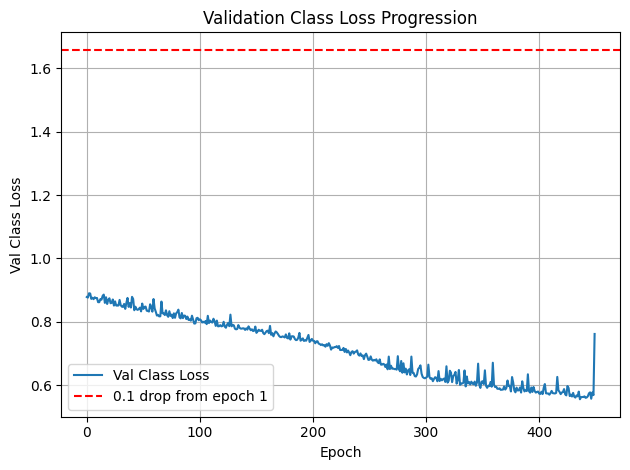

In [9]:
val_class_losses = np.array(val_class_losses)
plt.plot(val_class_losses[300:750], label='Val Class Loss')
plt.axhline(val_class_losses[0] - 0.1, linestyle='--', color='red', label='0.1 drop from epoch 1')
plt.xlabel('Epoch')
plt.ylabel('Val Class Loss')
plt.legend()
plt.title('Validation Class Loss Progression')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
v = val_class_losses[600:700]
diff = np.max(v) - np.min(v)
print(f"Max drop in validation class loss from epoch 600 to 700: {diff:.4f}")


Max drop in validation class loss from epoch 300 to 700: 0.0944


In [12]:
plt.plot(v)
plt.show()

: 

In [22]:
def simulate_early_stopping(val_class_losses, min_delta=0.01, patience=20):
    """
    Simulates early stopping based on validation class loss progression.

    Args:
        val_class_losses (list or np.ndarray): List of validation losses per epoch.
        min_delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        patience (int): Number of epochs to wait after last improvement before stopping.

    Returns:
        int: Epoch at which early stopping would have triggered (0-indexed).
    """
    best_loss = val_class_losses[0]
    wait = 0

    for epoch in range(1, len(val_class_losses)):
        current_loss = val_class_losses[epoch]

        if best_loss - current_loss > min_delta:
            best_loss = current_loss
            wait = 0  # reset patience counter
            print(f"Improvement at epoch {epoch}: New best loss = {best_loss:.4f}")
        else:
            wait += 1
            print(f"No improvement at epoch {epoch}: Current loss = {current_loss:.4f}, Best loss = {best_loss:.4f}, Wait = {wait}")

        if wait >= patience:
            print(f"Early stopping triggered at epoch {epoch} (0-indexed)")
            return epoch

    print("Early stopping was never triggered.")
    #return len(val_class_losses)


In [37]:
simulate_early_stopping(val_class_losses, min_delta=0.01, patience=70)

Improvement at epoch 1: New best loss = 1.7239
Improvement at epoch 2: New best loss = 1.7029
No improvement at epoch 3: Current loss = 1.7006, Best loss = 1.7029, Wait = 1
Improvement at epoch 4: New best loss = 1.6826
No improvement at epoch 5: Current loss = 1.6759, Best loss = 1.6826, Wait = 1
No improvement at epoch 6: Current loss = 1.6731, Best loss = 1.6826, Wait = 2
Improvement at epoch 7: New best loss = 1.6581
No improvement at epoch 8: Current loss = 1.6583, Best loss = 1.6581, Wait = 1
Improvement at epoch 9: New best loss = 1.6481
No improvement at epoch 10: Current loss = 1.6504, Best loss = 1.6481, Wait = 1
No improvement at epoch 11: Current loss = 1.6430, Best loss = 1.6481, Wait = 2
No improvement at epoch 12: Current loss = 1.6384, Best loss = 1.6481, Wait = 3
Improvement at epoch 13: New best loss = 1.6347
No improvement at epoch 14: Current loss = 1.6325, Best loss = 1.6347, Wait = 1
No improvement at epoch 15: Current loss = 1.6338, Best loss = 1.6347, Wait = 2
N

886

In [2]:
import pandas as pd
import os
os.chdir('/Users/walu/mdwarfs/ae_classifier/')
from save_recon_plots import save_recon_plots

In [4]:
df = pd.read_csv('model_beta_testing_binary_unbalanced/val_originals_and_reconstructions.csv')
originals = df[df['type'] == 'original']
originals.drop(columns=['type'], inplace=True)
reconstructions = df[df['type'] == 'reconstruction']
reconstructions.drop(columns=['type'], inplace=True)
save_recon_plots(originals, reconstructions, 'model_beta_testing_binary_unbalanced/')

/var/folders/3k/qhhyzp650rsb_v_vhzr1qzm80000gn/T/ipykernel_24877/848955706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originals.drop(columns=['type'], inplace=True)
/var/folders/3k/qhhyzp650rsb_v_vhzr1qzm80000gn/T/ipykernel_24877/848955706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructions.drop(columns=['type'], inplace=True)


Saved plot for sample 0 to model_beta_testing_binary_unbalanced/sample_0000.png
Saved plot for sample 1 to model_beta_testing_binary_unbalanced/sample_0001.png
Saved plot for sample 2 to model_beta_testing_binary_unbalanced/sample_0002.png
Saved plot for sample 3 to model_beta_testing_binary_unbalanced/sample_0003.png
Saved plot for sample 4 to model_beta_testing_binary_unbalanced/sample_0004.png
Saved plot for sample 5 to model_beta_testing_binary_unbalanced/sample_0005.png
Saved plot for sample 6 to model_beta_testing_binary_unbalanced/sample_0006.png
Saved plot for sample 7 to model_beta_testing_binary_unbalanced/sample_0007.png
Saved plot for sample 8 to model_beta_testing_binary_unbalanced/sample_0008.png
Saved plot for sample 9 to model_beta_testing_binary_unbalanced/sample_0009.png
Saved plot for sample 10 to model_beta_testing_binary_unbalanced/sample_0010.png
Saved plot for sample 11 to model_beta_testing_binary_unbalanced/sample_0011.png
Saved plot for sample 12 to model_beta